# Car Price Prediction  

**This project is a Car Price Prediction project intendted to give you the convenience for car price given the defined conditions**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ppscore as pps
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_regression, SelectKBest
import pandas as pd
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
import mlflow

In [2]:
DIR = "C:\\Users\\user\\Desktop\\DSAI_Coursework\\Machine_Learning\\Car-_Prediction_Project\\"

Load the dataset

In [3]:
df = pd.read_csv(DIR + 'Cars - Cars.csv')

Let's take a look the data information

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


Let's check its header

In [5]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


Since the torque column is quite complicated to understand, we will drop it

In [6]:
df = df.drop(columns="torque")
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,5.0
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.3 kmpl,1248 CC,73.9 bhp,5.0
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,5.0


As of now, we will remove the strings from the mileage, engine, and max_power so that we can analyze the three columns further by using regular expression

In [7]:
df["mileage"] = df["mileage"].str.extract(r'(\d+(\.\d+)?)')[0]
df["engine"] = df["engine"].str.extract(r'(\d+(\.\d+)?)')[0]
df["max_power"] = df["max_power"].str.extract(r'(\d+(\.\d+)?)')[0]

df["engine"] = df["engine"].astype(float)
df["max_power"] = df["max_power"].astype(float)
df["mileage"] = df["mileage"].astype(float)

Lets's check the data information and its header again

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   float64
 9   engine         7907 non-null   float64
 10  max_power      7912 non-null   float64
 11  seats          7907 non-null   float64
dtypes: float64(4), int64(3), object(5)
memory usage: 762.1+ KB


In [9]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5.0


As you can see, the strings attached in the three columns have gone

Next, we will exclude the strings representing the details for each of the car's brand, since it' redundant

In [10]:
df['name'] = df['name'].str.split().str.get(0)

Then, check its head

In [11]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0
1,Skoda,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0
2,Honda,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,5.0
3,Hyundai,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0
4,Maruti,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5.0


# ****Exploratory Data Analysis****

Exploratory Data Analysis is an approach to analyzing datasets to summarize their main characteristics, often with visual methods. It is crucial in the data preparation phase before applying more formal modeling or hypothesis testing. It helps researchers and data analysts understand the data at hand, its underlying structure, and the relationships between variables.

**Univariate Analysis**

Univariate analysis is a form of data analysis where we examine a single variable or feature without reference to any other. Its primary goal is to describe patterns and characteristics 

In this analysis, we will begin with the analysis of categorical variables by using countplot 

1. Countplot

First of all, let's explore the categories of each feature

In [12]:
categorical_features = ['name', 'fuel', 'seller_type','transmission','owner']

for feature in categorical_features:
    print(f" The {feature} feature contains {df[feature].unique()} unique features \n\n\n")

 The name feature contains ['Maruti' 'Skoda' 'Honda' 'Hyundai' 'Toyota' 'Ford' 'Renault' 'Mahindra'
 'Tata' 'Chevrolet' 'Fiat' 'Datsun' 'Jeep' 'Mercedes-Benz' 'Mitsubishi'
 'Audi' 'Volkswagen' 'BMW' 'Nissan' 'Lexus' 'Jaguar' 'Land' 'MG' 'Volvo'
 'Daewoo' 'Kia' 'Force' 'Ambassador' 'Ashok' 'Isuzu' 'Opel' 'Peugeot'] unique features 



 The fuel feature contains ['Diesel' 'Petrol' 'LPG' 'CNG'] unique features 



 The seller_type feature contains ['Individual' 'Dealer' 'Trustmark Dealer'] unique features 



 The transmission feature contains ['Manual' 'Automatic'] unique features 



 The owner feature contains ['First Owner' 'Second Owner' 'Third Owner' 'Fourth & Above Owner'
 'Test Drive Car'] unique features 





Next, Plotting the distribution of each one

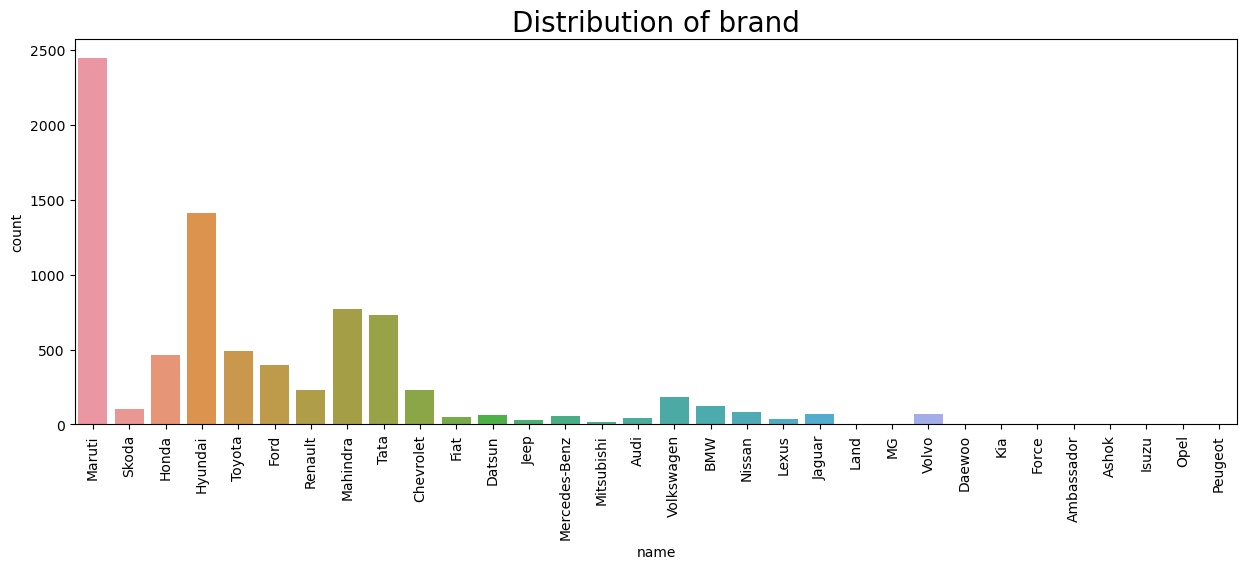

In [13]:
# The distribution of brand

plt.figure(figsize=(15, 5))
sns.countplot(data=df, x='name')
plt.title(f'Distribution of brand', fontsize=20)
plt.xticks(rotation=90) 
plt.show()

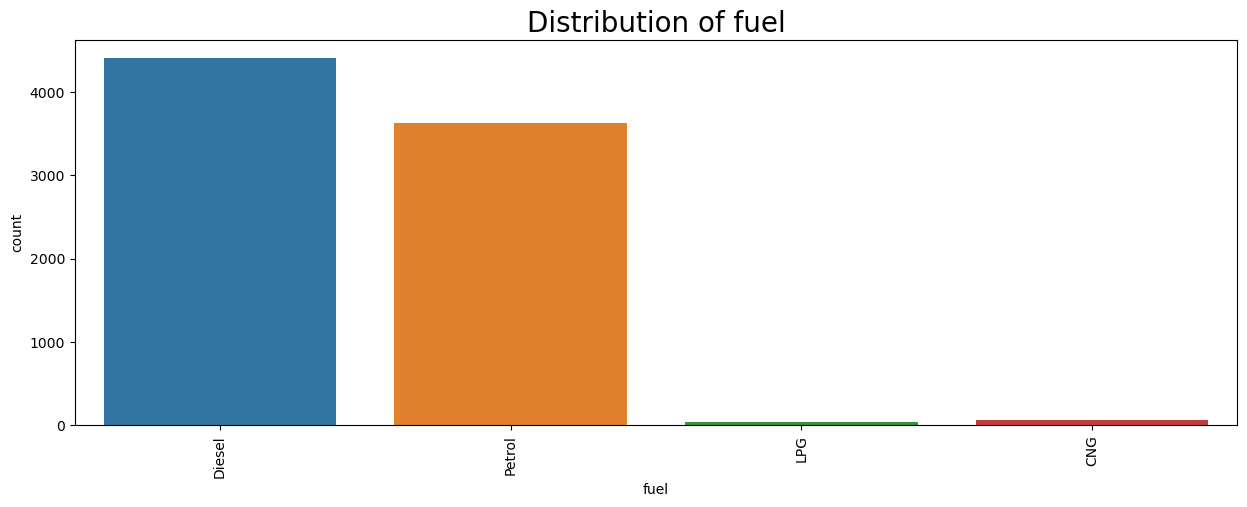

In [14]:
# The distribution of fuel

plt.figure(figsize=(15, 5))
sns.countplot(data=df, x='fuel')
plt.title(f'Distribution of fuel', fontsize=20)
plt.xticks(rotation=90)  
plt.show()

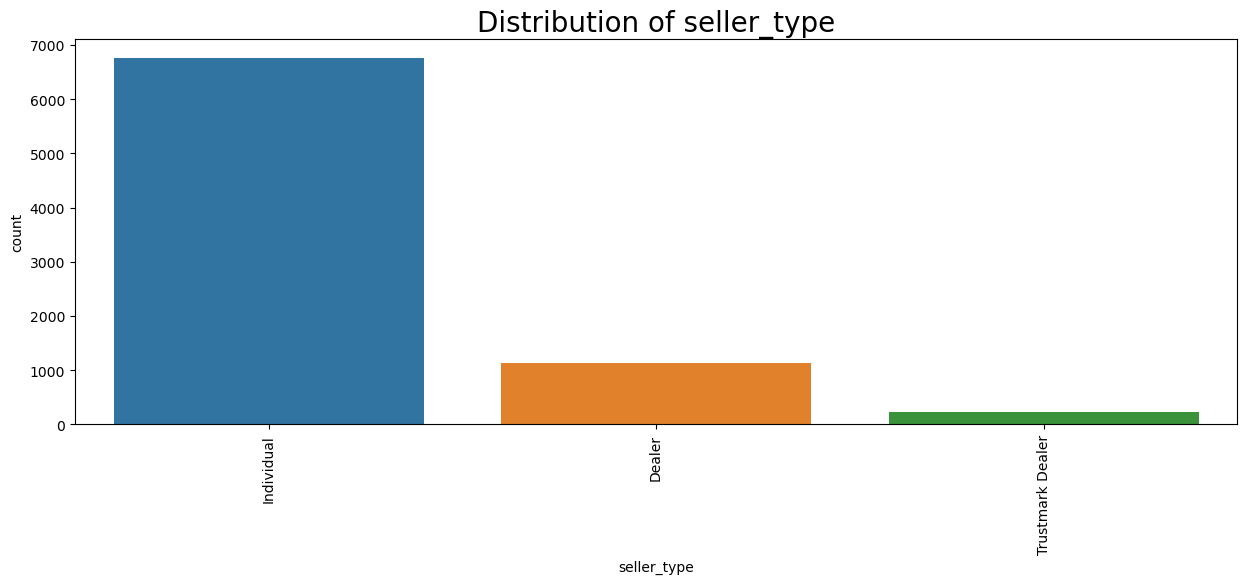

In [15]:
# The distribution of seller_type

plt.figure(figsize=(15, 5))
sns.countplot(data=df, x='seller_type')
plt.title(f'Distribution of seller_type', fontsize=20)
plt.xticks(rotation=90)  
plt.show()

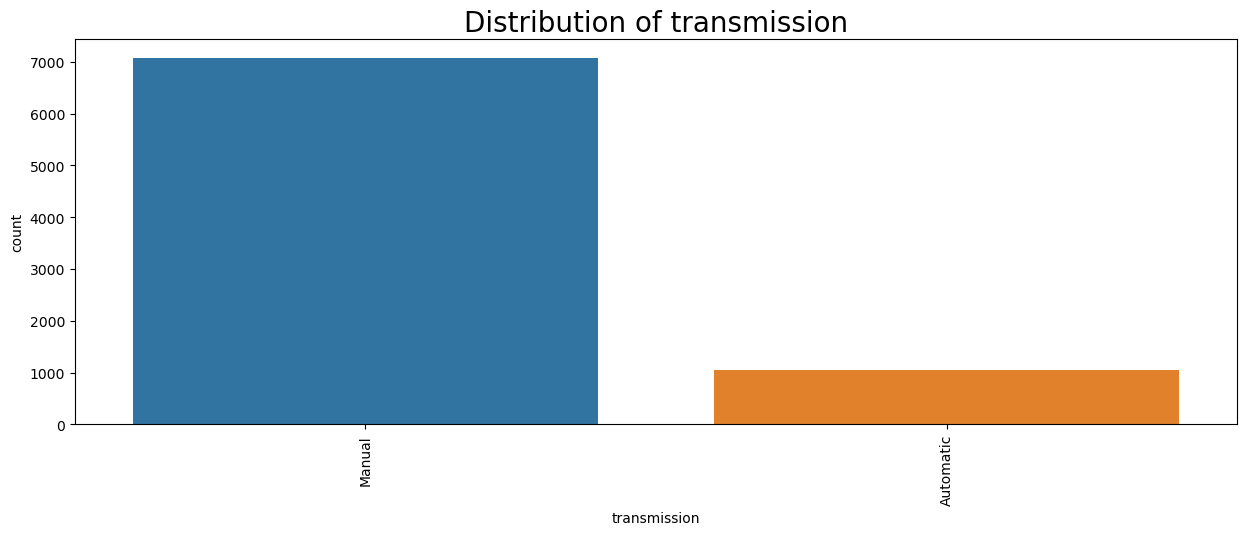

In [16]:
# The distribution of transmission

plt.figure(figsize=(15, 5))
sns.countplot(data=df, x='transmission')
plt.title(f'Distribution of transmission', fontsize=20)
plt.xticks(rotation=90)  
plt.show()

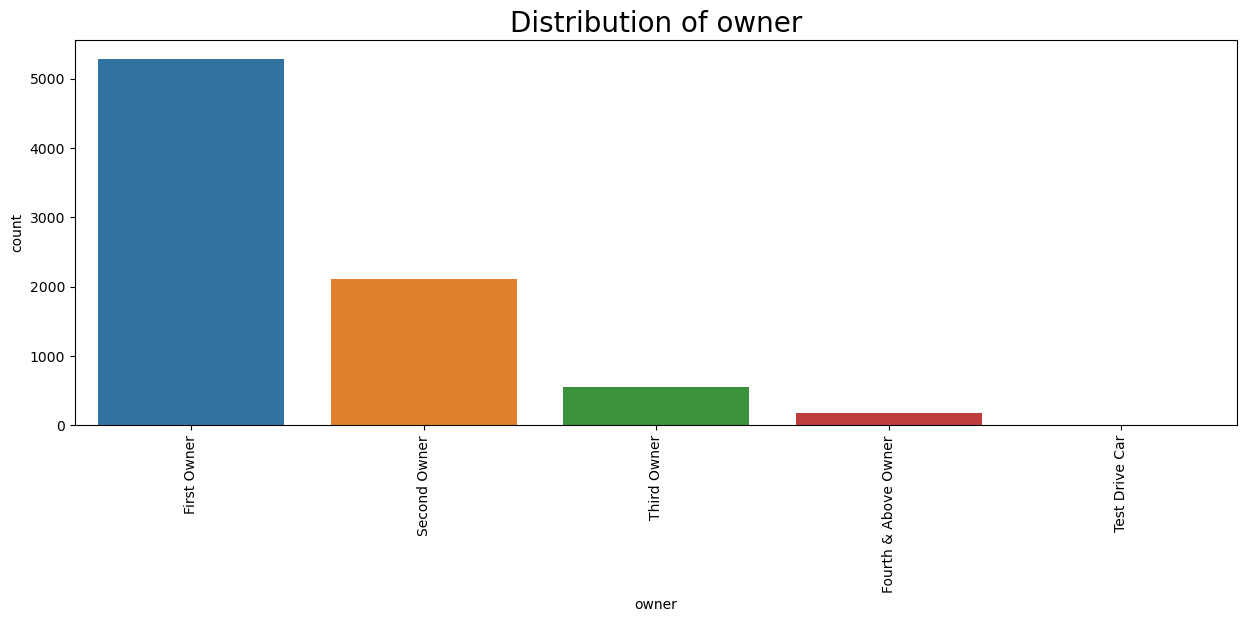

In [17]:
# The distribution of owner

plt.figure(figsize=(15, 5))
sns.countplot(data=df, x='owner')
plt.title(f'Distribution of owner', fontsize=20)
plt.xticks(rotation=90)  
plt.show()

Next, we are going to plot the continuous variables

2. Distributionplot

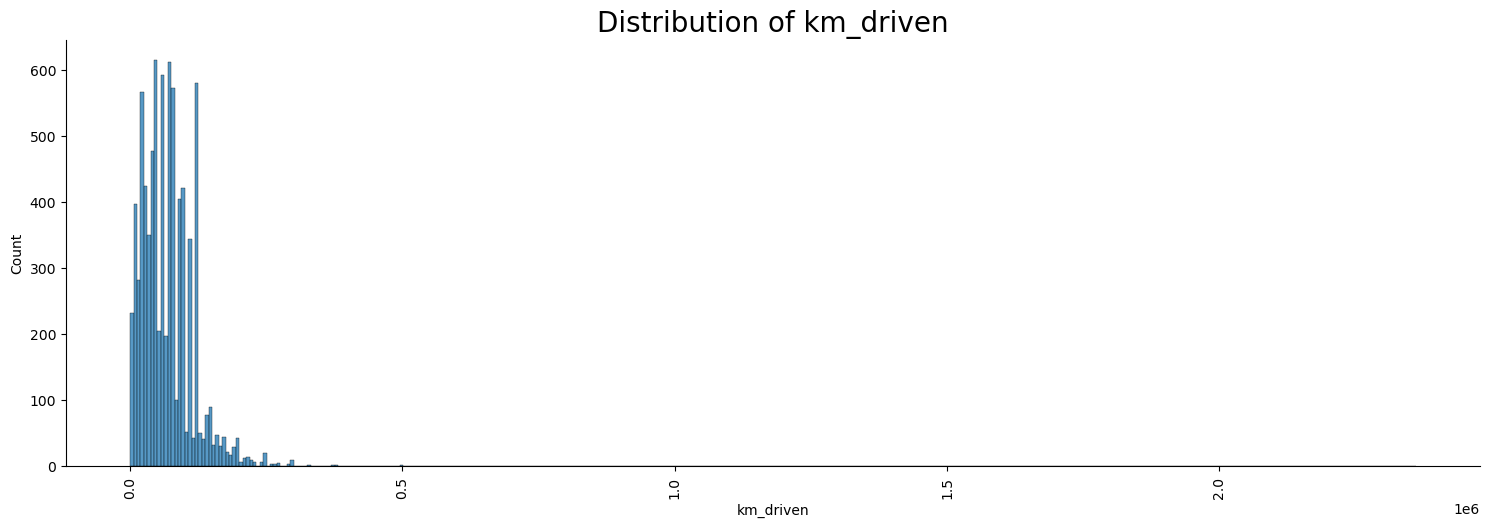

In [18]:
# The distribution of km_driven

sns.displot(data=df, x='km_driven', height=5, aspect=3)  # 15/5 = 3
plt.title(f'Distribution of km_driven', fontsize=20)
plt.xticks(rotation=90)
plt.show()

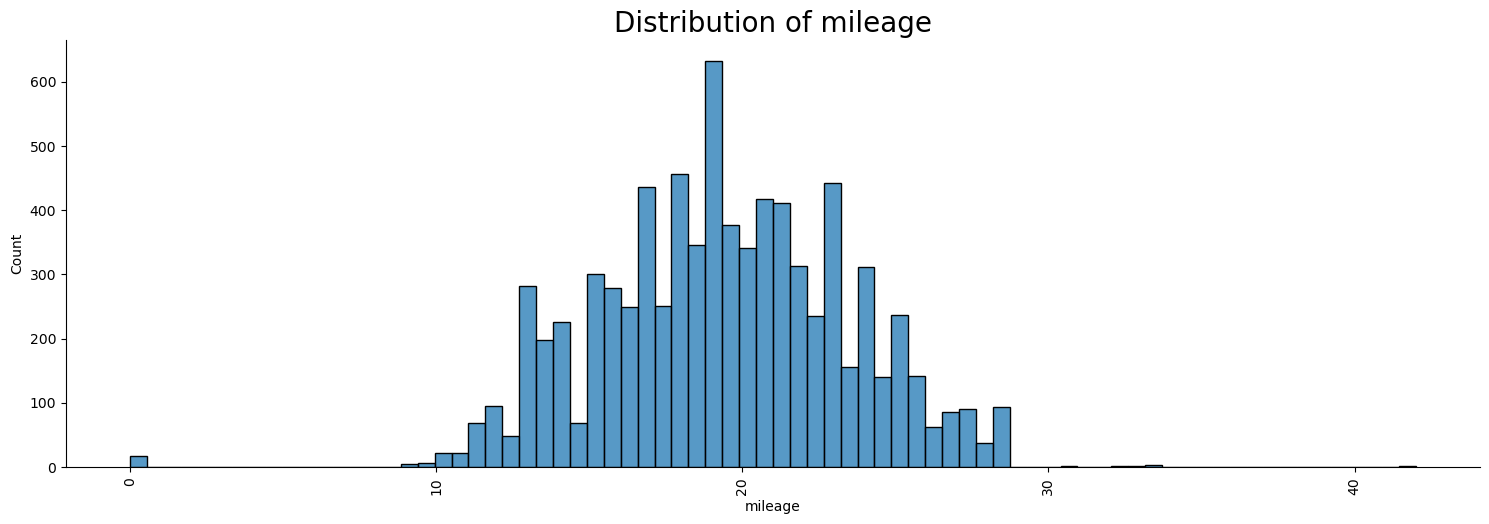

In [19]:
# The distribution of mileage

sns.displot(data=df, x='mileage', height=5, aspect=3)  # 15/5 = 3
plt.title(f'Distribution of mileage', fontsize=20)
plt.xticks(rotation=90)
plt.show()

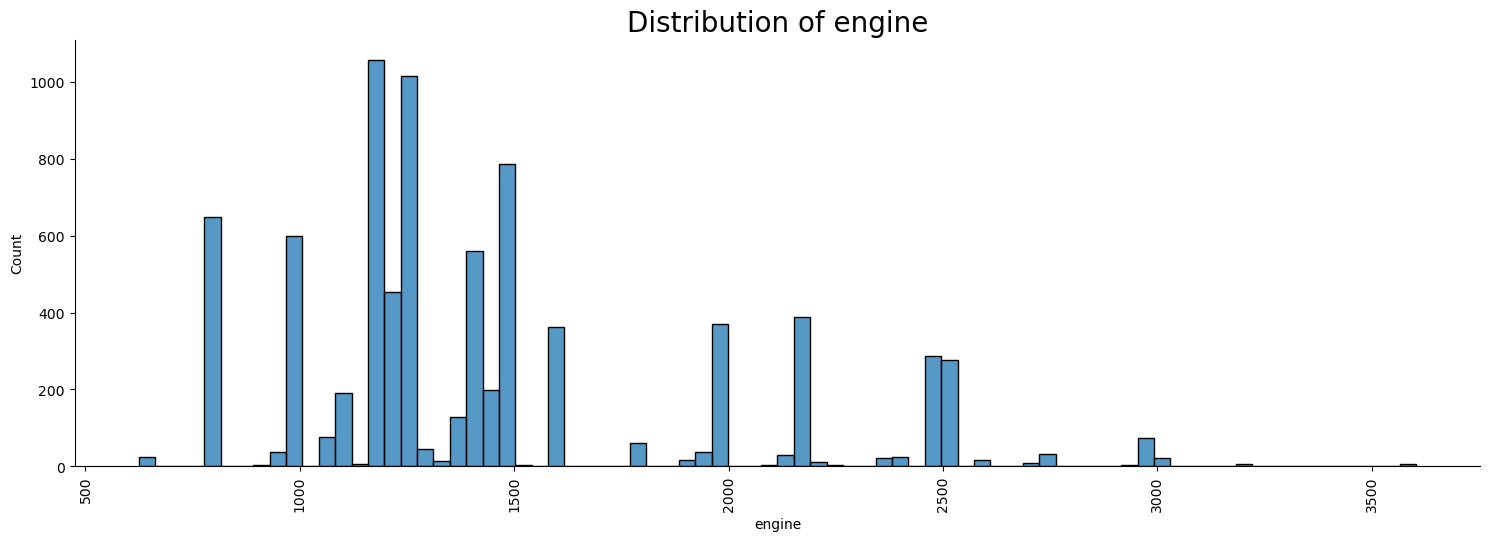

In [20]:
# The distribution of engine

sns.displot(data=df, x='engine', height=5, aspect=3)  # 15/5 = 3
plt.title(f'Distribution of engine', fontsize=20)
plt.xticks(rotation=90)
plt.show()

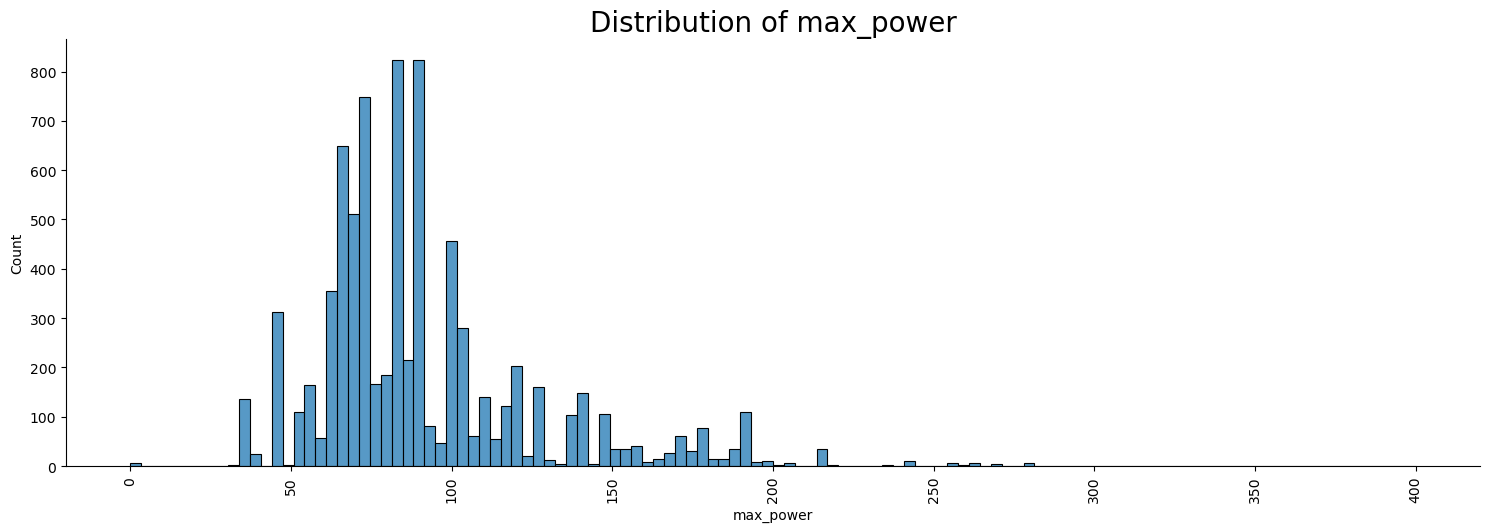

In [21]:
# The distribution of max_power

sns.displot(data=df, x='max_power', height=5, aspect=3)  # 15/5 = 3
plt.title(f'Distribution of max_power', fontsize=20)
plt.xticks(rotation=90)
plt.show()

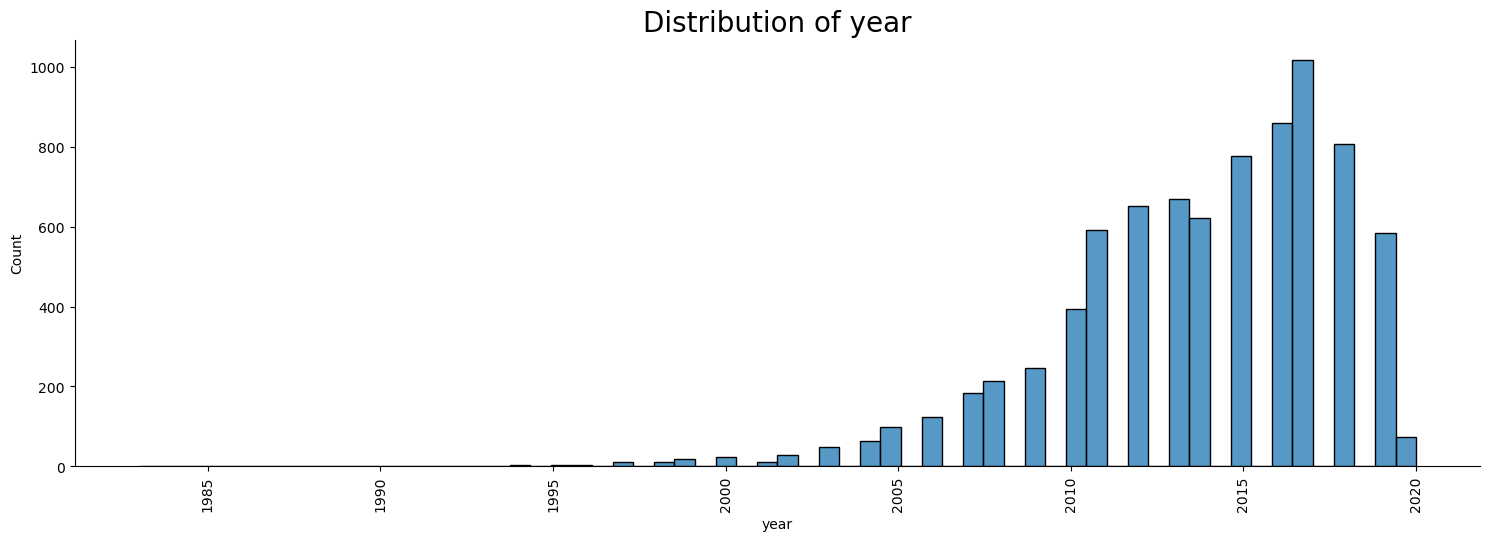

In [22]:
# The distribution of year

sns.displot(data=df, x='year', height=5, aspect=3)  # 15/5 = 3
plt.title(f'Distribution of year', fontsize=20)
plt.xticks(rotation=90)
plt.show()

**Multivariate Analysis**

Multivariate analysis refers to any statistical technique used to analyze data that arises from more than one variable. This can encompass a broad range of techniques, as the analysis is applied to datasets where multiple measurements are made on each observation.

In this analysis,we will explore the relationships between selling_price and the features in order to see if there are correlations or patterns among them 

1. Boxplot

Boxplot is a standardized way of displaying the distribution of data based on a five-number summary: the minimum, first quartile (Q1), median, third quartile (Q3), and the maximum. It's a way to visualize the central tendency, variability, and skewness of a data distribution.

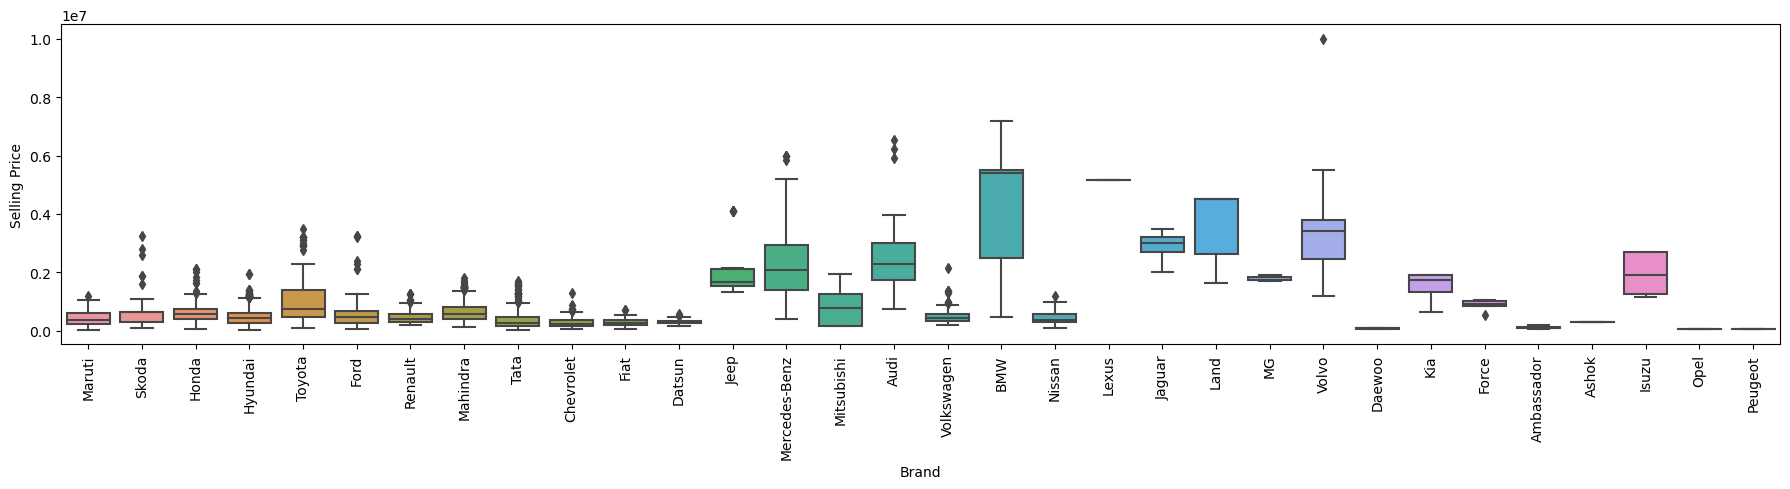

In [23]:
# Let's try bar plot on "brand"

# Set the figure size
plt.figure(figsize=(18, 5))  # Width=12in, Height=8in

sns.boxplot(x=df["name"], y=df["selling_price"])

plt.ylabel("Selling Price")
plt.xlabel("Brand")
plt.xticks(rotation=90)  # Optional: Rotate x-axis labels for better visibility
plt.tight_layout()  # Adjust layout for better visualization
plt.show()

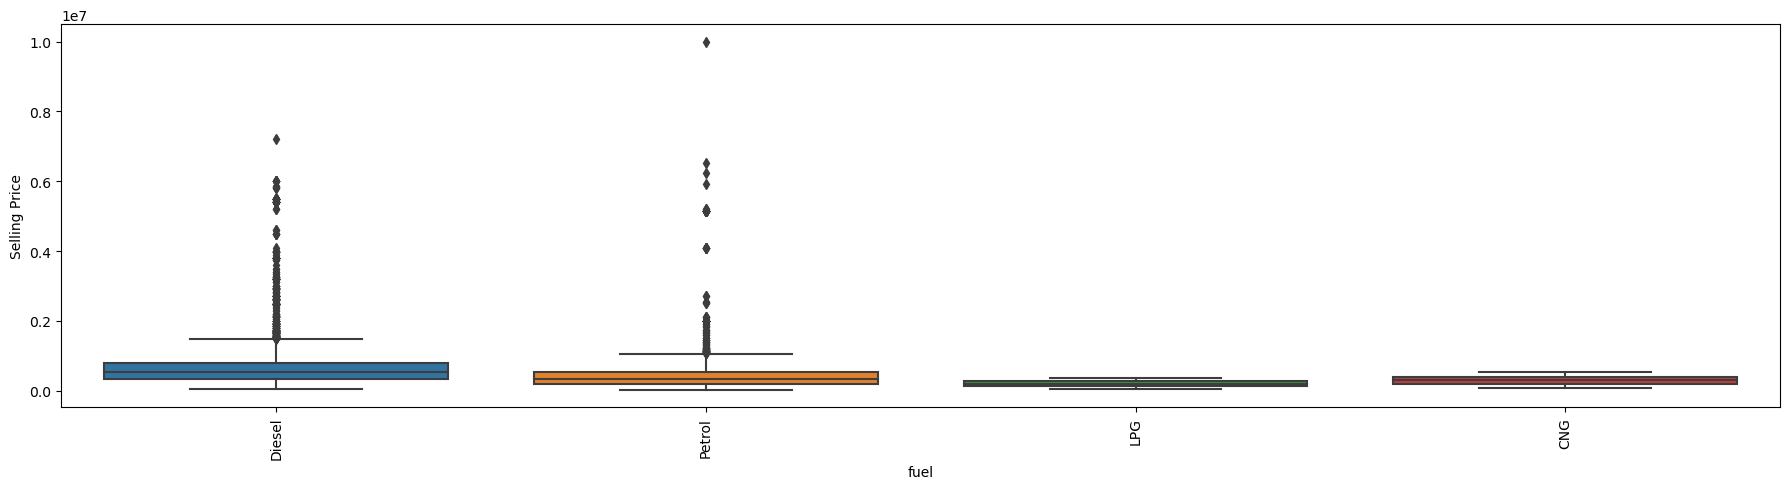

In [24]:
# Let's try bar plot on "fuel"

# Set the figure size
plt.figure(figsize=(18, 5))  # Width=12in, Height=8in

sns.boxplot(x=df["fuel"], y=df["selling_price"])

plt.ylabel("Selling Price")
plt.xlabel("fuel")
plt.xticks(rotation=90)  # Optional: Rotate x-axis labels for better visibility
plt.tight_layout()  # Adjust layout for better visualization
plt.show()

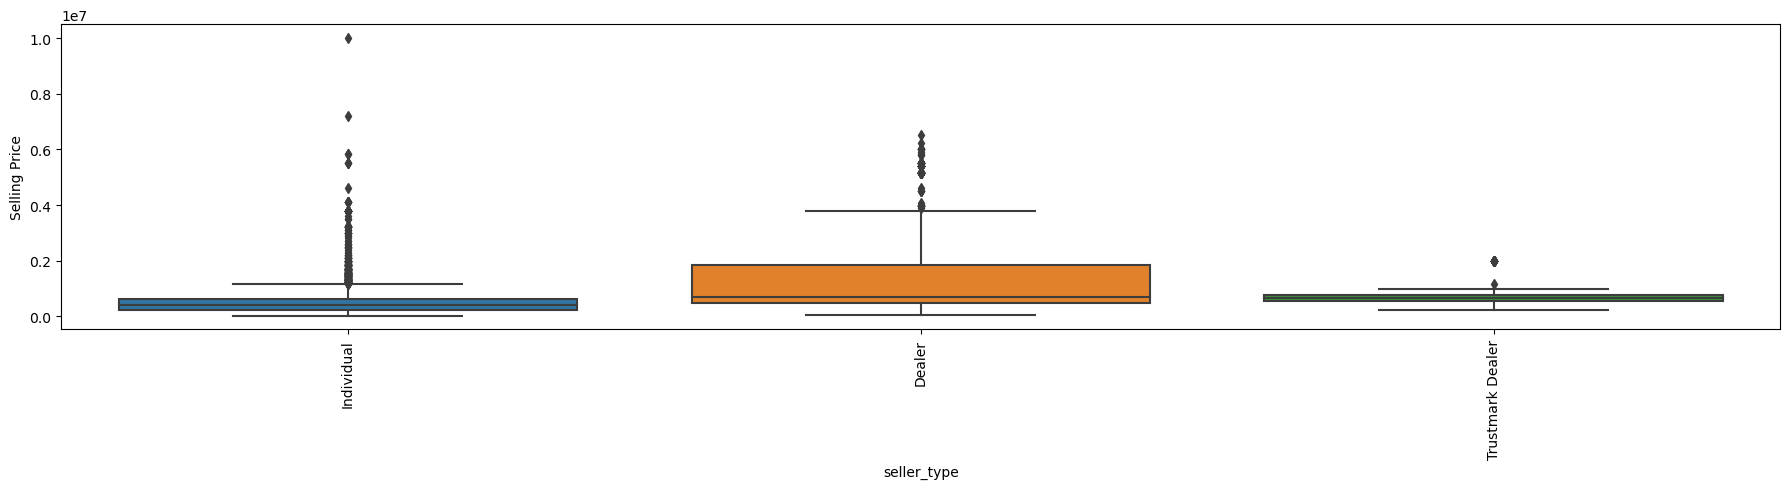

In [25]:
# Let's try bar plot on "seller_type"

# Set the figure size
plt.figure(figsize=(18, 5))  # Width=12in, Height=8in

sns.boxplot(x=df["seller_type"], y=df["selling_price"])

plt.ylabel("Selling Price")
plt.xlabel("seller_type")
plt.xticks(rotation=90)  # Optional: Rotate x-axis labels for better visibility
plt.tight_layout()  # Adjust layout for better visualization
plt.show()

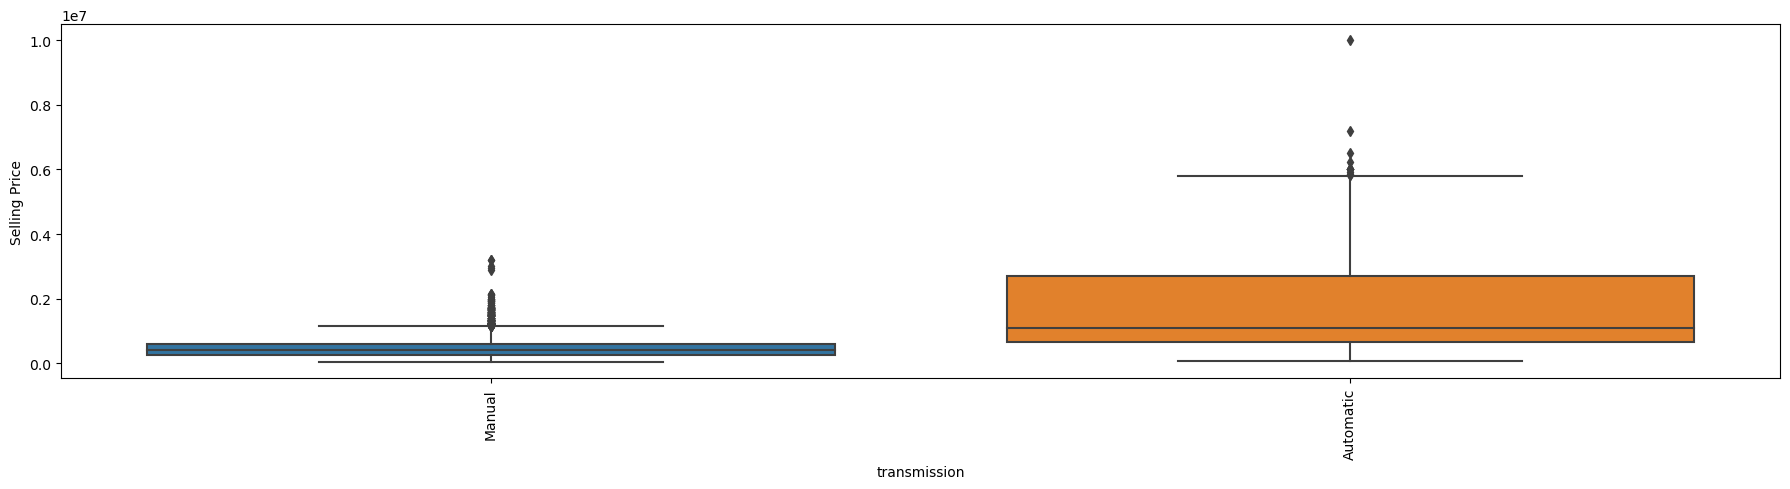

In [26]:
# Let's try bar plot on "transmisson"

# Set the figure size
plt.figure(figsize=(18, 5))  # Width=12in, Height=8in

sns.boxplot(x=df["transmission"], y=df["selling_price"])

plt.ylabel("Selling Price")
plt.xlabel("transmission")
plt.xticks(rotation=90)  # Optional: Rotate x-axis labels for better visibility
plt.tight_layout()  # Adjust layout for better visualization
plt.show()

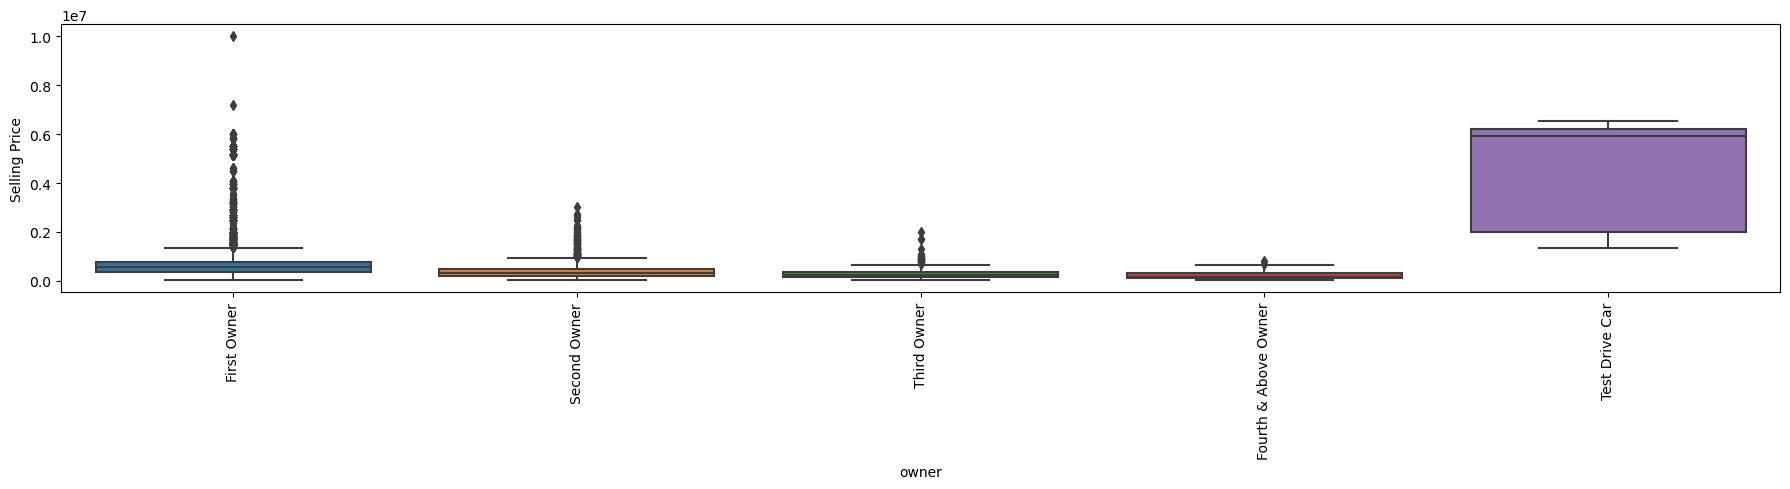

In [27]:
# Let's try bar plot on "owner"

# Set the figure size
plt.figure(figsize=(18, 5))  # Width=12in, Height=8in

sns.boxplot(x=df["owner"], y=df["selling_price"])

plt.ylabel("Selling Price")
plt.xlabel("owner")
plt.xticks(rotation=90)  # Optional: Rotate x-axis labels for better visibility
plt.tight_layout()  # Adjust layout for better visualization
plt.show()

2. Scatter Plot

A scatter plot (or scatterplot) is a graphical representation that uses dots to display values for two variables for a set of data. The position of each dot on the horizontal and vertical axis indicates values for an individual data point. Scatter plots are used to observe and display relationships between two numeric variables.

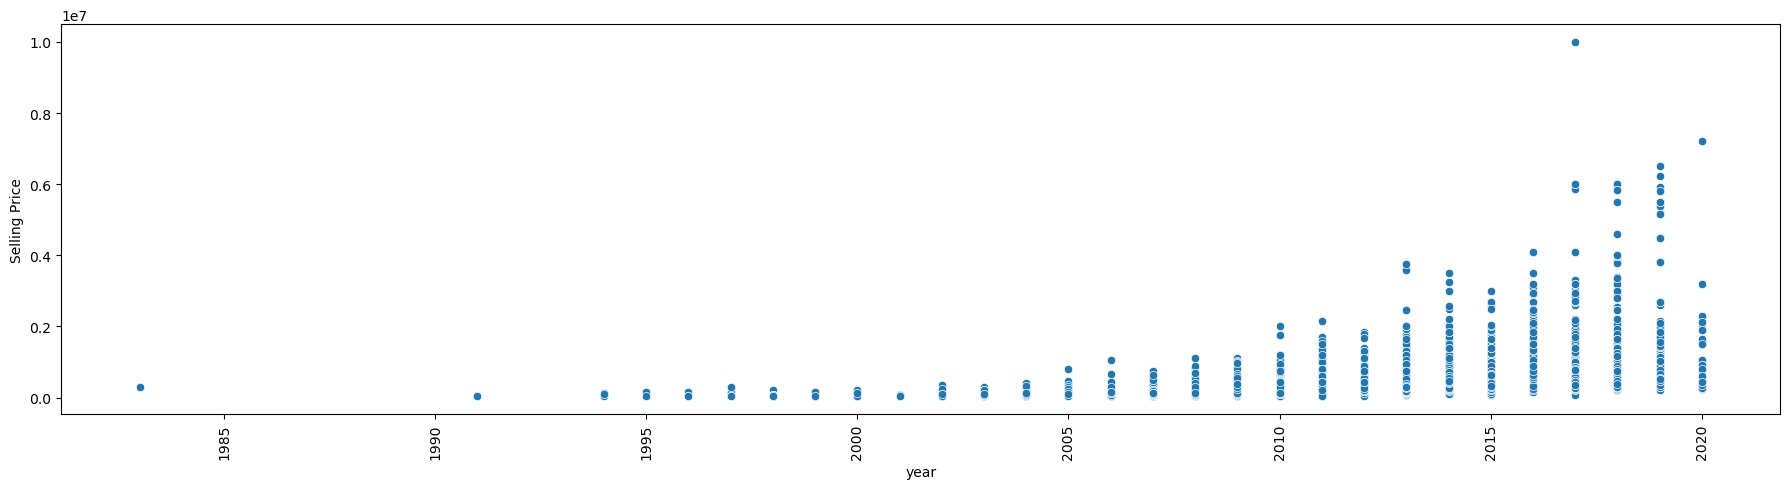

In [28]:
# Let's try bar plot on "year"

# Set the figure size
plt.figure(figsize=(18, 5))  # Width=12in, Height=8in

sns.scatterplot(x=df["year"], y=df["selling_price"])

plt.ylabel("Selling Price")
plt.xlabel("year")
plt.xticks(rotation=90)  # Optional: Rotate x-axis labels for better visibility
plt.tight_layout()  # Adjust layout for better visualization
plt.show()

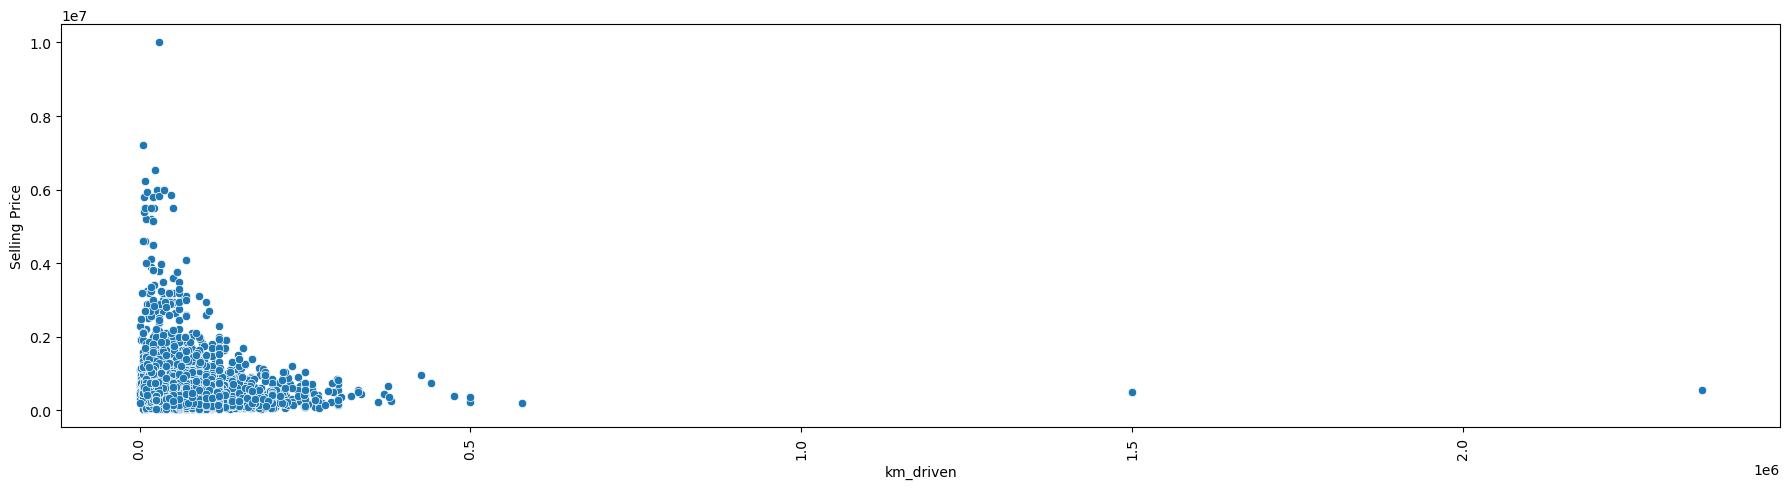

In [29]:
# Let's try bar plot on "km_driven"

# Set the figure size
plt.figure(figsize=(18, 5))  # Width=12in, Height=8in

sns.scatterplot(x=df["km_driven"], y=df["selling_price"])

plt.ylabel("Selling Price")
plt.xlabel("km_driven")
plt.xticks(rotation=90)  # Optional: Rotate x-axis labels for better visibility
plt.tight_layout()  # Adjust layout for better visualization
plt.show()

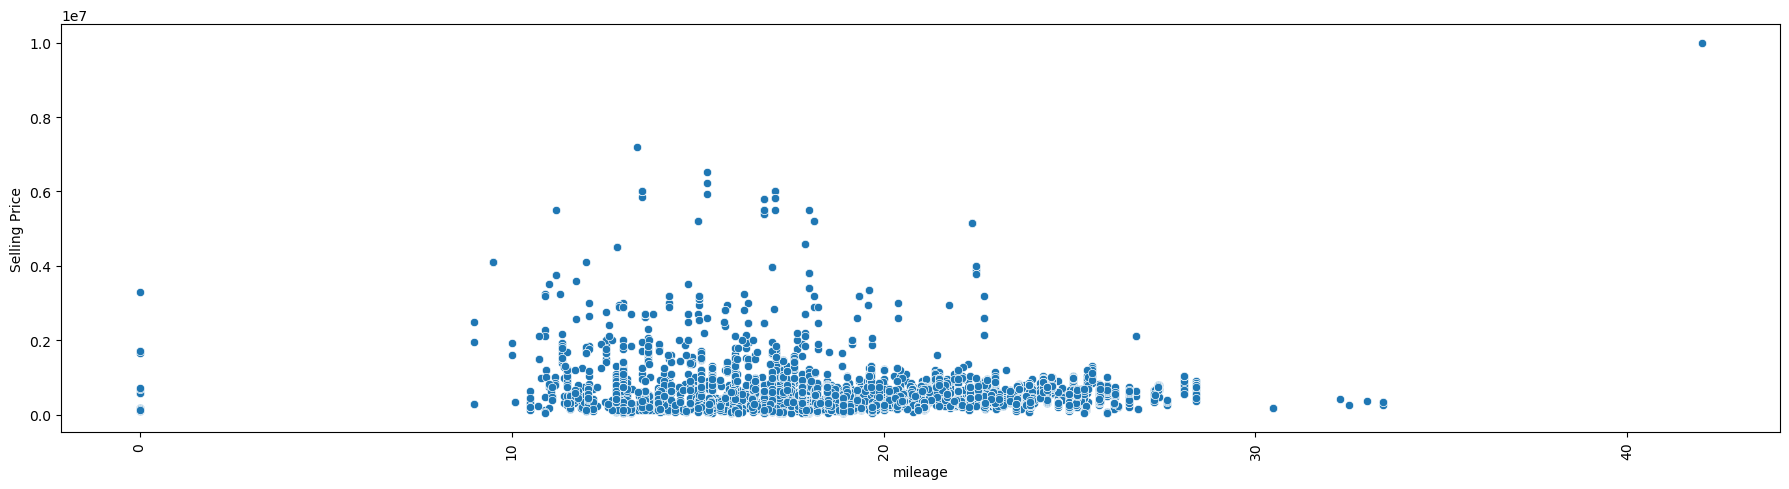

In [30]:
# Let's try bar plot on "mileage"

# Set the figure size
plt.figure(figsize=(18, 5))  # Width=12in, Height=8in

sns.scatterplot(x=df["mileage"], y=df["selling_price"])

plt.ylabel("Selling Price")
plt.xlabel("mileage")
plt.xticks(rotation=90)  # Optional: Rotate x-axis labels for better visibility
plt.tight_layout()  # Adjust layout for better visualization
plt.show()

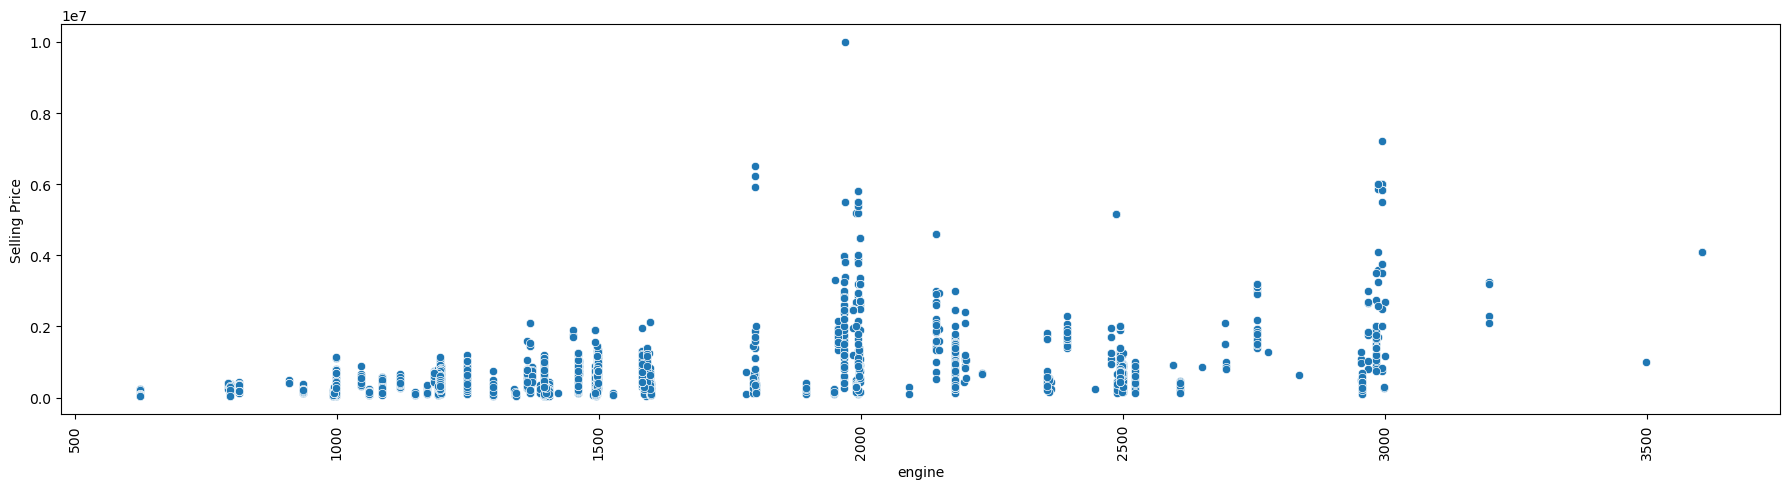

In [31]:
# Let's try bar plot on "mileage"

# Set the figure size
plt.figure(figsize=(18, 5))  # Width=12in, Height=8in

sns.scatterplot(x=df["engine"], y=df["selling_price"])

plt.ylabel("Selling Price")
plt.xlabel("engine")
plt.xticks(rotation=90)  # Optional: Rotate x-axis labels for better visibility
plt.tight_layout()  # Adjust layout for better visualization
plt.show()

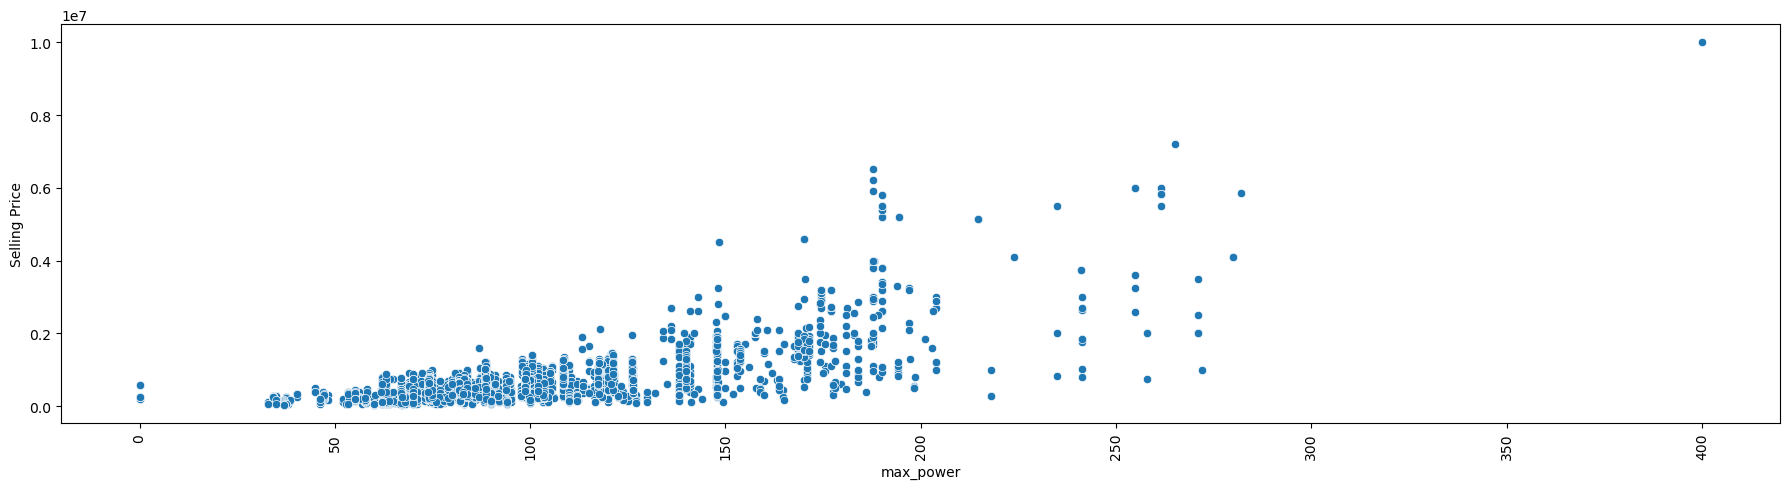

In [32]:
# Let's try bar plot on "max_power"

# Set the figure size
plt.figure(figsize=(18, 5))  # Width=12in, Height=8in

sns.scatterplot(x=df["max_power"], y=df["selling_price"])

plt.ylabel("Selling Price")
plt.xlabel("max_power")
plt.xticks(rotation=90)  # Optional: Rotate x-axis labels for better visibility
plt.tight_layout()  # Adjust layout for better visualization
plt.show()

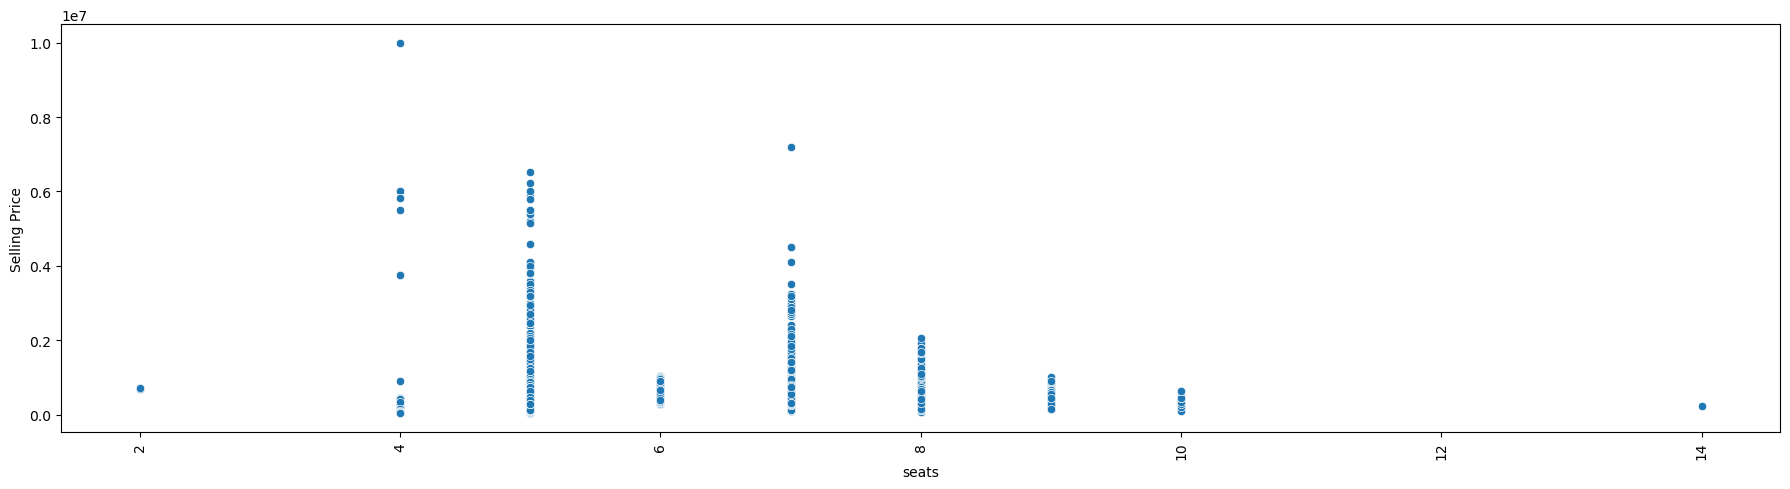

In [33]:
# Let's try bar plot on "max_power"

# Set the figure size
plt.figure(figsize=(18, 5))  # Width=12in, Height=8in

sns.scatterplot(x=df["seats"], y=df["selling_price"])

plt.ylabel("Selling Price")
plt.xlabel("seats")
plt.xticks(rotation=90)  # Optional: Rotate x-axis labels for better visibility
plt.tight_layout()  # Adjust layout for better visualization
plt.show()

**Other interesting analysis**

1. The relationships between fueltype and mileage

In this analysis, we will be plotting to explore the relationships between fuel type and mileage, since it's essential to see how much mileage each fuel type consume

         count       mean       std   min    25%   50%    75%    max
fuel                                                                
CNG       53.0  24.165660  5.422322  10.9  21.94  26.2  26.60  33.44
Diesel  4299.0  19.642624  4.624294   0.0  15.96  20.0  23.20  28.40
LPG       35.0  18.577143  5.153202  10.9  13.45  17.3  23.65  26.20
Petrol  3520.0  19.082301  3.047539   0.0  17.30  18.9  20.92  42.00


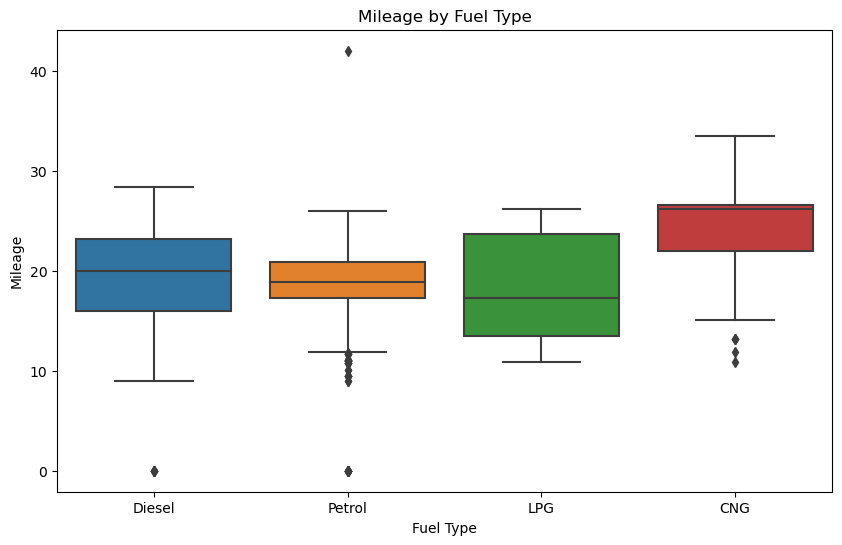

In [34]:
# Plotting to explore the relationship between fuel type and mileage

# Grouping data by fuel type and calculating mean mileage
grouped_data = df.groupby('fuel')['mileage'].describe()
print(grouped_data)

# Boxplot for mileage based on fuel type
plt.figure(figsize=(10, 6))
sns.boxplot(x='fuel', y='mileage', data=df)
plt.title('Mileage by Fuel Type')
plt.ylabel('Mileage')
plt.xlabel('Fuel Type')
plt.show()

According to the data, there are 6 points where we can make an insight analysis

1. Fuel Types and Data Size
   . There are 4 fuel types: CNG, Diesel, LPG, and Petrol.
   . The data size (count) for Diesel and Petrol is considerably larger than for CNG and LPG. Hence, statistics for Diesel      and Petrol might be more reliable due to the larger sample size.
   
2. Central Tendency (Mean and Median)
   . CNG vehicles seem to have the highest average and median fuel efficiency, while LPG vehicles have the lowest.
   
3. Variability (Standard Deviation)
   . Petrol vehicles' fuel efficiency is more consistent compared to other fuel types, whereas CNG and LPG vehicles show        higher variability.
   
4. Spread (IQR)
   . LPG vehicles show the highest spread in fuel efficiency for the middle 50% of data, while Petrol vehicles have the          least.
   
5. Outliers and Range
   . The minimum efficiency for both Diesel and Petrol is 0.0, which could be an error or represent non-running vehicles.
   . The maximum efficiency for Petrol vehicles is notably high at 42.0, much higher than its 75th percentile value,            suggesting potential outliers or high-performance vehicles.
   
6. Insight and Further Investigation
   . CNG vehicles, on average, might be more fuel-efficient, but they also have a wider variability.
   . Diesel and Petrol are the most common fuels, with Diesel vehicles showing slightly better average efficiency than          Petrol.
   . The minimum values, especially for Diesel and Petrol, warrant further investigation.
   . The notably high maximum for Petrol could be investigated to determine if it's an outlier or if there are specific          models with high fuel efficiency.

2. The influences of fuel type on the saleprice

         count           mean            std      min       25%       50%  \
fuel                                                                        
CNG       57.0  301017.491228  111582.298949  80000.0  200000.0  320000.0   
Diesel  4402.0  791452.921627  908894.768774  40000.0  350000.0  550000.0   
LPG       38.0  200421.052632   84921.468199  54000.0  148250.0  195500.0   
Petrol  3631.0  462441.061691  624788.835690  29999.0  200000.0  345000.0   

             75%         max  
fuel                          
CNG     390000.0    545000.0  
Diesel  800000.0   7200000.0  
LPG     275000.0    375000.0  
Petrol  550000.0  10000000.0  


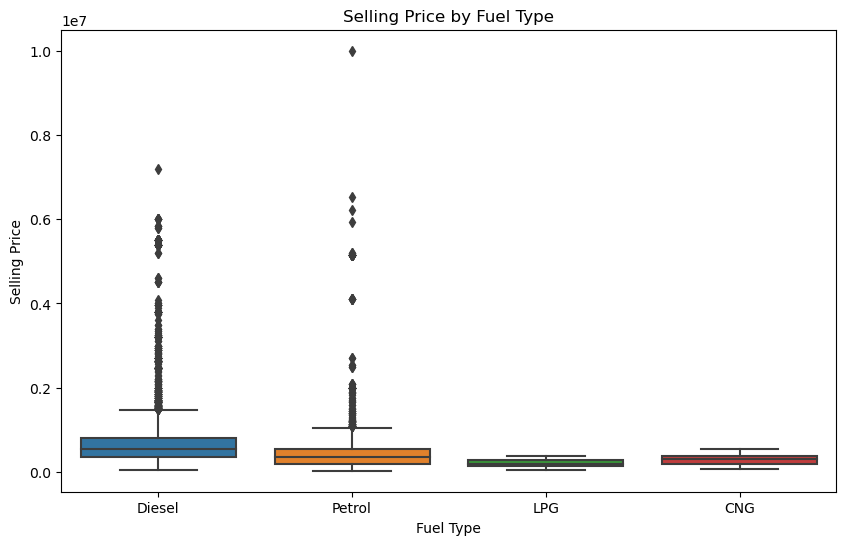

In [35]:
# This is to explore how fuel type influences the resale price

# Grouping data by fuel type and calculating mean selling price
grouped_fuel_data = df.groupby('fuel')['selling_price'].describe()
print(grouped_fuel_data)


# Boxplot for selling price based on fuel type
plt.figure(figsize=(10, 6))
sns.boxplot(x='fuel', y='selling_price', data=df)
plt.title('Selling Price by Fuel Type')
plt.ylabel('Selling Price')
plt.xlabel('Fuel Type')
plt.show()

According to the data, we can summarize as below:

1. Further Analysis:

   . Why are Diesel vehicles, on average and median, more expensive than the others ?
   
   . Are the-end Diesel and Petro vehicles luxury brands or special models, since the selling price are relatively higher        than the other two
   
   . How does the age ot model year of the vehicle influence its price
   
2. Recommendations:

   . If someone is looking for budget-friendly options, LPG vehicles might be a good choice
   
   . For a typical range of prices without extreme highs or lows, CNG could be a viable options

3. The relationships between the brand km_driven

                count           mean           std       min       25%  \
name                                                                     
Ambassador        4.0   82500.000000  17078.251277   60000.0   75000.0   
Ashok             1.0  200000.000000           NaN  200000.0  200000.0   
Audi             40.0   53896.550000  42624.488641    7800.0   29000.0   
BMW             120.0   30269.458333  35151.876004    5000.0    7500.0   
Chevrolet       230.0   79785.373913  40433.918046   13500.0   55250.0   
Daewoo            3.0   81317.000000  48662.269439   46951.0   53475.5   
Datsun           65.0   36342.861538  26311.951296    1300.0   19000.0   
Fiat             47.0   84630.893617  43355.022098   20000.0   55000.0   
Force             6.0   55546.500000  61182.713028   13000.0   14750.0   
Ford            397.0   72902.780856  44707.465871    2600.0   39000.0   
Honda           467.0   60008.402570  39973.032542    1000.0   30000.0   
Hyundai        1415.0   64823.558304  

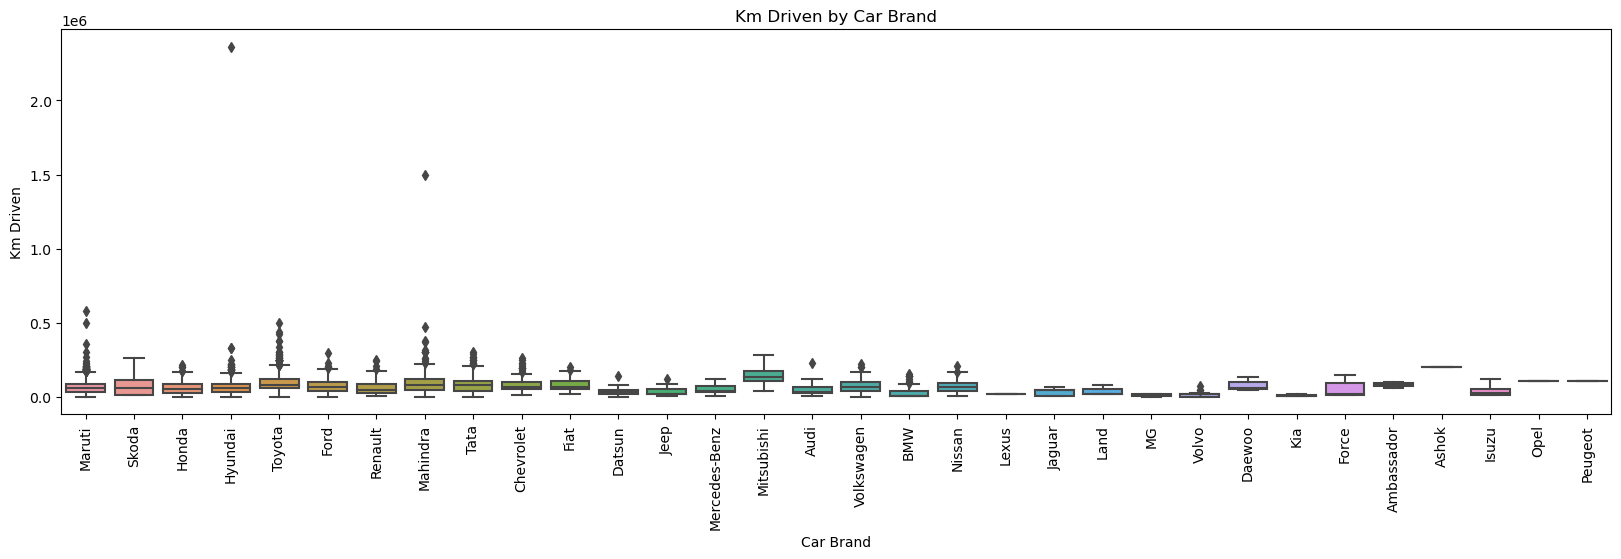

In [36]:
# This is to delve into the relationship between the brand or car type and how much it's typically driven

# Grouping data by car brand and calculating mean km driven
grouped_brand_data = df.groupby('name')['km_driven'].describe()
print(grouped_brand_data)

import matplotlib.pyplot as plt
import seaborn as sns

# Boxplot for km driven based on car brand
plt.figure(figsize=(20, 5))
sns.boxplot(x='name', y='km_driven', data=df)
plt.title('Km Driven by Car Brand')
plt.ylabel('Km Driven')
plt.xlabel('Car Brand')
plt.xticks(rotation=90)
plt.show()

4. The distrinbution of car brands based on number of seats

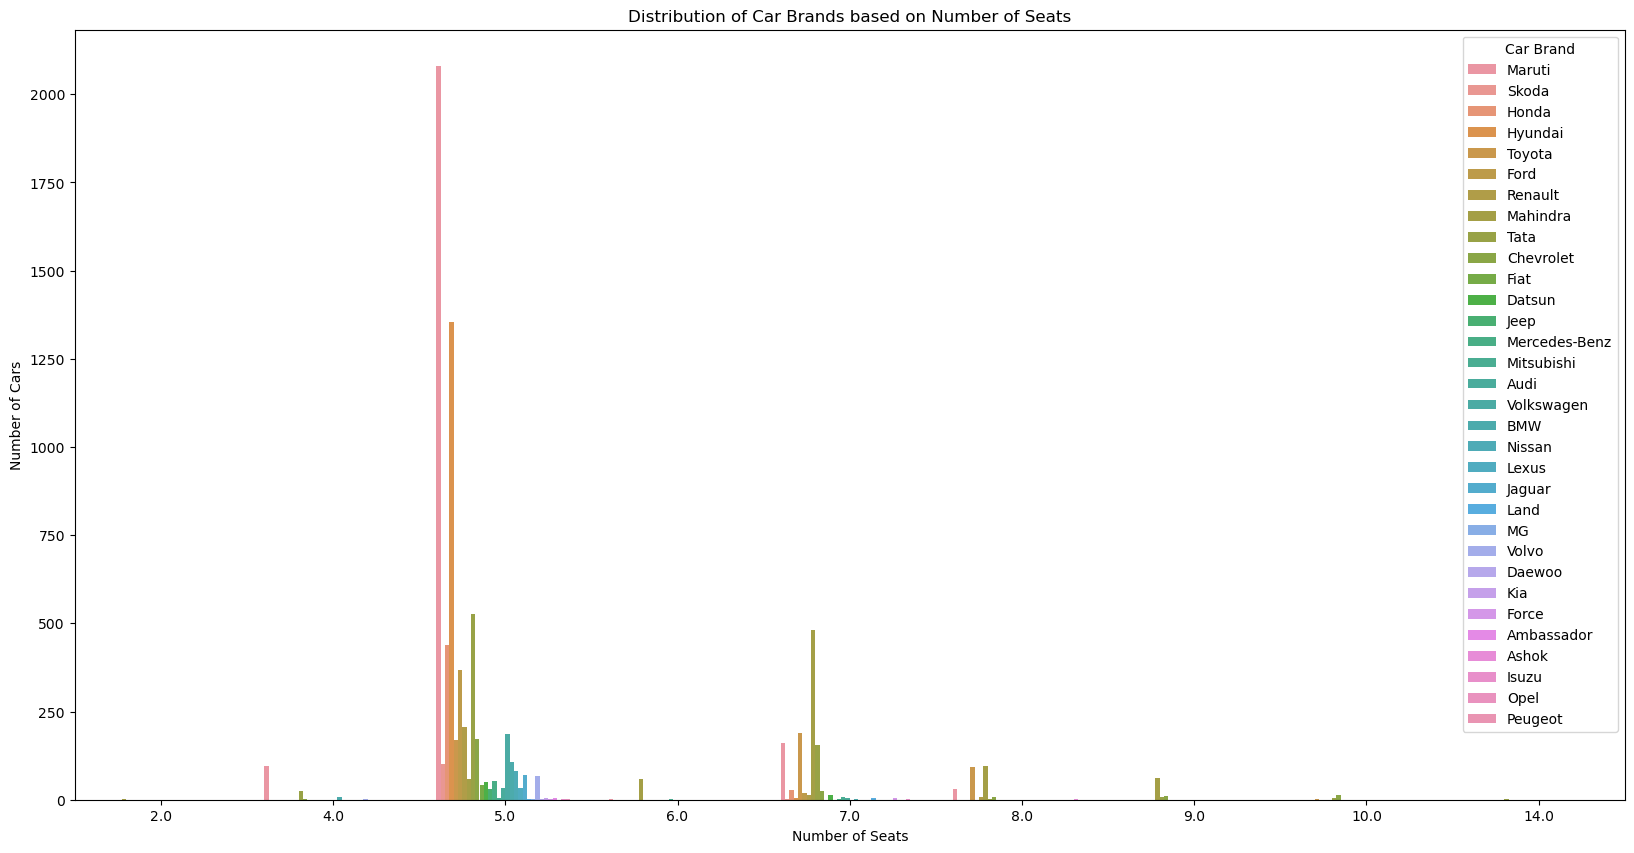

In [37]:
# Bar plot for distribution of car brands based on number of seats
plt.figure(figsize=(20, 10))
sns.countplot(x='seats', hue='name', data=df)
plt.title('Distribution of Car Brands based on Number of Seats')
plt.ylabel('Number of Cars')
plt.xlabel('Number of Seats')
plt.legend(title='Car Brand', loc='upper right')
plt.show()

5. The distributions of each owner type by selling price to see how many cars each price has

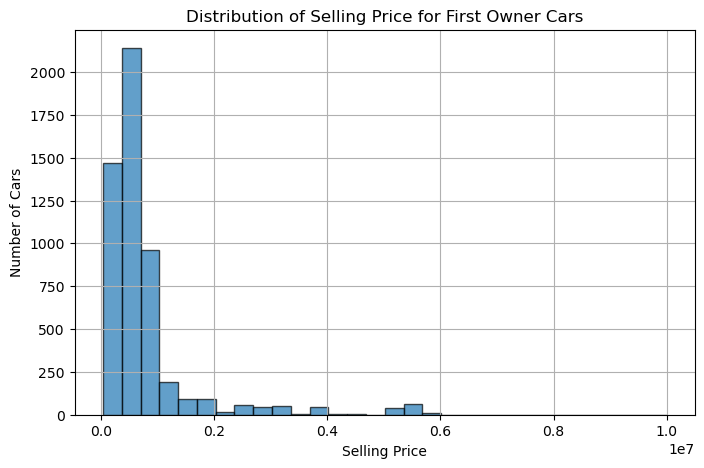

In [38]:
# The distribution of first owner

# Filter data for first owners
df_owner1 = df[df['owner'] == "First Owner"]

# Plot
plt.figure(figsize=(8, 5))
df_owner1['selling_price'].plot(kind='hist', edgecolor='k', alpha=0.7, bins=30) 
plt.title('Distribution of Selling Price for First Owner Cars')
plt.xlabel('Selling Price')
plt.ylabel('Number of Cars')
plt.grid(True)
plt.show()

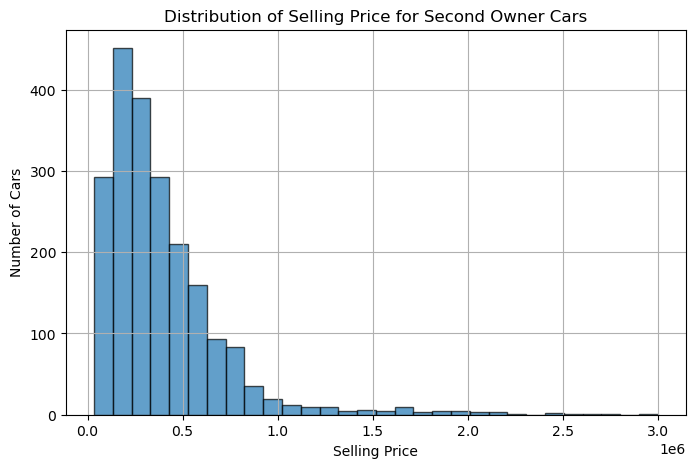

In [39]:
# The distribution of second owner

# Filter data for first owners
df_owner1 = df[df['owner'] == "Second Owner"]

# Plot
plt.figure(figsize=(8, 5))
df_owner1['selling_price'].plot(kind='hist', edgecolor='k', alpha=0.7, bins=30) 
plt.title('Distribution of Selling Price for Second Owner Cars')
plt.xlabel('Selling Price')
plt.ylabel('Number of Cars')
plt.grid(True)
plt.show()

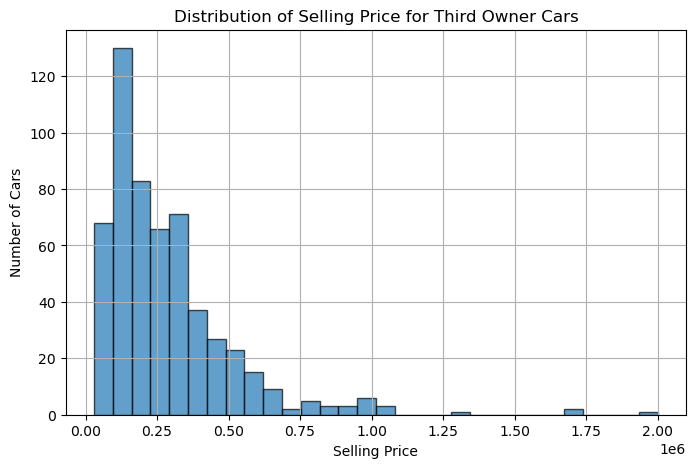

In [40]:
# The distribution of Third Owner

# Filter data for first owners
df_owner1 = df[df['owner'] == "Third Owner"]

# Plot
plt.figure(figsize=(8, 5))
df_owner1['selling_price'].plot(kind='hist', edgecolor='k', alpha=0.7, bins=30)  
plt.title('Distribution of Selling Price for Third Owner Cars')
plt.xlabel('Selling Price')
plt.ylabel('Number of Cars')
plt.grid(True)
plt.show()

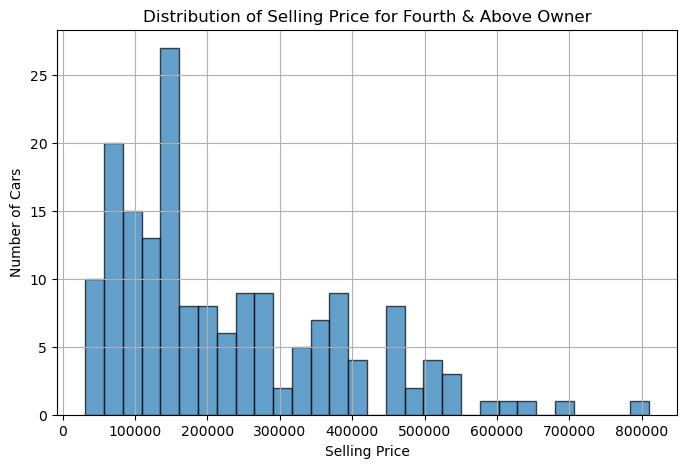

In [41]:
# The distribution of Fourth & Above Owner

# Filter data for first owners
df_owner1 = df[df['owner'] == "Fourth & Above Owner"]

# Plot
plt.figure(figsize=(8, 5))
df_owner1['selling_price'].plot(kind='hist', edgecolor='k', alpha=0.7, bins=30)  
plt.title('Distribution of Selling Price for Fourth & Above Owner')
plt.xlabel('Selling Price')
plt.ylabel('Number of Cars')
plt.grid(True)
plt.show()

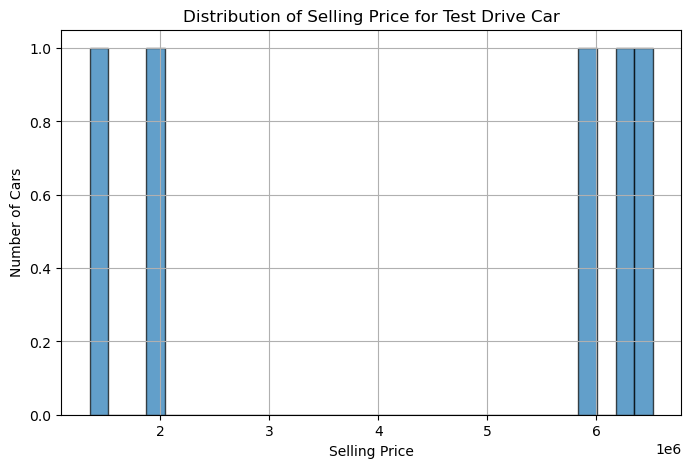

In [42]:
# The distribution of Test Drive Car

# Filter data for first owners
df_owner1 = df[df['owner'] == "Test Drive Car"]

# Plot
plt.figure(figsize=(8, 5))
df_owner1['selling_price'].plot(kind='hist', edgecolor='k', alpha=0.7, bins=30)  
plt.title('Distribution of Selling Price for Test Drive Car')
plt.xlabel('Selling Price')
plt.ylabel('Number of Cars')
plt.grid(True)
plt.show()

6. The distribution of each brand by year

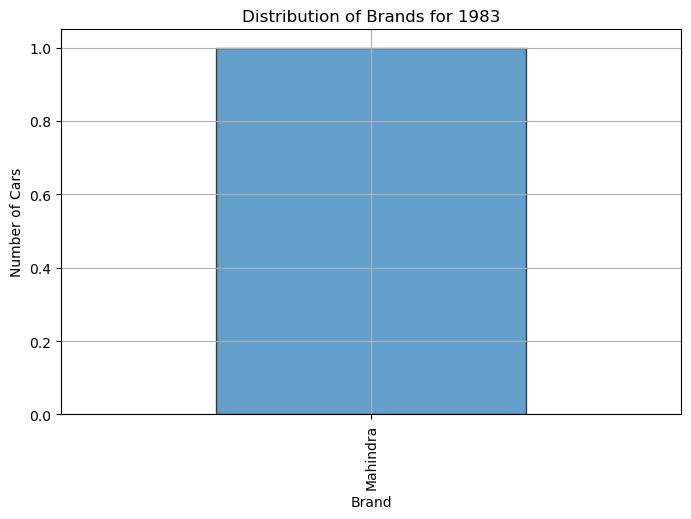

In [43]:

year = 1983
df_year = df[df['year'] == year]

# Plot
plt.figure(figsize=(8, 5))
df_year['name'].value_counts().plot(kind='bar', edgecolor='k', alpha=0.7)
plt.title(f'Distribution of Brands for {year}')
plt.xlabel('Brand')
plt.ylabel('Number of Cars')
plt.grid(True)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability if needed
plt.show()

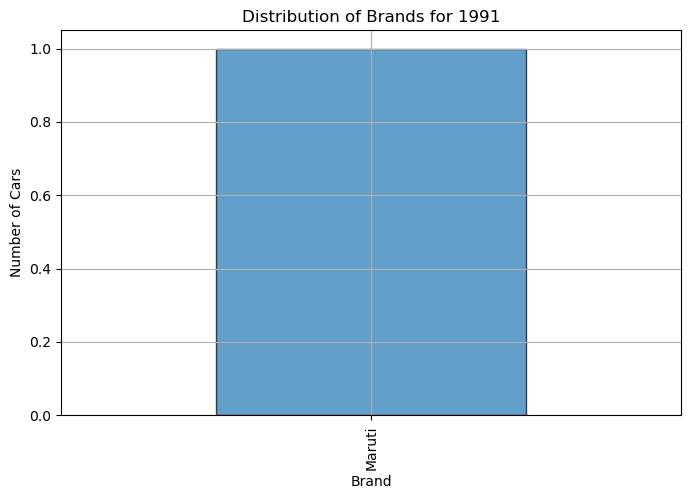

In [44]:

year = 1991
df_year = df[df['year'] == year]

# Plot
plt.figure(figsize=(8, 5))
df_year['name'].value_counts().plot(kind='bar', edgecolor='k', alpha=0.7)
plt.title(f'Distribution of Brands for {year}')
plt.xlabel('Brand')
plt.ylabel('Number of Cars')
plt.grid(True)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability if needed
plt.show()

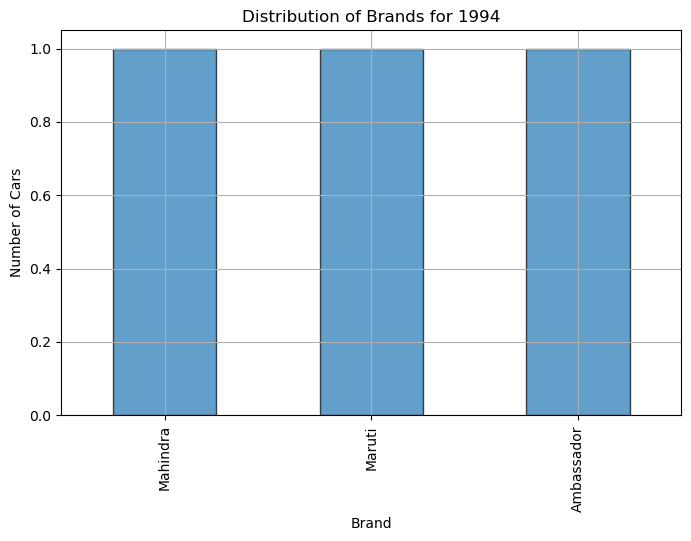

In [45]:

year = 1994
df_year = df[df['year'] == year]

# Plot
plt.figure(figsize=(8, 5))
df_year['name'].value_counts().plot(kind='bar', edgecolor='k', alpha=0.7)
plt.title(f'Distribution of Brands for {year}')
plt.xlabel('Brand')
plt.ylabel('Number of Cars')
plt.grid(True)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability if needed
plt.show()

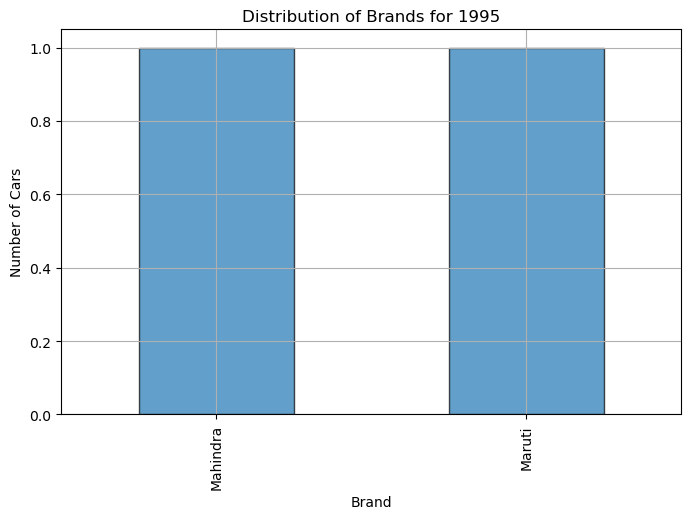

In [46]:

year = 1995
df_year = df[df['year'] == year]

# Plot
plt.figure(figsize=(8, 5))
df_year['name'].value_counts().plot(kind='bar', edgecolor='k', alpha=0.7)
plt.title(f'Distribution of Brands for {year}')
plt.xlabel('Brand')
plt.ylabel('Number of Cars')
plt.grid(True)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability if needed
plt.show()

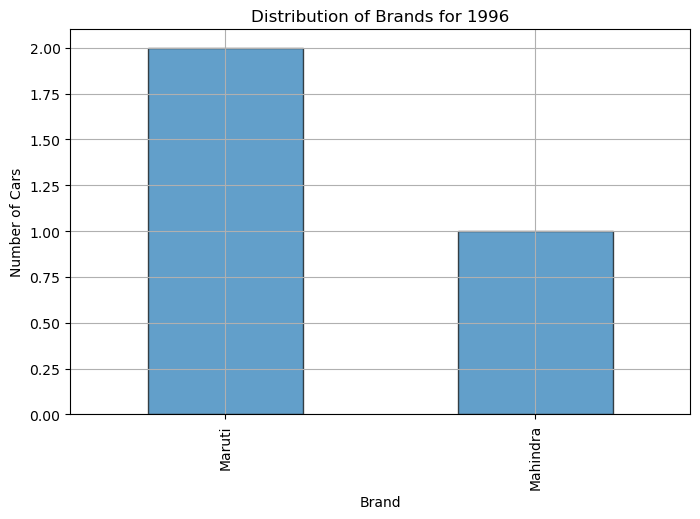

In [47]:

year = 1996
df_year = df[df['year'] == year]

# Plot
plt.figure(figsize=(8, 5))
df_year['name'].value_counts().plot(kind='bar', edgecolor='k', alpha=0.7)
plt.title(f'Distribution of Brands for {year}')
plt.xlabel('Brand')
plt.ylabel('Number of Cars')
plt.grid(True)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability if needed
plt.show()

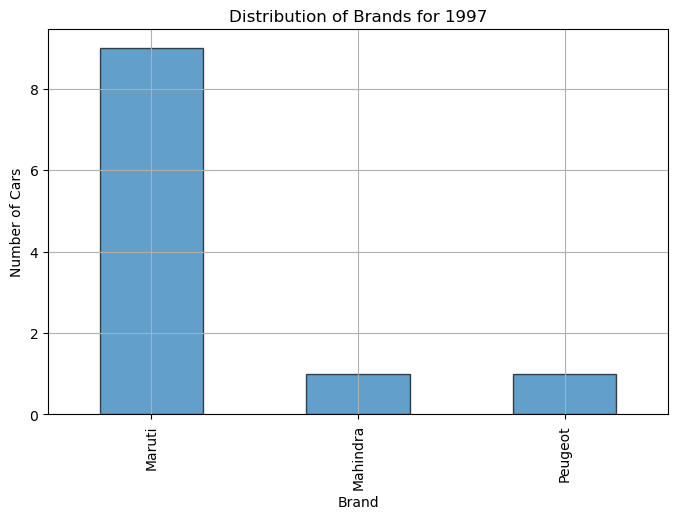

In [48]:

year = 1997
df_year = df[df['year'] == year]

# Plot
plt.figure(figsize=(8, 5))
df_year['name'].value_counts().plot(kind='bar', edgecolor='k', alpha=0.7)
plt.title(f'Distribution of Brands for {year}')
plt.xlabel('Brand')
plt.ylabel('Number of Cars')
plt.grid(True)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability if needed
plt.show()

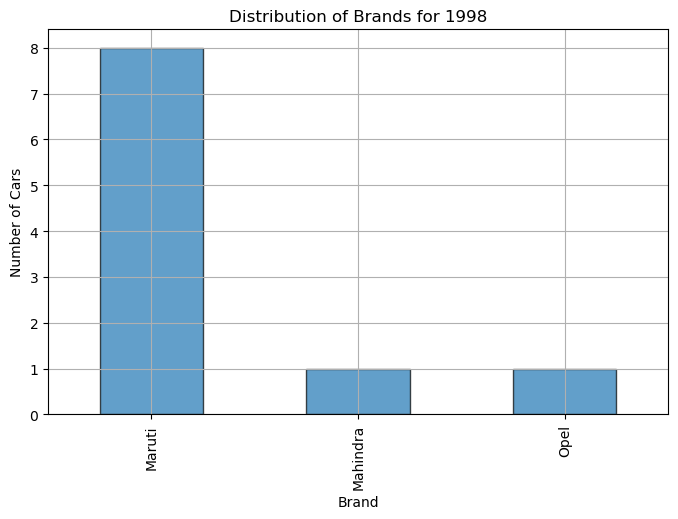

In [49]:

year = 1998
df_year = df[df['year'] == year]

# Plot
plt.figure(figsize=(8, 5))
df_year['name'].value_counts().plot(kind='bar', edgecolor='k', alpha=0.7)
plt.title(f'Distribution of Brands for {year}')
plt.xlabel('Brand')
plt.ylabel('Number of Cars')
plt.grid(True)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability if needed
plt.show()

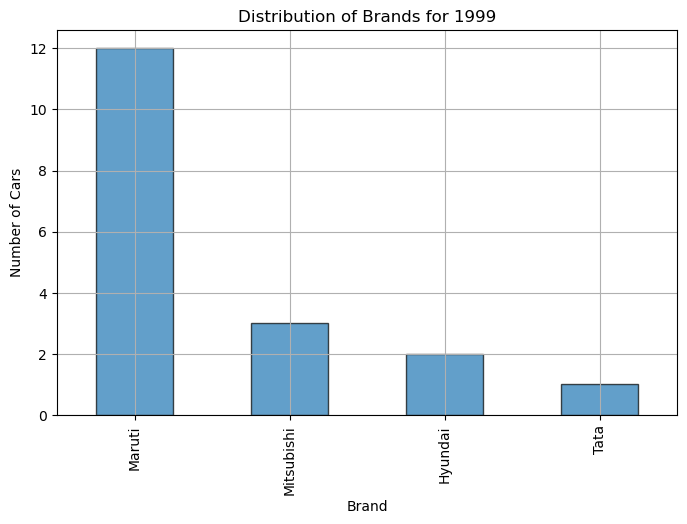

In [50]:

year = 1999
df_year = df[df['year'] == year]

# Plot
plt.figure(figsize=(8, 5))
df_year['name'].value_counts().plot(kind='bar', edgecolor='k', alpha=0.7)
plt.title(f'Distribution of Brands for {year}')
plt.xlabel('Brand')
plt.ylabel('Number of Cars')
plt.grid(True)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability if needed
plt.show()

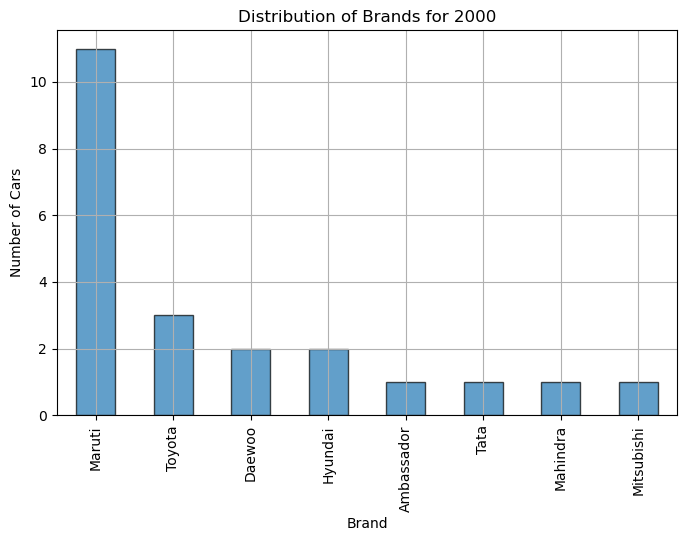

In [51]:

year = 2000
df_year = df[df['year'] == year]

# Plot
plt.figure(figsize=(8, 5))
df_year['name'].value_counts().plot(kind='bar', edgecolor='k', alpha=0.7)
plt.title(f'Distribution of Brands for {year}')
plt.xlabel('Brand')
plt.ylabel('Number of Cars')
plt.grid(True)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability if needed
plt.show()

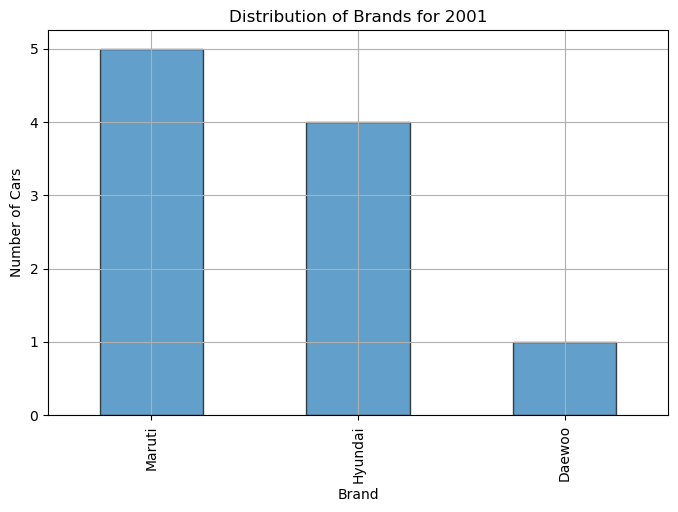

In [52]:

year = 2001
df_year = df[df['year'] == year]

# Plot
plt.figure(figsize=(8, 5))
df_year['name'].value_counts().plot(kind='bar', edgecolor='k', alpha=0.7)
plt.title(f'Distribution of Brands for {year}')
plt.xlabel('Brand')
plt.ylabel('Number of Cars')
plt.grid(True)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability if needed
plt.show()

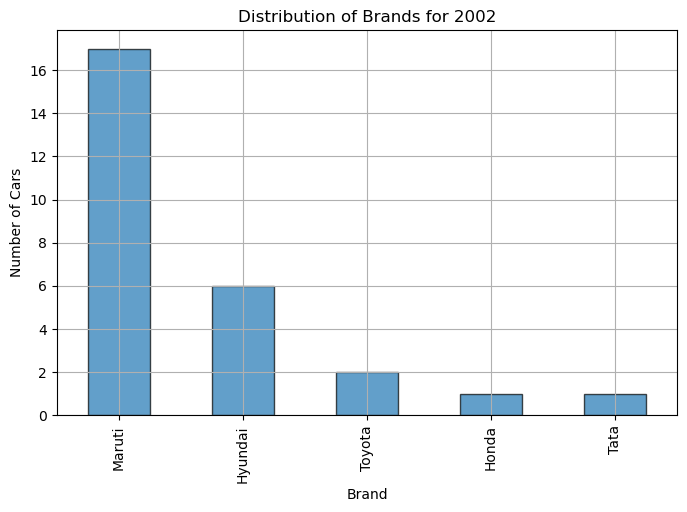

In [53]:

year = 2002
df_year = df[df['year'] == year]

# Plot
plt.figure(figsize=(8, 5))
df_year['name'].value_counts().plot(kind='bar', edgecolor='k', alpha=0.7)
plt.title(f'Distribution of Brands for {year}')
plt.xlabel('Brand')
plt.ylabel('Number of Cars')
plt.grid(True)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability if needed
plt.show()

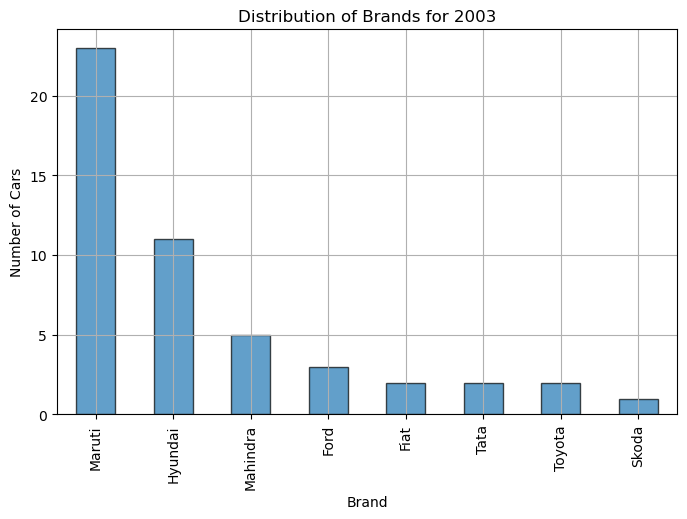

In [54]:

year = 2003
df_year = df[df['year'] == year]

# Plot
plt.figure(figsize=(8, 5))
df_year['name'].value_counts().plot(kind='bar', edgecolor='k', alpha=0.7)
plt.title(f'Distribution of Brands for {year}')
plt.xlabel('Brand')
plt.ylabel('Number of Cars')
plt.grid(True)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability if needed
plt.show()

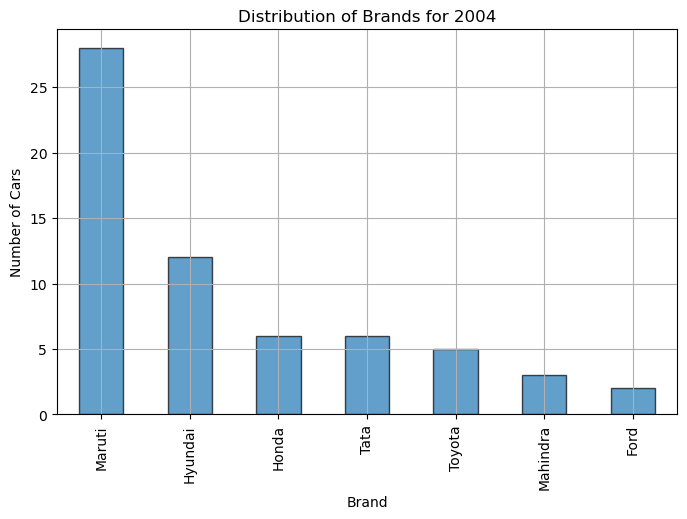

In [55]:

year = 2004
df_year = df[df['year'] == year]

# Plot
plt.figure(figsize=(8, 5))
df_year['name'].value_counts().plot(kind='bar', edgecolor='k', alpha=0.7)
plt.title(f'Distribution of Brands for {year}')
plt.xlabel('Brand')
plt.ylabel('Number of Cars')
plt.grid(True)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability if needed
plt.show()

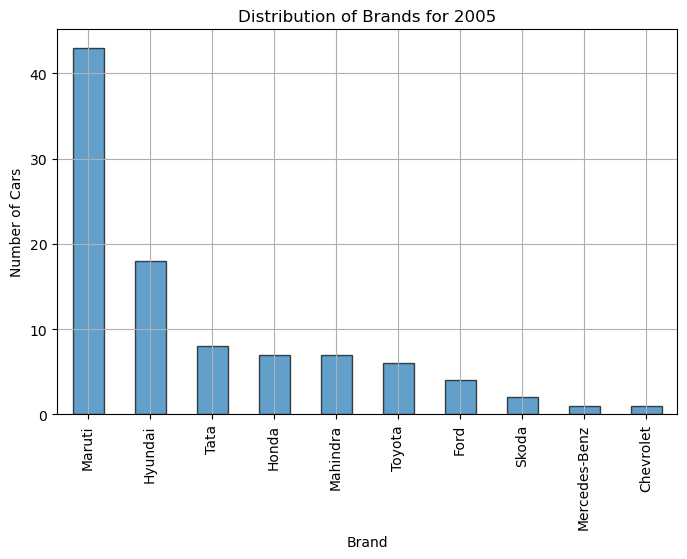

In [56]:

year = 2005
df_year = df[df['year'] == year]

# Plot
plt.figure(figsize=(8, 5))
df_year['name'].value_counts().plot(kind='bar', edgecolor='k', alpha=0.7)
plt.title(f'Distribution of Brands for {year}')
plt.xlabel('Brand')
plt.ylabel('Number of Cars')
plt.grid(True)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability if needed
plt.show()

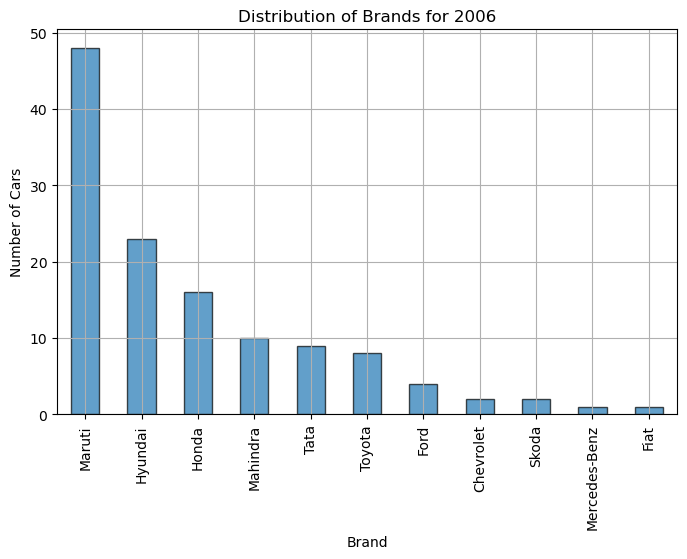

In [57]:

year = 2006
df_year = df[df['year'] == year]

# Plot
plt.figure(figsize=(8, 5))
df_year['name'].value_counts().plot(kind='bar', edgecolor='k', alpha=0.7)
plt.title(f'Distribution of Brands for {year}')
plt.xlabel('Brand')
plt.ylabel('Number of Cars')
plt.grid(True)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability if needed
plt.show()

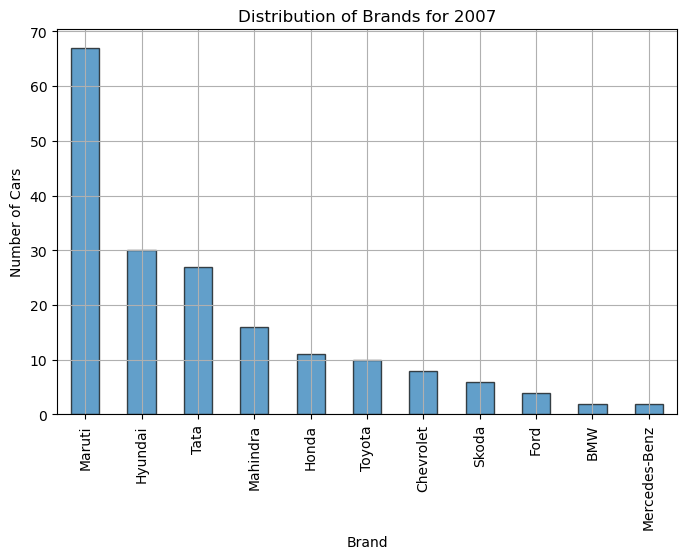

In [58]:

year = 2007
df_year = df[df['year'] == year]

# Plot
plt.figure(figsize=(8, 5))
df_year['name'].value_counts().plot(kind='bar', edgecolor='k', alpha=0.7)
plt.title(f'Distribution of Brands for {year}')
plt.xlabel('Brand')
plt.ylabel('Number of Cars')
plt.grid(True)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability if needed
plt.show()

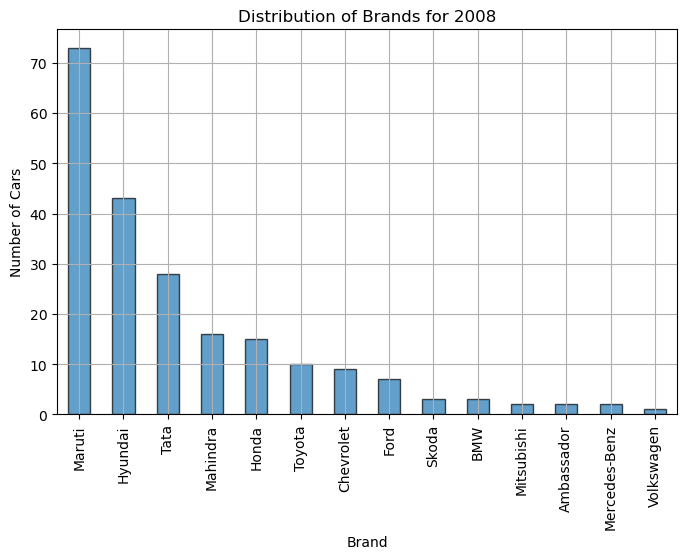

In [59]:

year = 2008
df_year = df[df['year'] == year]

# Plot
plt.figure(figsize=(8, 5))
df_year['name'].value_counts().plot(kind='bar', edgecolor='k', alpha=0.7)
plt.title(f'Distribution of Brands for {year}')
plt.xlabel('Brand')
plt.ylabel('Number of Cars')
plt.grid(True)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability if needed
plt.show()

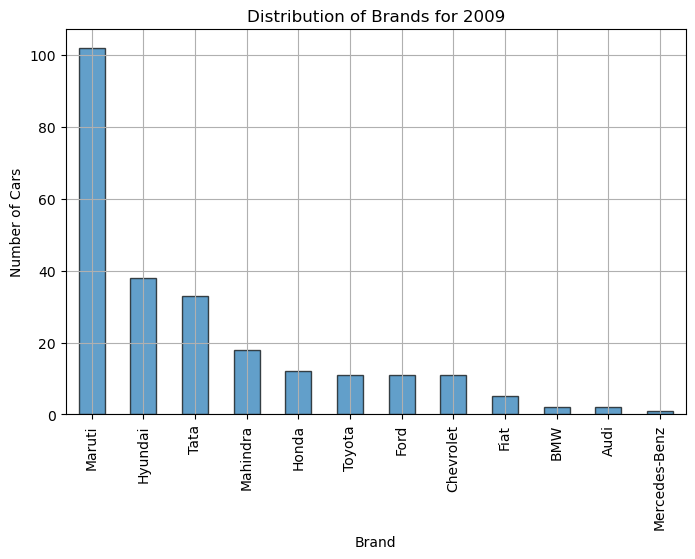

In [60]:

year = 2009
df_year = df[df['year'] == year]

# Plot
plt.figure(figsize=(8, 5))
df_year['name'].value_counts().plot(kind='bar', edgecolor='k', alpha=0.7)
plt.title(f'Distribution of Brands for {year}')
plt.xlabel('Brand')
plt.ylabel('Number of Cars')
plt.grid(True)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability if needed
plt.show()

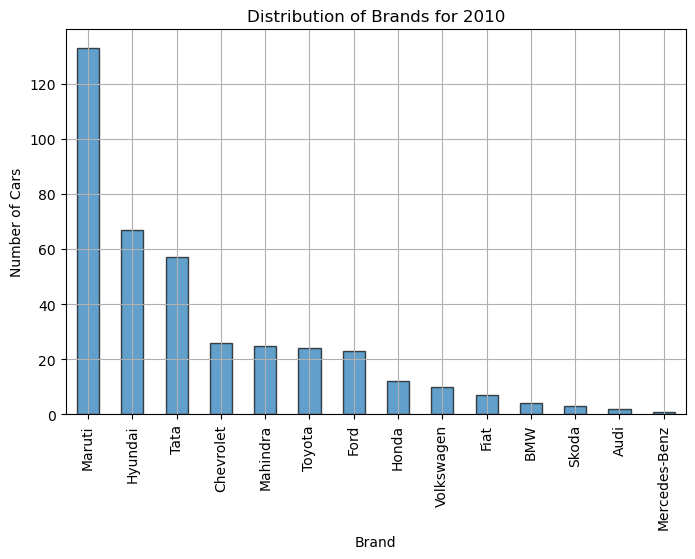

In [61]:

year = 2010
df_year = df[df['year'] == year]

# Plot
plt.figure(figsize=(8, 5))
df_year['name'].value_counts().plot(kind='bar', edgecolor='k', alpha=0.7)
plt.title(f'Distribution of Brands for {year}')
plt.xlabel('Brand')
plt.ylabel('Number of Cars')
plt.grid(True)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability if needed
plt.show()

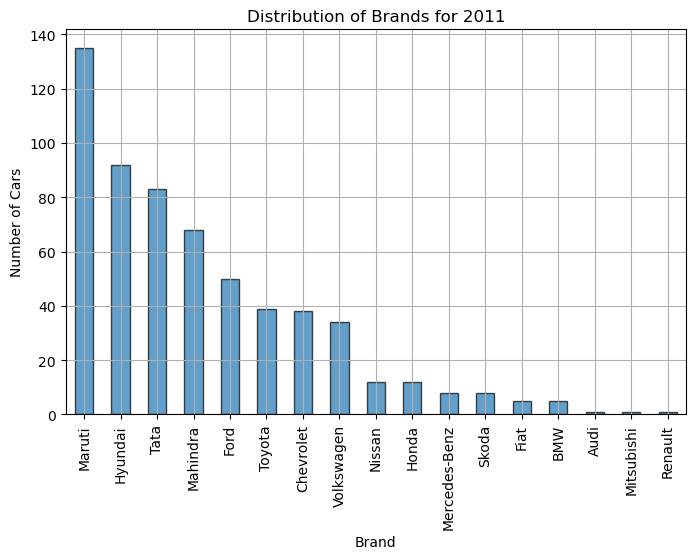

In [62]:

year = 2011
df_year = df[df['year'] == year]

# Plot
plt.figure(figsize=(8, 5))
df_year['name'].value_counts().plot(kind='bar', edgecolor='k', alpha=0.7)
plt.title(f'Distribution of Brands for {year}')
plt.xlabel('Brand')
plt.ylabel('Number of Cars')
plt.grid(True)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability if needed
plt.show()

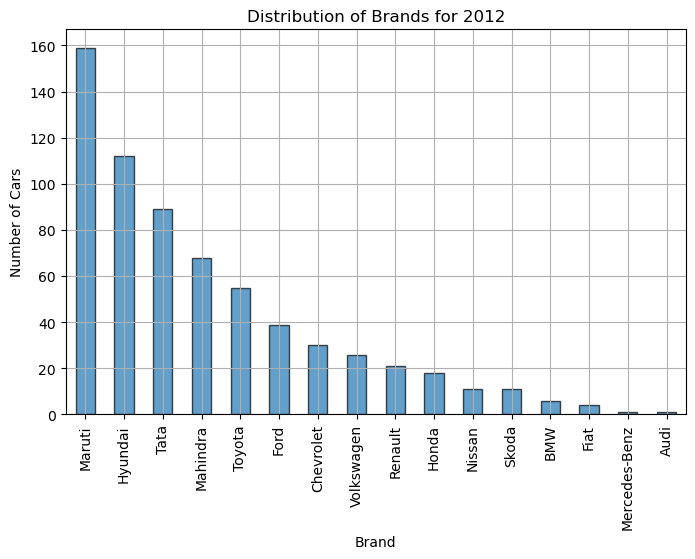

In [63]:

year = 2012
df_year = df[df['year'] == year]

# Plot
plt.figure(figsize=(8, 5))
df_year['name'].value_counts().plot(kind='bar', edgecolor='k', alpha=0.7)
plt.title(f'Distribution of Brands for {year}')
plt.xlabel('Brand')
plt.ylabel('Number of Cars')
plt.grid(True)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability if needed
plt.show()

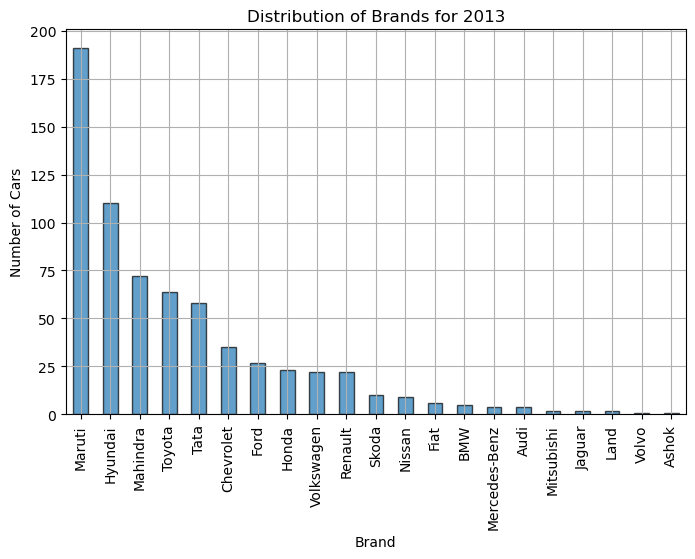

In [64]:

year = 2013
df_year = df[df['year'] == year]

# Plot
plt.figure(figsize=(8, 5))
df_year['name'].value_counts().plot(kind='bar', edgecolor='k', alpha=0.7)
plt.title(f'Distribution of Brands for {year}')
plt.xlabel('Brand')
plt.ylabel('Number of Cars')
plt.grid(True)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability if needed
plt.show()

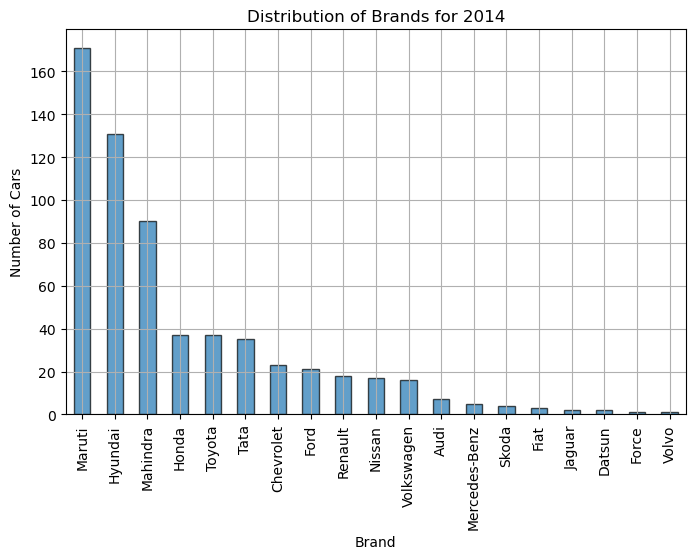

In [65]:

year = 2014
df_year = df[df['year'] == year]

# Plot
plt.figure(figsize=(8, 5))
df_year['name'].value_counts().plot(kind='bar', edgecolor='k', alpha=0.7)
plt.title(f'Distribution of Brands for {year}')
plt.xlabel('Brand')
plt.ylabel('Number of Cars')
plt.grid(True)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability if needed
plt.show()

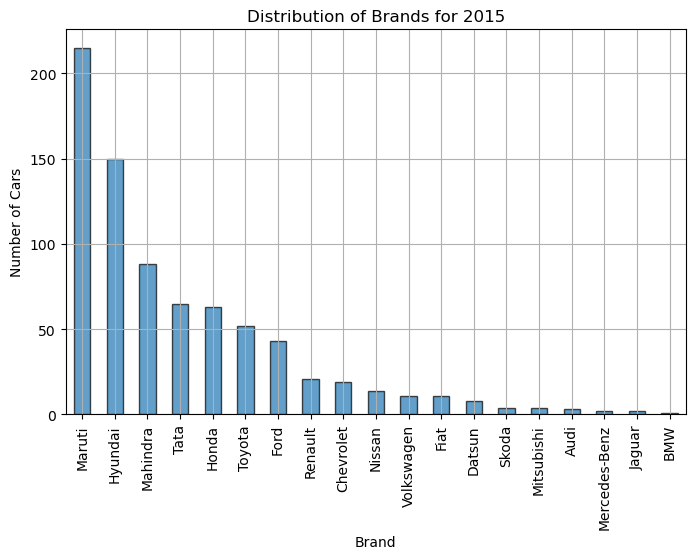

In [66]:

year = 2015
df_year = df[df['year'] == year]

# Plot
plt.figure(figsize=(8, 5))
df_year['name'].value_counts().plot(kind='bar', edgecolor='k', alpha=0.7)
plt.title(f'Distribution of Brands for {year}')
plt.xlabel('Brand')
plt.ylabel('Number of Cars')
plt.grid(True)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability if needed
plt.show()

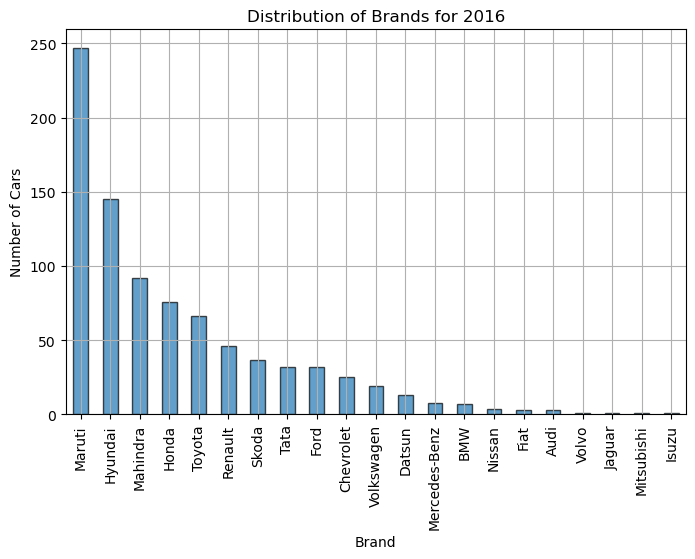

In [67]:

year = 2016
df_year = df[df['year'] == year]

# Plot
plt.figure(figsize=(8, 5))
df_year['name'].value_counts().plot(kind='bar', edgecolor='k', alpha=0.7)
plt.title(f'Distribution of Brands for {year}')
plt.xlabel('Brand')
plt.ylabel('Number of Cars')
plt.grid(True)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability if needed
plt.show()

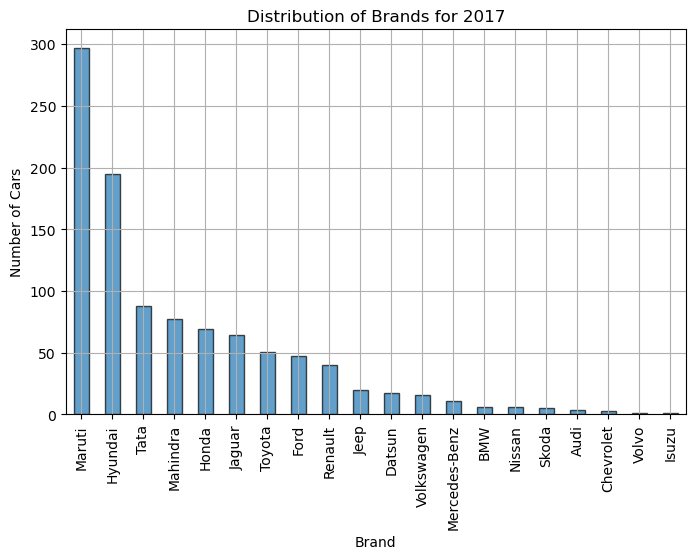

In [68]:

year = 2017
df_year = df[df['year'] == year]

# Plot
plt.figure(figsize=(8, 5))
df_year['name'].value_counts().plot(kind='bar', edgecolor='k', alpha=0.7)
plt.title(f'Distribution of Brands for {year}')
plt.xlabel('Brand')
plt.ylabel('Number of Cars')
plt.grid(True)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability if needed
plt.show()

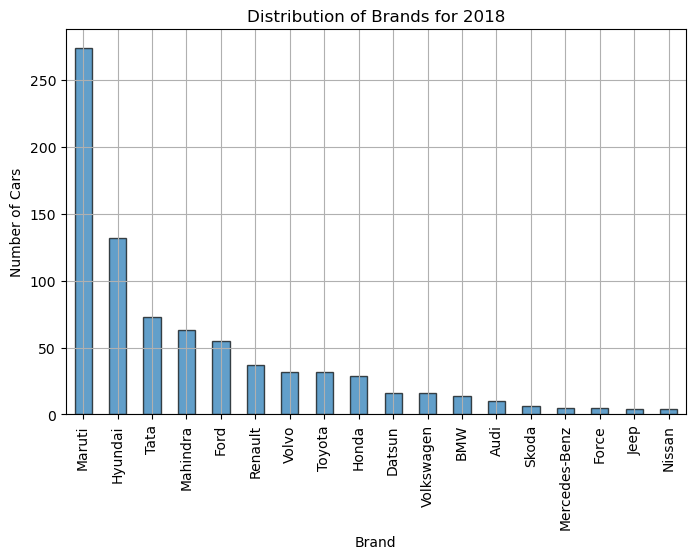

In [69]:

year = 2018
df_year = df[df['year'] == year]

# Plot
plt.figure(figsize=(8, 5))
df_year['name'].value_counts().plot(kind='bar', edgecolor='k', alpha=0.7)
plt.title(f'Distribution of Brands for {year}')
plt.xlabel('Brand')
plt.ylabel('Number of Cars')
plt.grid(True)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability if needed
plt.show()

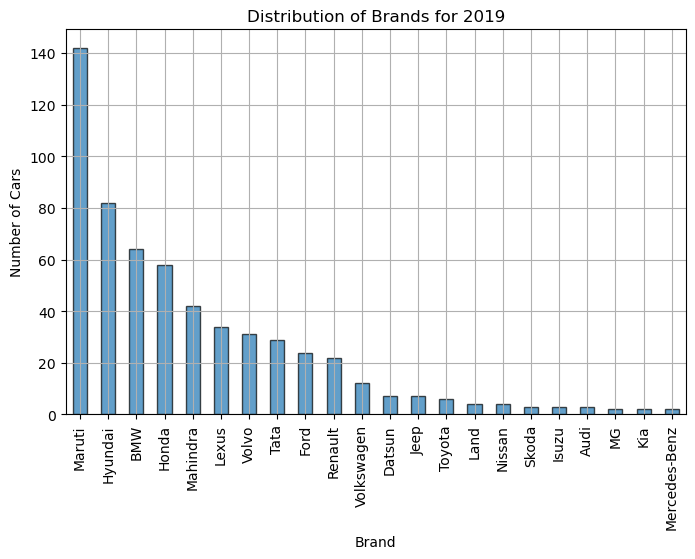

In [70]:

year = 2019
df_year = df[df['year'] == year]

# Plot
plt.figure(figsize=(8, 5))
df_year['name'].value_counts().plot(kind='bar', edgecolor='k', alpha=0.7)
plt.title(f'Distribution of Brands for {year}')
plt.xlabel('Brand')
plt.ylabel('Number of Cars')
plt.grid(True)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability if needed
plt.show()

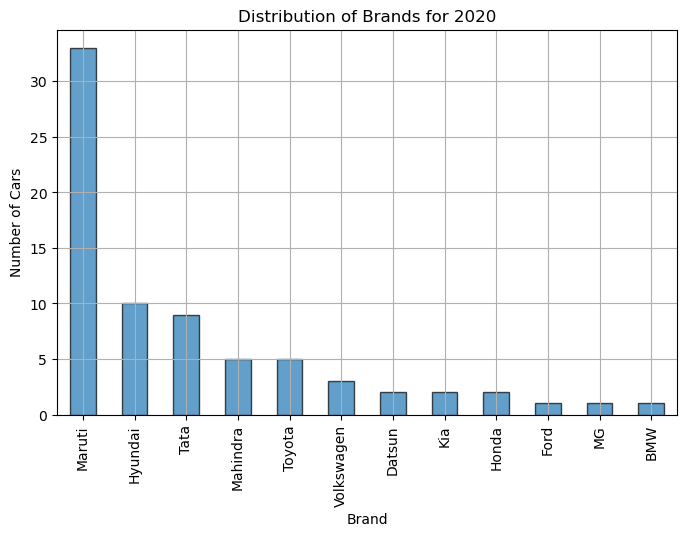

In [71]:

year = 2020
df_year = df[df['year'] == year]

# Plot
plt.figure(figsize=(8, 5))
df_year['name'].value_counts().plot(kind='bar', edgecolor='k', alpha=0.7)
plt.title(f'Distribution of Brands for {year}')
plt.xlabel('Brand')
plt.ylabel('Number of Cars')
plt.grid(True)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability if needed
plt.show()

7. The distribution of average price by brand

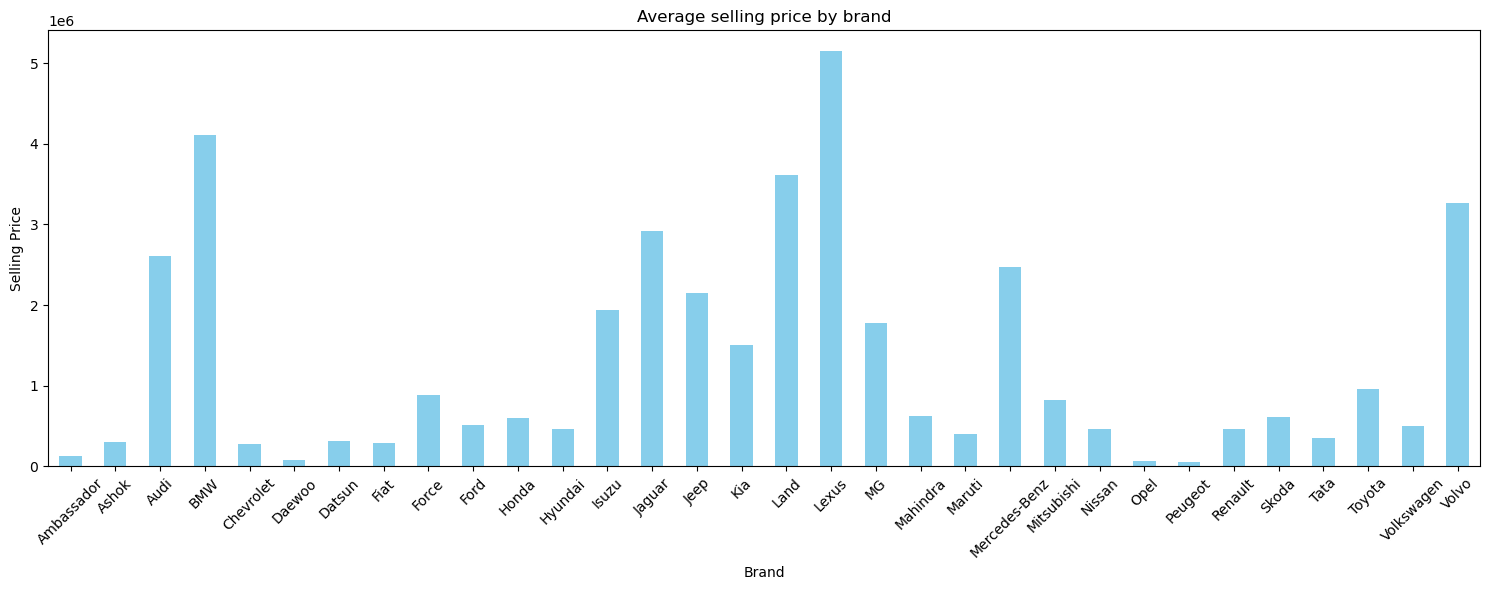

In [72]:
# The average price by brand

# The average price by brand
avg_owner_over_sellingprice = df.groupby('name')['selling_price'].mean()

# Set the figure size
plt.figure(figsize=(15,6))  # Here, 10 is the width and 6 is the height

# Plotting
avg_owner_over_sellingprice.plot(kind='bar', color='skyblue')
plt.title('Average selling price by brand')  # Adjusted the title to reflect the correct variable
plt.ylabel('Selling Price')
plt.xlabel('Brand')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
#By adjusting the figsize values, you can achieve the desired plot size. Increase or decrease the values as needed.

**Correlation Matrix**

A correlation matrix is a table that displays the correlation coefficients between multiple variables. Each cell in the table shows the correlation between two variables. The value is in the range of -1 to 1. If two variables have perfect positive correlation, the value would be 1, if they have perfect negative correlation, the value would be -1, and if they have no correlation, the value would be 0.

C:\Users\user\AppData\Local\Temp\ipykernel_14772\1284947356.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap="coolwarm")  #don't forget these are not all variables! categorical is not here...


<Axes: >

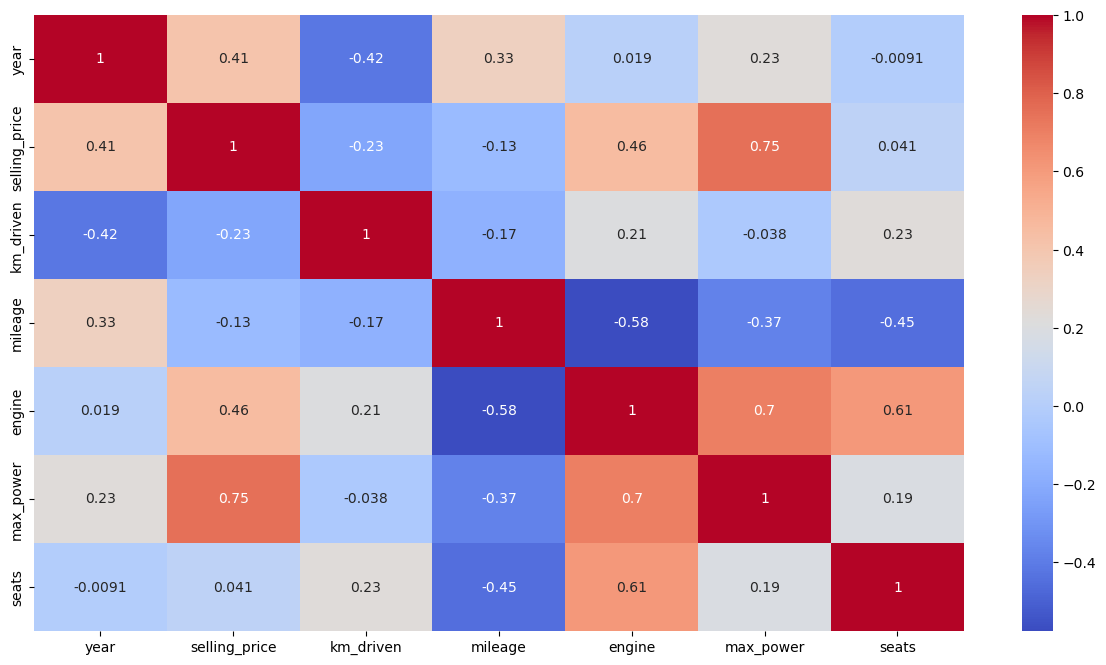

In [73]:
# Let's check out heatmap
plt.figure(figsize = (15,8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")  #don't forget these are not all variables! categorical is not here...

Let's tramsform our categorical features into numerics by using   **LabelEncoder**

In [74]:
from sklearn.preprocessing import LabelEncoder

In [75]:
le = LabelEncoder()

df["seller_type"] = le.fit_transform(df["seller_type"])
df["fuel"] = le.fit_transform(df["fuel"])
df["transmission"] = le.fit_transform(df["transmission"])
df["name"] = le.fit_transform(df["name"])

In [76]:
print("The label of sellertype are of :",df["seller_type"].unique(),"\n")
print("The label of fuel are of :",df["fuel"].unique(),"\n")
print("The label of transmission are of :",df["transmission"].unique(),"\n")
print("The label of name are of :",df["name"].unique(),"\n")

The label of sellertype are of : [1 0 2] 

The label of fuel are of : [1 3 2 0] 

The label of transmission are of : [1 0] 

The label of name are of : [20 27 10 11 29  9 26 19 28  4  7  6 14 21 22  2 30  3 23 17 13 16 18 31
  5 15  8  0  1 12 24 25] 



In [77]:
print("The label of sellertype are of :",df["seller_type"].dtype,"\n")
print("The label of fuel are of :",df["fuel"].dtype,"\n")
print("The label of transmission are of :",df["transmission"].dtype,"\n")
print("The label of name are of :",df["name"].dtype,"\n")

The label of sellertype are of : int32 

The label of fuel are of : int32 

The label of transmission are of : int32 

The label of name are of : int32 



In [78]:
# Only for owner, we will transform the data into 1-5 categories

order = {'First Owner': 1, 'Second Owner': 2, 'Third Owner': 3, 'Fourth & Above Owner':4, 'Test Drive Car':5}
df['owner'] = df['owner'].map(order)

In [79]:
# Let's check its unique values
df['owner'].unique()

array([1, 2, 3, 4, 5], dtype=int64)

In [80]:
# Now let's check its header again
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,20,2014,450000,145500,1,1,1,1,23.40,1248.0,74.00,5.0
1,27,2014,370000,120000,1,1,1,2,21.14,1498.0,103.52,5.0
2,10,2006,158000,140000,3,1,1,3,17.70,1497.0,78.00,5.0
3,11,2010,225000,127000,1,1,1,1,23.00,1396.0,90.00,5.0
4,20,2007,130000,120000,3,1,1,1,16.10,1298.0,88.20,5.0


Let's plot correlation matrix again

<Axes: >

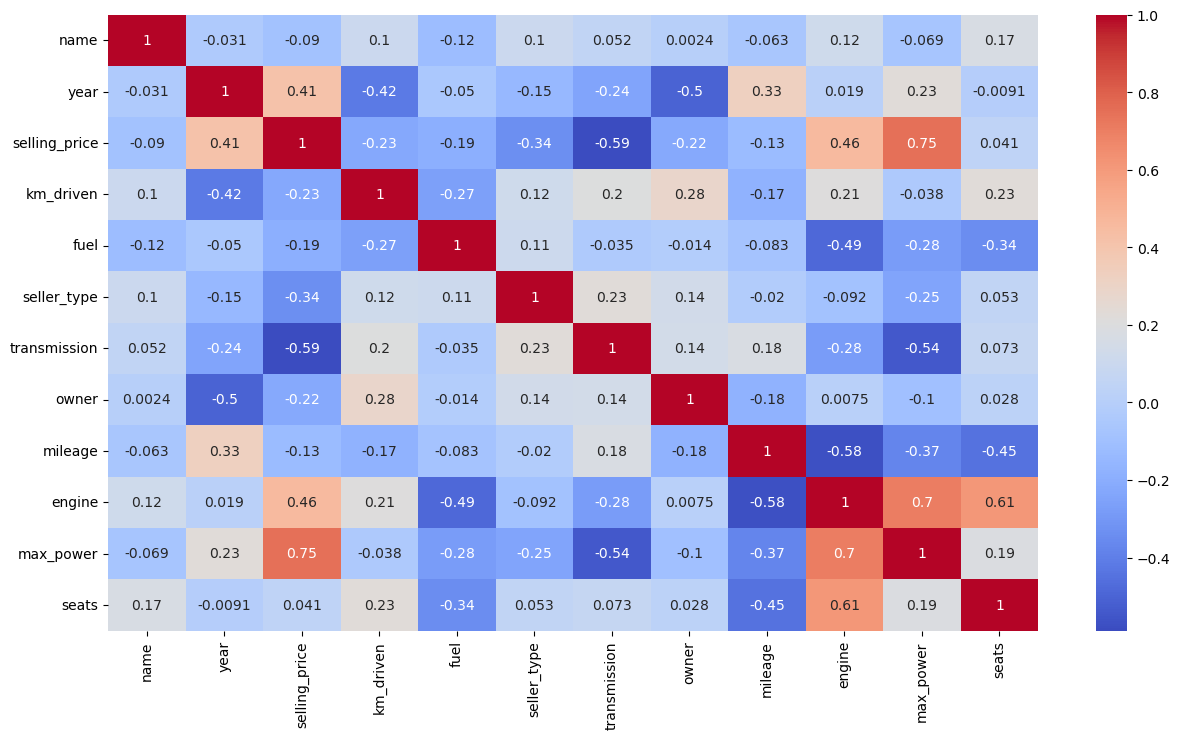

In [81]:
plt.figure(figsize = (15,8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")

According to the matrix, the potential features are year, transmission, engine, and max_power.
However, it can be seen that there is a relatively high positive correlation between the max_power and the engine, so we will select max_power as one of the candidate features since it shows a significant correlation with the selling_price in a positive way.

In the next section, we're gonna use three more algorithms to determine which features are important.

**Predictive Power Score**

Predictive Power Score (PPS) is an alternative to the correlation coefficient for examining the relationship between two variables. While correlation measures linear relationships between two continuous variables, PPS can detect and quantify more types of relationships (linear, non-linear, and categorical) and can be used for different types of variables (categorical, continuous, etc.).

<Axes: xlabel='x', ylabel='y'>

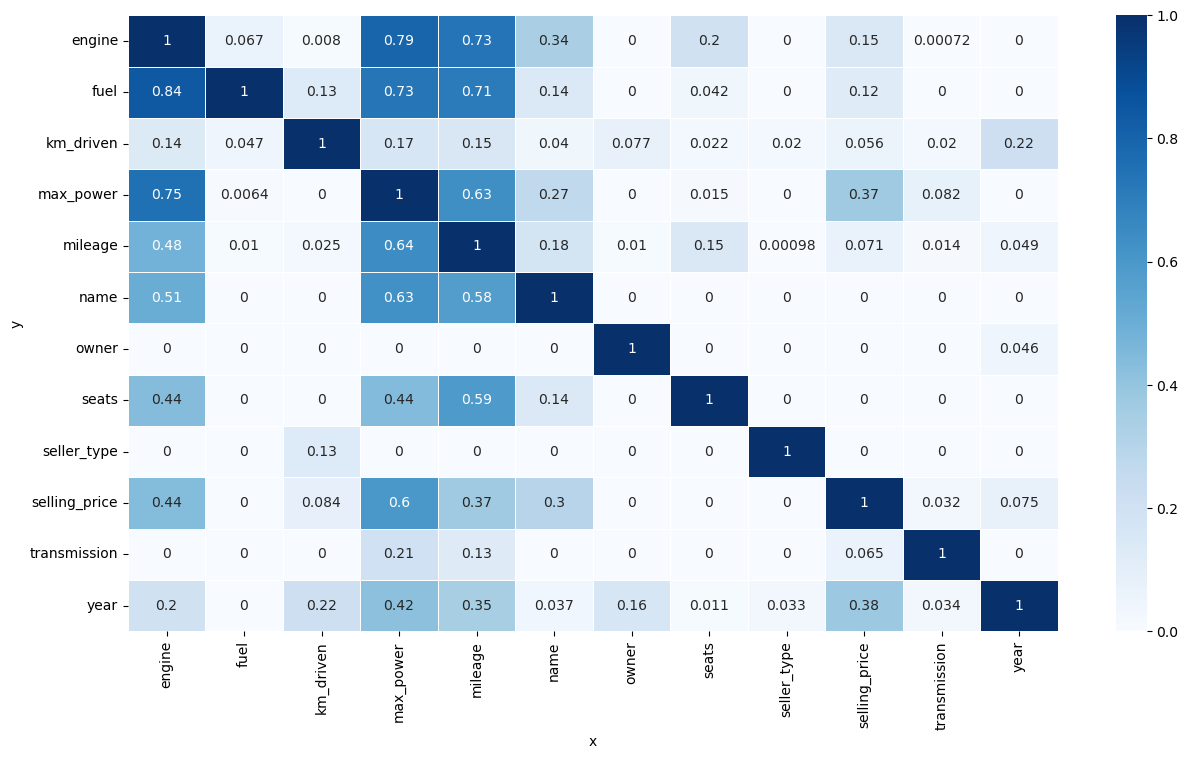

In [82]:
import ppscore as pps

# before using pps, let's drop country and year
dfcopy = df.copy()
#dfcopy.drop(['country', 'year'], axis='columns', inplace=True)

#this needs some minor preprocessing because seaborn.heatmap unfortunately does not accept tidy data
matrix_df = pps.matrix(dfcopy)[['x', 'y', 'ppscore']].pivot(columns='x', index='y', values='ppscore')

#plot
plt.figure(figsize = (15,8))
sns.heatmap(matrix_df, vmin=0, vmax=1, cmap="Blues", linewidths=0.5, annot=True)

As from the data given, we can conclude that the potential important features are max_power, mileage.

**ANOVA Test**

ANOVA (Analysis of Variance) can be used for feature selection, especially when dealing with numerical output (dependent) variables and categorical input (independent) variables. The basic idea behind using ANOVA for feature selection is to determine which features have the most significant impact on the variance of the output variable.

In [83]:
# Filling NA values, since null values are included in the dataset

df["mileage"].fillna(df["mileage"].mean(), inplace=True)
df["engine"].fillna(df["engine"].median(), inplace=True)
df["max_power"].fillna(df["max_power"].median(), inplace=True)
df["seats"].fillna(df["seats"].median(), inplace=True)

In [84]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

# Data prep (assuming df is already defined)
X = df.drop(columns="selling_price")
y = df["selling_price"]

selector = SelectKBest(score_func=f_classif, k=3)  # selecting top 2 features
X_new = selector.fit_transform(X, y)

# Get the features that were selected:
selected_features = X.columns[selector.get_support()]
print(f"Selected Features: {selected_features.tolist()}")
#The crucial change is using X.columns which gives you the column names of the DataFrame X that you passed to fit_transform().

Selected Features: ['year', 'transmission', 'max_power']


**Using Mutual Information**

Mutual Information (MI) is a measure from information theory that quantifies the amount of information obtained about one random variable through observing another random variable. In the context of feature selection, it helps determine how much information a particular feature provides about the target variable. Features that provide more information about the target are deemed more relevant.

In [85]:
from sklearn.feature_selection import mutual_info_regression, SelectKBest

# Select top 5 features based on mutual information
selector = SelectKBest(mutual_info_regression, k=4)
X_new = selector.fit_transform(X, y)
selected_features = X.columns[selector.get_support()]
print("Selected features using Mutual Information:", selected_features)

Selected features using Mutual Information: Index(['year', 'mileage', 'engine', 'max_power'], dtype='object')


**Conclusions**

Based on the result, we can conclude that the important features are year, max_power, and mileage

# **Feature Selection**

In [3]:
# Let's load the dataset again
df = pd.read_csv(DIR + 'Cars - Cars.csv')

In [4]:
# Droping the torquefeature, since it's too much complicated to interpret
df = df.drop(columns="torque")

In [5]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,5.0


In [6]:
# transforming the owner feature into 1-5 category

order = {'First Owner': 1, 'Second Owner': 2, 'Third Owner': 3, 'Fourth & Above Owner':4, 'Test Drive Car':5}
df['owner'] = df['owner'].map(order)
df['owner'][0:4]

0    1
1    2
2    3
3    1
Name: owner, dtype: int64

In [7]:
# Extracting only the first word for the name feature

df['name'] = df['name'].str.split().str.get(0)

df['name']

0        Maruti
1         Skoda
2         Honda
3       Hyundai
4        Maruti
         ...   
8123    Hyundai
8124    Hyundai
8125     Maruti
8126       Tata
8127       Tata
Name: name, Length: 8128, dtype: object

In [8]:
# Filtering out features that contain mixed text and number values.
df["mileage"] = df["mileage"].str.extract(r'(\d+(\.\d+)?)')[0]
df["engine"] = df["engine"].str.extract(r'(\d+(\.\d+)?)')[0]
df["max_power"] = df["max_power"].str.extract(r'(\d+(\.\d+)?)')[0]

df["engine"] = df["engine"].astype(float)
df["max_power"] = df["max_power"].astype(float)
df["mileage"] = df["mileage"].astype(float)

In [9]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti,2014,450000,145500,Diesel,Individual,Manual,1,23.40,1248.0,74.00,5.0
1,Skoda,2014,370000,120000,Diesel,Individual,Manual,2,21.14,1498.0,103.52,5.0
2,Honda,2006,158000,140000,Petrol,Individual,Manual,3,17.70,1497.0,78.00,5.0
3,Hyundai,2010,225000,127000,Diesel,Individual,Manual,1,23.00,1396.0,90.00,5.0
4,Maruti,2007,130000,120000,Petrol,Individual,Manual,1,16.10,1298.0,88.20,5.0


According to the Power Predictive Score, max_power, mileage,and year are selected as our strong features

In [10]:
#x is our strong features
X = df[        ['year','max_power','mileage']        ]

#y is simply the life expectancy col
y = df["selling_price"]

In [11]:
X.head()

,year,max_power,mileage
0,2014,74.00,23.40
1,2014,103.52,21.14
2,2006,78.00,17.70
3,2010,90.00,23.00
4,2007,88.20,16.10


Train and Test Split

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [13]:
X_test.head()

,year,max_power,mileage
1971,2004,100.00,12.8
4664,2014,138.10,14.0
5448,2016,73.94,23.2
3333,2006,100.00,16.9
2316,2013,74.00,22.9


In [14]:
X_train.head()

,year,max_power,mileage
6783,2006,46.30,19.70
1073,2018,174.50,12.90
7756,2017,187.74,19.59
144,2013,138.03,14.28
6424,2013,74.00,23.40


# Preprocessing

Let's explore the null values and remove them

In [15]:
#check for null values
X_train[   ['year', 'max_power','mileage'] ].isna().sum()

year           0
max_power    149
mileage      151
dtype: int64

In [16]:
X_test[  ['year', 'max_power','mileage']  ].isna().sum()

year          0
max_power    67
mileage      70
dtype: int64

In [17]:
# Checking null data for traning label set
y_train.isna().sum()

0

In [18]:
# Checking null data for testing label set
y_test.isna().sum()

0

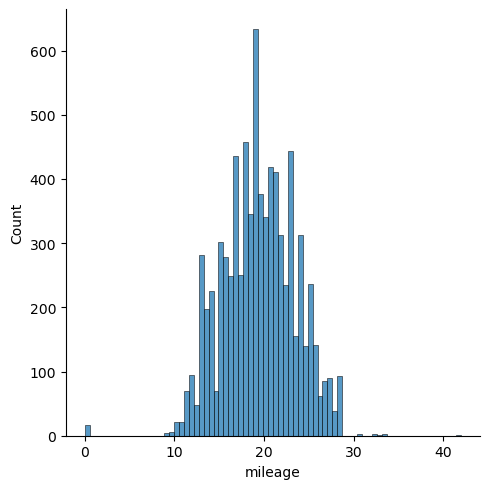

In [19]:
# Checking the distribution of mileage
sns.displot(data=df, x='mileage')

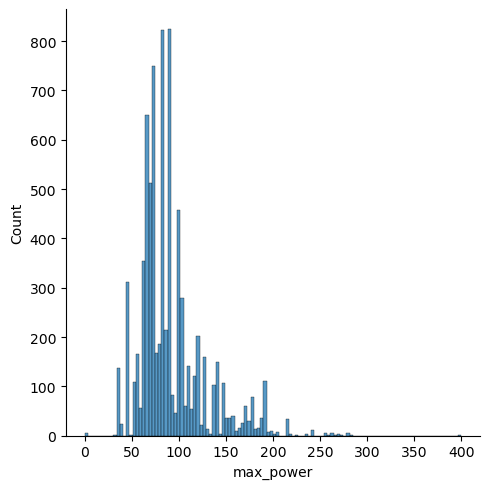

In [20]:
# Checking the distribution of max_power
sns.displot(data=df, x='max_power')

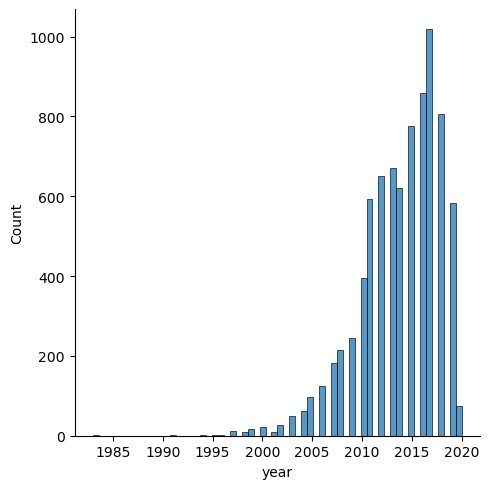

In [21]:
# Checking the distribution of max_power
sns.displot(data=df, x='year')

In [22]:
#let's fill the training set first!

X_train['mileage'].fillna(X_train['mileage'].median(), inplace=True)
X_train['max_power'].fillna(X_train['max_power'].median(), inplace=True)
X_train['year'].fillna(X_train['year'].median(), inplace=True)

In [23]:
#let's fill the testing set with the training distribution first!

X_test['mileage'].fillna(X_train['mileage'].median(), inplace=True)
X_test['max_power'].fillna(X_train['max_power'].median(), inplace=True)
X_test['year'].fillna(X_train['year'].median(), inplace=True)

In [24]:
#check again
X_train[['year','max_power','mileage']].isna().sum()

year         0
max_power    0
mileage      0
dtype: int64

In [25]:
X_train['mileage'].mean()

19.414276674283705

In [26]:
X_train['mileage'].std()

3.965679176460303

In [27]:
X_train['max_power'].max()

282.0

In [28]:
X_train['max_power'].min()

0.0

In [29]:
X_train['year'].min()

1983

In [30]:
X_train['year'].max()

2020

Checking Outlier

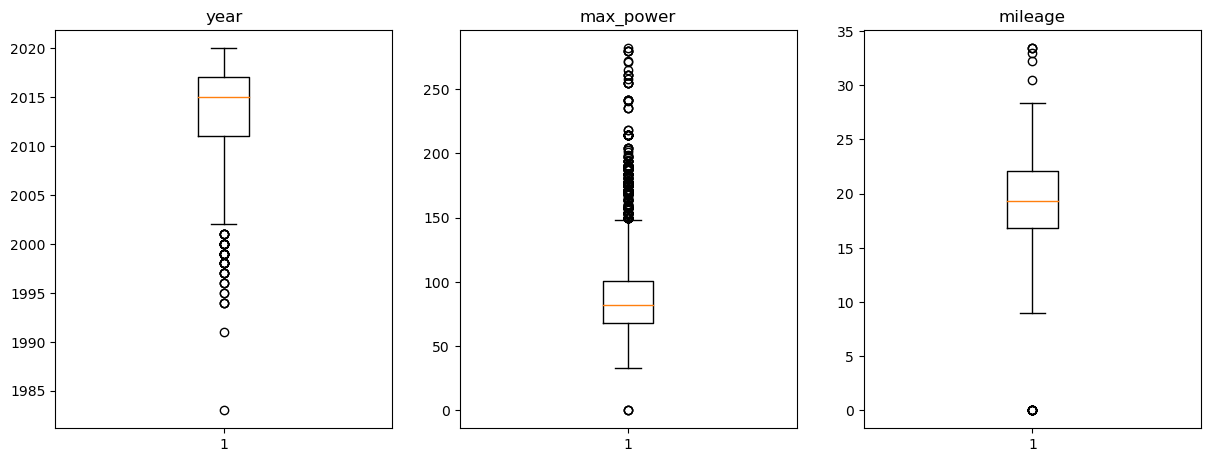

In [31]:
import matplotlib.pyplot as plt

# Create a dictionary of columns.
col_dict = {'year':1,'max_power':2,'mileage':3}

# Detect outliers in each variable using box plots.
plt.figure(figsize=(20,30))

for variable,i in col_dict.items():
                     plt.subplot(5,4,i)
                     plt.boxplot(X_train[variable])
                     plt.title(variable)

plt.show()

In [32]:
def outlier_count(col, data=X_train):
    try:
        q75, q25 = np.percentile(data[col], [75, 25])
        iqr = q75 - q25
        min_val = q25 - (iqr*1.5)
        max_val = q75 + (iqr*1.5)
        outlier_count = len(np.where((data[col] > max_val) | (data[col] < min_val))[0])
        outlier_percent = round(outlier_count/len(data[col])*100, 2)

        if(outlier_count > 0):
            print("\n"+15*'-' + col + 15*'-'+"\n")
            print('Number of outliers: {}'.format(outlier_count))
            print('Percent of data that is outlier: {}%'.format(outlier_percent))
    except Exception as e:
        print(f"Error processing column {col}: {str(e)}")

In [33]:
numeric_cols = X_train.select_dtypes(include=[np.number]).columns.tolist()
for col in numeric_cols:
    outlier_count(col)


---------------year---------------

Number of outliers: 55
Percent of data that is outlier: 0.97%

---------------max_power---------------

Number of outliers: 421
Percent of data that is outlier: 7.4%

---------------mileage---------------

Number of outliers: 19
Percent of data that is outlier: 0.33%


Scaling

In [34]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [35]:
# Initialize the scalers
minmax_scaler = MinMaxScaler()

In [36]:
X_train[['max_power', 'year']] = minmax_scaler.fit_transform(X_train[['max_power', 'year']])

In [37]:
# Initialize the scalers
zscore_scaler = StandardScaler()

X_train['mileage']  = zscore_scaler.fit_transform(np.array(X_train['mileage']).reshape(-1,1))

In [38]:
# Transform test data using the scalers fitted on training data (DO NOT fit the scaler on the test data)

X_test[['max_power','year']] = minmax_scaler.transform(X_test[['max_power','year']])
X_test['mileage'] = zscore_scaler.transform(np.array(X_test['mileage']).reshape(-1, 1))


In [39]:
# Scaling the Selling_Price by using log scale
y_train = np.log(y_train)
y_test = np.log(y_test)

In [40]:
y_train[:10]

6783    11.608236
1073    14.893920
7756    14.897316
144     13.345507
6424    12.886641
1340    12.660328
3044    12.847927
5666    13.337475
2091    13.910821
7953    13.217674
Name: selling_price, dtype: float64

In [41]:
y_test[:10]

1971    12.196022
4664    13.122363
5448    12.959844
3333    11.918391
2316    13.171154
6870    11.982929
5953    13.017003
2418    13.253392
1811    12.043554
3608    11.813030
Name: selling_price, dtype: float64

In [42]:
# Let's check shapes of all X_train, X_test, y_train, y_test
print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of y_test: ", y_test.shape)

Shape of X_train:  (5689, 3)
Shape of X_test:  (2439, 3)
Shape of y_train:  (5689,)
Shape of y_test:  (2439,)


In [43]:
type(y_train)

pandas.core.series.Series

In [44]:
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

In [45]:
# Let's check shapes of all X_train, X_test, y_train, y_test
print("Shape of X_train: ", type(X_train))
print("Shape of X_test: ", type(X_test))
print("Shape of y_train: ", type(y_train))
print("Shape of y_test: ", type(y_test))

Shape of X_train:  <class 'numpy.ndarray'>
Shape of X_test:  <class 'numpy.ndarray'>
Shape of y_train:  <class 'numpy.ndarray'>
Shape of y_test:  <class 'numpy.ndarray'>


# Modeling

Using LinearRegression

In [46]:
from sklearn.model_selection import KFold

class LinearRegression(object):
    
            
    def __init__(self,regularization, lr, method, init_method, momentum, num_epochs, batch_size):
        self.lr = lr
        self.num_epochs = num_epochs
        self.batch_size = batch_size
        self.method = method
        self.cv = KFold(n_splits=3)
        self.regularization = regularization
        self.init_method = init_method
        self.momentum = momentum  # Added momentum parameter
        self.theta_list = []

    def mse(self, y_true, y_pred):
        return ((y_pred - y_true) ** 2).sum() / y_true.shape[0]
    
    def fit(self, X_train, y_train):
            
        #create a list of kfold scores
        self.kfold_scores = list()
        
        #reset val loss
        self.val_loss_old = np.infty

        #kfold.split in the sklearn.....
        #5 splits
        for fold, (train_idx, val_idx) in enumerate(self.cv.split(X_train)):
            
           
                    # Assign values using iloc first
            X_cross_train = X_train[train_idx]
            y_cross_train = y_train[train_idx]
            X_cross_val = X_train[val_idx]
            y_cross_val = y_train[val_idx]
            
            
            
             # Initialize theta based on the chosen method
            if self.init_method == 'zeros':
                
                self.theta = np.zeros(X_cross_train.shape[1])
                
            elif self.init_method == 'xavier':
                m = X_cross_train.shape[1]

                 # calculate the range for the weights
                lower, upper = -(1.0 / np.sqrt(m)), (1.0 / np.sqrt(m))


                 # you need to basically randomly pick weights within this range
                 # generate random numbers
                numbers = np.random.rand(1000)
                scaled = lower + numbers * (upper - lower)

                # Randomly pick a number from scaled
                self.theta = np.random.choice(scaled,size=m)
                
                
                #variance = 2.0 / (X_cross_train.shape[1] + 1) # +1 for bias term
                #self.theta = np.random.randn(X_cross_train.shape[1]) * np.sqrt(variance)
            else:
                raise ValueError("Unknown init_method: {}".format(self.init_method))
            
            #define X_cross_train as only a subset of the data
            #how big is this subset?  => mini-batch size ==> 50
            
            #one epoch will exhaust the WHOLE training set
            with mlflow.start_run(run_name=f"Fold-{fold}", nested=True):
                
                params = {"method": self.method, "lr": self.lr, "reg": type(self).__name__}
                mlflow.log_params(params=params)
                
                for epoch in range(self.num_epochs):
                
                    #with replacement or no replacement
                    #with replacement means just randomize
                    #with no replacement means 0:50, 51:100, 101:150, ......300:323
                    #shuffle your index
                    perm = np.random.permutation(X_cross_train.shape[0])
                    X_cross_train = X_cross_train[perm]
                    y_cross_train = y_cross_train[perm]
                    
                    if self.method == 'sto':
                        for batch_idx in range(X_cross_train.shape[0]):
                            X_method_train = X_cross_train[batch_idx].reshape(1, -1) 
                            y_method_train = y_cross_train[batch_idx].reshape(-1)
                            train_loss = self._train(X_method_train, y_method_train)
                            
       
                            
                    elif self.method == 'mini':
                        for batch_idx in range(0, X_cross_train.shape[0], self.batch_size):
                            #batch_idx = 0, 50, 100, 150
                            X_method_train = X_cross_train[batch_idx:batch_idx+self.batch_size, :]
                            y_method_train = y_cross_train[batch_idx:batch_idx+self.batch_size]
                            train_loss = self._train(X_method_train, y_method_train)
                    else:
                        X_method_train = X_cross_train
                        y_method_train = y_cross_train
                        train_loss = self._train(X_method_train, y_method_train)

                    mlflow.log_metric(key="train_loss", value=train_loss, step=epoch)

                    yhat_val = self.predict(X_cross_val)
                    val_loss_new = self.mse(y_cross_val, yhat_val)
                    mlflow.log_metric(key="val_loss", value=val_loss_new, step=epoch)
                    
                    #record dataset
                    #mlflow_train_data = mlflow.data.from_numpy(features=X_method_train, targets=y_method_train)
                    #mlflow.log_input(mlflow_train_data, context="training")
                    
                    #mlflow_val_data = mlflow.data.from_numpy(features=X_cross_val, targets=y_cross_val)
                    #mlflow.log_input(mlflow_val_data, context="validation")
                    
                    #early stopping
                    if np.allclose(val_loss_new, self.val_loss_old):
                        break
                    self.val_loss_old = val_loss_new
                    
                    
                self.theta_list.append(self.theta.copy())
                self.kfold_scores.append(val_loss_new)
                print(f"Fold {fold}: {val_loss_new}")
            
    def r2(self, y_true, y_pred):
        ss_res = ((y_true - y_pred) ** 2).sum()
        ss_tot = ((y_true - y_true.mean()) ** 2).sum()
        r2_score = 1 - (ss_res/ss_tot)
        return r2_score
        
    def _train(self, X, y):
        yhat = self.predict(X)
        m = X.shape[0]        
        grad = (1/m) * X.T @(yhat - y) + self.regularization.derivation(self.theta)

        if self.momentum != 0:
            if not hasattr(self, 'momentum_velocity'):
                self.momentum_velocity = np.zeros_like(self.theta)
            self.momentum_velocity = self.momentum * self.momentum_velocity - self.lr * grad
            self.theta += self.momentum_velocity
        else:
            self.theta -= self.lr * grad

        return self.mse(y, yhat)
    
    def predict(self, X):
        return X @ self.theta  #===>(m, n) @ (n, )
    
    def _coef(self):
        return self.theta[1:]  #remind that theta is (w0, w1, w2, w3, w4.....wn)
                               #w0 is the bias or the intercept
                               #w1....wn are the weights / coefficients / theta
    def _bias(self):
        return self.theta[0]

In [50]:

class Polynomial:
    
    def __init__(self, degree,regularization, lr, method, init_method, momentum, num_epochs, batch_size):
        self.degree = degree
        self.lr = lr
        self.num_epochs = num_epochs
        self.batch_size = batch_size
        self.method = method
        self.cv = KFold(n_splits=3)
        self.regularization = regularization
        self.init_method = init_method
        self.momentum = momentum  # Added momentum parameter
        self.regularization = regularization
        self.theta_list = []
        
    def r2(self, y_true, y_pred):
        ss_res = ((y_true - y_pred) ** 2).sum()
        ss_tot = ((y_true - y_true.mean()) ** 2).sum()
        r2_score = 1 - (ss_res/ss_tot)
        return r2_score

    def mse(self, y_true, y_pred):
        return ((y_pred - y_true) ** 2).sum() / y_true.shape[0]

    def _train(self, X, y):
        yhat = self.predict(X)
        X_poly = self._polynomial_features(X)
        m = X.shape[0]
        
        
        # this is to decide if regularization is used or not
        if(self.regularization):
            grad = (1/m) * X_poly.T @ (yhat - y) + self.regularization.derivation(self.theta)
        else:
            grad = (1/m) * X_poly.T @ (yhat - y)
        
        
        if self.momentum != 0:
            if not hasattr(self, 'momentum_velocity'):
                self.momentum_velocity = np.zeros_like(self.theta)
             # use a fixed value for momentum, e.g., 0.9
            self.momentum_velocity = 0.9 * self.momentum_velocity - self.lr * grad
            self.theta += self.momentum_velocity
        else:
            self.theta -= self.lr * grad

    
        return self.mse(y, yhat)

    
    def fit(self, X_train, y_train):
        
        #create a list of kfold scores
        self.kfold_scores = list()
        
        #X_poly = self._polynomial_features(X_train)
        
        
        best_r2 = -float("inf")
        best_weights = None
       

        # Add bias term (intercept) to X_poly
        #reset val loss
        self.val_loss_old = np.infty

        
        
        for fold, (train_idx, val_idx) in enumerate(self.cv.split(X_train)):
            
            
           
            X_cross_train = X_train[train_idx]
            y_cross_train = y_train[train_idx]
            X_cross_val = X_train[val_idx]
            y_cross_val = y_train[val_idx]    
           

            # Initialization of theta
            if self.init_method == 'zeros':
                
                self.theta = np.zeros(X_train.shape[1] * self.degree)
                
            elif self.init_method == 'xavier':
                
                m = X_train.shape[1] * self.degree

                 # calculate the range for the weights
                lower, upper = -(1.0 / np.sqrt(m)), (1.0 / np.sqrt(m))


                 # you need to basically randomly pick weights within this range
                 # generate random numbers
                numbers = np.random.rand(1000)
                scaled = lower + numbers * (upper - lower)

                # Randomly pick a number from scaled
                self.theta = np.random.choice(scaled,size=m)
                
                #variance = 2.0 / (X_poly.shape[1] + 1)  # +1 for bias term
                #self.theta = np.random.randn(X_poly.shape[1]) * np.sqrt(variance)
            else:
                raise ValueError("Unknown init_method: {}".format(self.init_method))
                
                
                #one epoch will exhaust the WHOLE training set
            with mlflow.start_run(run_name=f"Fold-{fold}", nested=True):
                
                params = {"method": self.method, "lr": self.lr, "reg": type(self).__name__}
                mlflow.log_params(params=params)
                
                for epoch in range(self.num_epochs):
                
                    #with replacement or no replacement
                    #with replacement means just randomize
                    #with no replacement means 0:50, 51:100, 101:150, ......300:323
                    #shuffle your index
                    perm = np.random.permutation(X_cross_train.shape[0])
                    X_cross_train = X_cross_train[perm]
                    y_cross_train = y_cross_train[perm]
                    
                    
                    
                    if self.method == 'sto':
                        for batch_idx in range(X_cross_train.shape[0]):
                            X_method_train = X_cross_train[batch_idx].reshape(1, -1) #(11,) ==> (1, 11) ==> (m, n)
                            y_method_train = y_cross_train[batch_idx].reshape(-1) 
                            train_loss = self._train(X_method_train, y_method_train)
                    elif self.method == 'mini':
                        for batch_idx in range(0, X_cross_train.shape[0], self.batch_size):
                            #batch_idx = 0, 50, 100, 150
                            X_method_train = X_cross_train[batch_idx:batch_idx+self.batch_size, :]
                            y_method_train = y_cross_train[batch_idx:batch_idx+self.batch_size]
                            train_loss = self._train(X_method_train, y_method_train)
                    else:
                        X_method_train = X_cross_train
                        y_method_train = y_cross_train
                        train_loss = self._train(X_method_train, y_method_train)

                        
                        
                    mlflow.log_metric(key="train_loss", value=train_loss, step=epoch)

                    yhat_val = self.predict(X_cross_val)
                    val_loss_new = self.mse(y_cross_val, yhat_val)
                    mlflow.log_metric(key="val_loss", value=val_loss_new, step=epoch)
                    
                    #record dataset
                    #mlflow_train_data = mlflow.data.from_numpy(features=X_method_train, targets=y_method_train)
                    #mlflow.log_input(mlflow_train_data, context="training")
                    
                    #mlflow_val_data = mlflow.data.from_numpy(features=X_cross_val, targets=y_cross_val)
                    #mlflow.log_input(mlflow_val_data, context="validation")
                    
                    #early stopping
                    if np.allclose(val_loss_new, self.val_loss_old):
                        break
                    self.val_loss_old = val_loss_new
            
                self.kfold_scores.append(val_loss_new)
                self.theta_list.append(self.theta)   # Save the theta after each fold
                
                # Calculate R-squared for the current fold
                r2 = self.r2(y_cross_val, yhat_val)
                
                # Check if the current R-squared is better than the best one
                if r2 > best_r2:
                    best_r2 = r2
                    best_weights = self.theta  # Store the weights associated with the best R-squared
                    
                    
                print(f"Fold {fold}: {val_loss_new}")
                print(f"Theta : {self.theta}")
                      
        print(f"Best R-squared: {best_r2}")
        self.best_weights = best_weights  # Store the best weights as an instance variable
                

       
    def predict(self, X):
        X_poly = self._polynomial_features(X)
        return X_poly @ self.theta
    
    

    def _polynomial_features(self, X):
        n = X.shape[1]

        # List to store the polynomial features
        features = []

        for j in range(n):
            for d in range(1, self.degree + 1):
                features.append(X[:, j:j+1]**d)

        # Stack them horizontally to form the output matrix
        X_poly = np.hstack(features)

        return X_poly
    
    def plot_feature_importance(self,weights, custom_labels, figsize=(12,5)):
    
        # Ensure weights and custom_labels are of the same length
        assert len(weights) == len(custom_labels), "Length of weights and custom_labels must be the same"

        data = np.abs(weights)
        x = np.arange(len(weights))

        fig, axes = plt.subplots(figsize=figsize)

        axes.bar(x=x, height=data)

        # Set custom x-tick labels for each x-value
        axes.set_xticks(x)
        axes.set_xticklabels(custom_labels)
        axes.set_xlabel("Features")
        axes.set_ylabel("The magnitude of weights (Absolute Weight)")
        plt.show()








class LassoPenalty:
    
    def __init__(self, l):
        self.l = l # lambda value
        
    def __call__(self, theta): #__call__ allows us to call class as method
        return self.l * np.sum(np.abs(theta))
        
    def derivation(self, theta):
        return self.l * np.sign(theta)
    
    
    
    
class RidgePenalty:
    
    def __init__(self, l):
        self.l = l
        
    def __call__(self, theta): #__call__ allows us to call class as method
        return self.l * np.sum(np.square(theta))
        
    def derivation(self, theta):
        return self.l * 2 * theta
    
    
    
    
class ElasticPenalty:
    
    def __init__(self, l = 0.1, l_ratio = 0.5):
        self.l = l 
        self.l_ratio = l_ratio

    def __call__(self, theta):  #__call__ allows us to call class as method
        l1_contribution = self.l_ratio * self.l * np.sum(np.abs(theta))
        l2_contribution = (1 - self.l_ratio) * self.l * 0.5 * np.sum(np.square(theta))
        return (l1_contribution + l2_contribution)

    def derivation(self, theta):
        l1_derivation = self.l * self.l_ratio * np.sign(theta)
        l2_derivation = self.l * (1 - self.l_ratio) * theta
        return (l1_derivation + l2_derivation)
    
    
    
    
class Lasso(LinearRegression):
    
    def __init__(self, method, lr, l, init_method, momentum, num_epochs, batch_size):
        self.regularization = LassoPenalty(l)
        # Make sure to pass the expected arguments in the correct order to the parent class
        super().__init__(method=method, lr=lr, regularization=self.regularization, init_method=init_method, momentum=momentum, num_epochs=num_epochs, batch_size=batch_size)

        
        
        
        
class Ridge(LinearRegression):
    
    def __init__(self, method, lr, l, init_method, momentum, num_epochs, batch_size):
        self.regularization = RidgePenalty(l)
        # Make sure to pass the expected arguments in the correct order to the parent class
        super().__init__(method=method, lr=lr, regularization=self.regularization, init_method=init_method, momentum=momentum, num_epochs=num_epochs, batch_size=batch_size)

        
        
        
        
class ElasticNet(LinearRegression):
    
    def __init__(self, method, lr, l,init_method, momentum,num_epochs, batch_size,l_ratio):
        self.regularization = ElasticPenalty(l, l_ratio)
        # Make sure to pass the expected arguments in the correct order to the parent class
        super().__init__(method=method, lr=lr, regularization=self.regularization, init_method=init_method, momentum=momentum, num_epochs=num_epochs, batch_size=batch_size)

        
        
        
        
class Normal(LinearRegression):
       def __init__(self, method, lr, l, init_method, momentum, num_epochs, batch_size):
            self.regularization = RidgePenalty(l)
            # Make sure to pass the expected arguments in the correct order to the parent class
            super().__init__(method=method, lr=lr, regularization=self.regularization, init_method=init_method, momentum=momentum, num_epochs=num_epochs, batch_size=batch_size)

            
            
class LassoPoly(Polynomial):
    
    def __init__(self,degree, method, lr, l, init_method, momentum, num_epochs, batch_size):
        self.regularization = LassoPenalty(l)
        # Make sure to pass the expected arguments in the correct order to the parent class
        super().__init__(degree=degree,method=method, lr=lr, regularization=self.regularization, init_method=init_method, momentum=momentum, num_epochs=num_epochs, batch_size=batch_size)

        
        
        
        
class RidgePoly(Polynomial):
    
    def __init__(self,degree, method, lr, l, init_method, momentum, num_epochs, batch_size):
        self.regularization = RidgePenalty(l)
        # Make sure to pass the expected arguments in the correct order to the parent class
        super().__init__(degree=degree,method=method, lr=lr, regularization=self.regularization, init_method=init_method, momentum=momentum, num_epochs=num_epochs, batch_size=batch_size)

        
        
        
        
class ElasticNetPoly(Polynomial):
    
    def __init__(self,degree, method, lr, l,init_method, momentum,num_epochs, batch_size,l_ratio):
        self.regularization = ElasticPenalty(l, l_ratio)
        # Make sure to pass the expected arguments in the correct order to the parent class
        super().__init__(degree=degree,method=method, lr=lr, regularization=self.regularization, init_method=init_method, momentum=momentum, num_epochs=num_epochs, batch_size=batch_size)


In [51]:
#helper function for looping classnames
import sys

def str_to_class(classname):
    return getattr(sys.modules[__name__], classname)

# Experiment

**Initialization of MLFlow**

In [79]:
#experiment tracking
import mlflow
import os
# This the dockerized method.
# We build two docker containers, one for python/jupyter and another for mlflow.
# The url `mlflow` is resolved into another container within the same composer.
mlflow.set_tracking_uri("http://localhost:5000")
# In the dockerized way, the user who runs this code will be `root`.
# The MLflow will also log the run user_id as `root`.
# To change that, we need to set this environ["LOGNAME"] to your name.
os.environ["LOGNAME"] = "Pirunrat"
#mlflow.set_experiment(experiment_name=f"Pirunrat")

**In this project, we run several experiments including**
 1. Comparing different algorithms including Polynomial, Ridge, Lasso, Normal
 2. Comparing with momentum and without momentum by using the selected algorithm above
 3. Comparing with stochastic, mini-batch, batch
 4. Comparing with zero and xavier initialization weight
 5. Comparing with learning rate of 0.01, 0.001, and 0.0001

**1. Cross validation comparison different parameters with Polynomial**  

In [51]:

mlflow.set_experiment(experiment_name=f"Polynomial")
# Momentum settings
momentums = [0.9, 0]

# Gradient Descent variants
gd_variants = ["sto", "mini", "batch"]

# Initializations
initializations = ["zeros", "xavier"]

# Learning Rates
learning_rates = [0.01, 0.001, 0.0001]


for momentum in momentums:
    for gd_variant in gd_variants:
        for init in initializations:
            for lr in learning_rates:
                
                #mlflow.set_experiment(experiment_name=f"Polynomial with {momentum}{gd_variant}{init}{lr}")
                
                print(f"Polynomial with {momentum},{gd_variant},{init},{lr}")
               
                params = {
                    "degree":2,
                    "method": gd_variant,
                    "momentum": momentum,
                    "init_method": init,
                    "lr": lr,
                    "batch_size":10,
                    "num_epochs":500,
                    "regularization":None
                }

                #if reg == "Polynomial":
                    #params["degree"] = 2  # or whatever degree you want
                #elif reg in ["Ridge", "Lasso"]:
                    #params["l"] = 0.1

                mlflow.start_run(run_name=f"Start method-{params['method']}-momentum-{params['momentum']}-init_method-{params['init_method']}-lr-{params['lr']}-Polynomial-", nested=True)

                print("="*40)
                print(f"Running for Polynomial with settings {params}")
                print("="*40)

                type_of_regression = str_to_class("Polynomial")  
                model = type_of_regression(**params)
                model.fit(X_train, y_train)
                yhat = model.predict(X_test)

                # Calculate the MSE
                mse = model.mse(y_test, yhat)

                # Calculate the R-Square
                r2 = model.r2(y_test, yhat)

                print("Test MSE: ", mse)
                mlflow.log_metric(key="test_mse", value=mse)

                print("Test R2: ", r2)
                mlflow.log_metric(key="test_r2", value=r2)

                signature = mlflow.models.infer_signature(X_train, model.predict(X_train))
                mlflow.sklearn.log_model(model, artifact_path='model', signature=signature)

                mlflow.end_run()

Polynomial with 0.9,sto,zeros,0.01
Running for Polynomial with settings {'degree': 2, 'method': 'sto', 'momentum': 0.9, 'init_method': 'zeros', 'lr': 0.01, 'batch_size': 10, 'num_epochs': 500, 'regularization': None}
Fold 0: 0.23628253431743376
Fold 1: 1.9981557961792553
Fold 2: 0.4382855360783401
Test MSE:  0.4442217469872154
Test R2:  0.3681343397831126


C:\Users\user\anaconda3\Lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


Polynomial with 0.9,sto,zeros,0.001
Running for Polynomial with settings {'degree': 2, 'method': 'sto', 'momentum': 0.9, 'init_method': 'zeros', 'lr': 0.001, 'batch_size': 10, 'num_epochs': 500, 'regularization': None}
Fold 0: 0.21283472260402167
Fold 1: 0.2556203999088466
Fold 2: 0.20661068353484263
Test MSE:  0.21077824511147158
Test R2:  0.7001868190605492
Polynomial with 0.9,sto,zeros,0.0001
Running for Polynomial with settings {'degree': 2, 'method': 'sto', 'momentum': 0.9, 'init_method': 'zeros', 'lr': 0.0001, 'batch_size': 10, 'num_epochs': 500, 'regularization': None}
Fold 0: 0.20248421212970172
Fold 1: 0.24922106684630277
Fold 2: 0.18390869750500163
Test MSE:  0.18567987757649318
Test R2:  0.7358869996131948
Polynomial with 0.9,sto,xavier,0.01
Running for Polynomial with settings {'degree': 2, 'method': 'sto', 'momentum': 0.9, 'init_method': 'xavier', 'lr': 0.01, 'batch_size': 10, 'num_epochs': 500, 'regularization': None}
Fold 0: 0.25133404995795444
Fold 1: 976.5753081191843


Fold 0: 0.20296048622535104
Fold 1: 0.2613086620590077
Fold 2: 0.18364186200563462
Test MSE:  0.18629851163212643
Test R2:  0.7350070480605154
Polynomial with 0,sto,zeros,0.0001
Running for Polynomial with settings {'degree': 2, 'method': 'sto', 'momentum': 0, 'init_method': 'zeros', 'lr': 0.0001, 'batch_size': 10, 'num_epochs': 500, 'regularization': None}
Fold 0: 0.845134303180587
Fold 1: 0.8097535654089035
Fold 2: 0.7259053260376559
Test MSE:  0.7818074362629532
Test R2:  -0.11205107635349565
Polynomial with 0,sto,xavier,0.01
Running for Polynomial with settings {'degree': 2, 'method': 'sto', 'momentum': 0, 'init_method': 'xavier', 'lr': 0.01, 'batch_size': 10, 'num_epochs': 500, 'regularization': None}
Fold 0: 0.20394735079491816
Fold 1: 0.2577047266903868
Fold 2: 0.18059992064610444
Test MSE:  0.1823193486420261
Test R2:  0.7406670511263327
Polynomial with 0,sto,xavier,0.001
Running for Polynomial with settings {'degree': 2, 'method': 'sto', 'momentum': 0, 'init_method': 'xavier',

As from the experiments, we can conclude as follow:

1. Algorithm: Mini-batch Gradient Descent (method='mini') shows the consistent best results compared to Stochastic Gradient Descent (method='sto') and Batch Gradient Descent (method='batch').

2. Initialization Method: Using the Xavier initialization consistently produces better results than initializing with zeros.

3. Learning Rate: Among the learning rates tested (0.01, 0.001, 0.0001), a learning rate of 0.001 tends to perform the best in most cases. A learning rate of 0.01 may lead to instability, and a learning rate of 0.0001 may converge too slowly.

4. Regularization: None of the experiments include regularization. Depending on the dataset, you may consider adding regularization (e.g., L1 or L2) to further improve model performance and prevent overfitting.

5. Momentum: A momentum of 0.9 is used in all experiments, and it appears to be a reasonable choice for this problem.

6. Batch Size: The experiments do not show variations in batch size, as all use a batch size of 10. Depending on your dataset, you may experiment with different batch sizes, but this isn't explored in the given results.

**In the experiment, Polynomial is used as the fixed algorithm in which** 

**2. Cross validation comparison different parameters with Ridge**

In [63]:
algorithm = "Ridge"

# Momentum settings
momentums = [0.9,0]
# Gradient Descent variants
gd_variants = ["sto", "mini", "batch"]

# Initializations
initializations = ["zeros", "xavier"]

# Learning Rates
learning_rates = [0.01, 0.001, 0.0001]


for momentum in momentums:
    for gd_variant in gd_variants:
        for init in initializations:
            for lr in learning_rates:
                
                mlflow.set_experiment(experiment_name=f"{algorithm} with {momentum}{gd_variant}{init}{lr}")
                
                print(f"{algorithm} with {momentum},{gd_variant},{init},{lr}")
               
                params = {
                    "method": gd_variant,
                    "init_method": init,
                    "lr": lr,
                    "l":0.1,
                    "momentum":momentum,
                    "num_epochs":500,
                    "batch_size":10
                }


                mlflow.start_run(run_name=f"method-{params['method']}-momentum-{params['momentum']}-init_method-{params['init_method']}-lr-{params['lr']}-Polynomial-", nested=True)

                print("="*40)
                print(f"Running for{algorithm} with settings {params}")
                print("="*40)

                type_of_regression = str_to_class(algorithm)  
                model = type_of_regression(**params)
                model.fit(X_train, y_train)
                yhat = model.predict(X_test)

                # Calculate the MSE
                mse = model.mse(y_test, yhat)

                # Calculate the R-Square
                r2 = model.r2(y_test, yhat)

                print("Test MSE: ", mse)
                mlflow.log_metric(key="test_mse", value=mse)

                print("Test R2: ", r2)
                mlflow.log_metric(key="test_r2", value=r2)

                signature = mlflow.models.infer_signature(X_train, model.predict(X_train))
                mlflow.sklearn.log_model(model, artifact_path='model', signature=signature)

                mlflow.end_run()

2023/09/11 21:49:31 INFO mlflow.tracking.fluent: Experiment with name 'Ridge with 0.9stozeros0.01' does not exist. Creating a new experiment.


Ridge with 0.9,sto,zeros,0.01
Running forRidge with settings {'method': 'sto', 'init_method': 'zeros', 'lr': 0.01, 'l': 0.1, 'momentum': 0.9, 'num_epochs': 500, 'batch_size': 10}
Fold 0: 8.770914546397456
Fold 1: 7.393299198426033
Fold 2: 11.299383810724715
Test MSE:  11.25435181787496
Test R2:  -15.008307765084155


2023/09/11 21:51:01 INFO mlflow.tracking.fluent: Experiment with name 'Ridge with 0.9stozeros0.001' does not exist. Creating a new experiment.


Ridge with 0.9,sto,zeros,0.001
Running forRidge with settings {'method': 'sto', 'init_method': 'zeros', 'lr': 0.001, 'l': 0.1, 'momentum': 0.9, 'num_epochs': 500, 'batch_size': 10}
Fold 0: 7.665156296867449
Fold 1: 7.816014977731293
Fold 2: 8.050332010554342
Test MSE:  8.00720898642852
Test R2:  -10.38953783109106


2023/09/11 21:52:29 INFO mlflow.tracking.fluent: Experiment with name 'Ridge with 0.9stozeros0.0001' does not exist. Creating a new experiment.


Ridge with 0.9,sto,zeros,0.0001
Running forRidge with settings {'method': 'sto', 'init_method': 'zeros', 'lr': 0.0001, 'l': 0.1, 'momentum': 0.9, 'num_epochs': 500, 'batch_size': 10}
Fold 0: 7.683818159077035
Fold 1: 7.707958226513221
Fold 2: 7.672285514597426
Test MSE:  7.613880131494905
Test R2:  -9.830062752955964


2023/09/11 21:53:30 INFO mlflow.tracking.fluent: Experiment with name 'Ridge with 0.9stoxavier0.01' does not exist. Creating a new experiment.


Ridge with 0.9,sto,xavier,0.01
Running forRidge with settings {'method': 'sto', 'init_method': 'xavier', 'lr': 0.01, 'l': 0.1, 'momentum': 0.9, 'num_epochs': 500, 'batch_size': 10}
Fold 0: 8.216213135485383
Fold 1: 8.015974561193925
Fold 2: 6.9952527349763445
Test MSE:  6.936709010626922
Test R2:  -8.8668474662911


2023/09/11 21:55:00 INFO mlflow.tracking.fluent: Experiment with name 'Ridge with 0.9stoxavier0.001' does not exist. Creating a new experiment.


Ridge with 0.9,sto,xavier,0.001
Running forRidge with settings {'method': 'sto', 'init_method': 'xavier', 'lr': 0.001, 'l': 0.1, 'momentum': 0.9, 'num_epochs': 500, 'batch_size': 10}
Fold 0: 7.74940025459281
Fold 1: 7.478477942919279
Fold 2: 7.519014174103752
Test MSE:  7.460122989591603
Test R2:  -9.611356985755899


2023/09/11 21:56:32 INFO mlflow.tracking.fluent: Experiment with name 'Ridge with 0.9stoxavier0.0001' does not exist. Creating a new experiment.


Ridge with 0.9,sto,xavier,0.0001
Running forRidge with settings {'method': 'sto', 'init_method': 'xavier', 'lr': 0.0001, 'l': 0.1, 'momentum': 0.9, 'num_epochs': 500, 'batch_size': 10}
Fold 0: 7.7020169493532755
Fold 1: 7.691899206995144
Fold 2: 7.692202804956457
Test MSE:  7.6339717467185295
Test R2:  -9.858641276641938


2023/09/11 21:57:50 INFO mlflow.tracking.fluent: Experiment with name 'Ridge with 0.9minizeros0.01' does not exist. Creating a new experiment.


Ridge with 0.9,mini,zeros,0.01
Running forRidge with settings {'method': 'mini', 'init_method': 'zeros', 'lr': 0.01, 'l': 0.1, 'momentum': 0.9, 'num_epochs': 500, 'batch_size': 10}
Fold 0: 7.988096906214548
Fold 1: 7.82601029503865
Fold 2: 7.6816770774541325
Test MSE:  7.624652651709861
Test R2:  -9.845385698408293


2023/09/11 21:58:13 INFO mlflow.tracking.fluent: Experiment with name 'Ridge with 0.9minizeros0.001' does not exist. Creating a new experiment.


Ridge with 0.9,mini,zeros,0.001
Running forRidge with settings {'method': 'mini', 'init_method': 'zeros', 'lr': 0.001, 'l': 0.1, 'momentum': 0.9, 'num_epochs': 500, 'batch_size': 10}
Fold 0: 7.677760794580496
Fold 1: 7.688878195669626
Fold 2: 7.693988838041893
Test MSE:  7.63790909153931
Test R2:  -9.864241797106228


2023/09/11 21:58:28 INFO mlflow.tracking.fluent: Experiment with name 'Ridge with 0.9minizeros0.0001' does not exist. Creating a new experiment.


Ridge with 0.9,mini,zeros,0.0001
Running forRidge with settings {'method': 'mini', 'init_method': 'zeros', 'lr': 0.0001, 'l': 0.1, 'momentum': 0.9, 'num_epochs': 500, 'batch_size': 10}
Fold 0: 7.698946752705413
Fold 1: 7.686005728054241
Fold 2: 7.704222012523164
Test MSE:  7.6454596782351905
Test R2:  -9.87498183061421


2023/09/11 21:58:33 INFO mlflow.tracking.fluent: Experiment with name 'Ridge with 0.9minixavier0.01' does not exist. Creating a new experiment.


Ridge with 0.9,mini,xavier,0.01
Running forRidge with settings {'method': 'mini', 'init_method': 'xavier', 'lr': 0.01, 'l': 0.1, 'momentum': 0.9, 'num_epochs': 500, 'batch_size': 10}
Fold 0: 7.831637748860073
Fold 1: 7.790890228369903
Fold 2: 7.7211678570810545
Test MSE:  7.659032182318665
Test R2:  -9.894287502413631


2023/09/11 21:59:01 INFO mlflow.tracking.fluent: Experiment with name 'Ridge with 0.9minixavier0.001' does not exist. Creating a new experiment.


Ridge with 0.9,mini,xavier,0.001
Running forRidge with settings {'method': 'mini', 'init_method': 'xavier', 'lr': 0.001, 'l': 0.1, 'momentum': 0.9, 'num_epochs': 500, 'batch_size': 10}
Fold 0: 7.699169757677279
Fold 1: 7.660053326296351
Fold 2: 7.7120684248523546
Test MSE:  7.6534456662139005
Test R2:  -9.886341183461916


2023/09/11 21:59:19 INFO mlflow.tracking.fluent: Experiment with name 'Ridge with 0.9minixavier0.0001' does not exist. Creating a new experiment.


Ridge with 0.9,mini,xavier,0.0001
Running forRidge with settings {'method': 'mini', 'init_method': 'xavier', 'lr': 0.0001, 'l': 0.1, 'momentum': 0.9, 'num_epochs': 500, 'batch_size': 10}
Fold 0: 7.6968829894347435
Fold 1: 7.689929388099168
Fold 2: 7.704844016984288
Test MSE:  7.646115062514055
Test R2:  -9.875914056068883


2023/09/11 21:59:25 INFO mlflow.tracking.fluent: Experiment with name 'Ridge with 0.9batchzeros0.01' does not exist. Creating a new experiment.


Ridge with 0.9,batch,zeros,0.01
Running forRidge with settings {'method': 'batch', 'init_method': 'zeros', 'lr': 0.01, 'l': 0.1, 'momentum': 0.9, 'num_epochs': 500, 'batch_size': 10}
Fold 0: 7.693536590742301
Fold 1: 7.719128024358997
Fold 2: 7.698611277210174
Test MSE:  7.640059248268246
Test R2:  -9.8673002025317


2023/09/11 21:59:35 INFO mlflow.tracking.fluent: Experiment with name 'Ridge with 0.9batchzeros0.001' does not exist. Creating a new experiment.


Ridge with 0.9,batch,zeros,0.001
Running forRidge with settings {'method': 'batch', 'init_method': 'zeros', 'lr': 0.001, 'l': 0.1, 'momentum': 0.9, 'num_epochs': 500, 'batch_size': 10}
Fold 0: 7.909093953747828
Fold 1: 7.903891938579127
Fold 2: 7.914244333246775
Test MSE:  7.854204141822984
Test R2:  -10.171902139437625


2023/09/11 21:59:57 INFO mlflow.tracking.fluent: Experiment with name 'Ridge with 0.9batchzeros0.0001' does not exist. Creating a new experiment.


Ridge with 0.9,batch,zeros,0.0001
Running forRidge with settings {'method': 'batch', 'init_method': 'zeros', 'lr': 0.0001, 'l': 0.1, 'momentum': 0.9, 'num_epochs': 500, 'batch_size': 10}
Fold 0: 79.4490460461658
Fold 1: 79.28178331511525
Fold 2: 78.83542041176244
Test MSE:  78.950962803432
Test R2:  -111.30067545068928


2023/09/11 22:00:20 INFO mlflow.tracking.fluent: Experiment with name 'Ridge with 0.9batchxavier0.01' does not exist. Creating a new experiment.


Ridge with 0.9,batch,xavier,0.01
Running forRidge with settings {'method': 'batch', 'init_method': 'xavier', 'lr': 0.01, 'l': 0.1, 'momentum': 0.9, 'num_epochs': 500, 'batch_size': 10}
Fold 0: 7.693182888084977
Fold 1: 7.684307966501999
Fold 2: 7.510524501466526
Test MSE:  7.452960840174522
Test R2:  -9.601169469496986


2023/09/11 22:00:29 INFO mlflow.tracking.fluent: Experiment with name 'Ridge with 0.9batchxavier0.001' does not exist. Creating a new experiment.


Ridge with 0.9,batch,xavier,0.001
Running forRidge with settings {'method': 'batch', 'init_method': 'xavier', 'lr': 0.001, 'l': 0.1, 'momentum': 0.9, 'num_epochs': 500, 'batch_size': 10}
Fold 0: 7.905539098576806
Fold 1: 7.905350849740989
Fold 2: 7.916242420450316
Test MSE:  7.85567038968915
Test R2:  -10.173987745741865


2023/09/11 22:00:51 INFO mlflow.tracking.fluent: Experiment with name 'Ridge with 0.9batchxavier0.0001' does not exist. Creating a new experiment.


Ridge with 0.9,batch,xavier,0.0001
Running forRidge with settings {'method': 'batch', 'init_method': 'xavier', 'lr': 0.0001, 'l': 0.1, 'momentum': 0.9, 'num_epochs': 500, 'batch_size': 10}
Fold 0: 77.37506045180086
Fold 1: 77.56045426743788
Fold 2: 81.26890046417162
Test MSE:  81.41313707826355
Test R2:  -114.80289789766967


2023/09/11 22:01:14 INFO mlflow.tracking.fluent: Experiment with name 'Ridge with 0stozeros0.01' does not exist. Creating a new experiment.


Ridge with 0,sto,zeros,0.01
Running forRidge with settings {'method': 'sto', 'init_method': 'zeros', 'lr': 0.01, 'l': 0.1, 'momentum': 0, 'num_epochs': 500, 'batch_size': 10}
Fold 0: 7.62749107011291
Fold 1: 7.845935660054265
Fold 2: 7.7201063529119605
Test MSE:  7.661884477883233
Test R2:  -9.898344637464454


2023/09/11 22:02:33 INFO mlflow.tracking.fluent: Experiment with name 'Ridge with 0stozeros0.001' does not exist. Creating a new experiment.


Ridge with 0,sto,zeros,0.001
Running forRidge with settings {'method': 'sto', 'init_method': 'zeros', 'lr': 0.001, 'l': 0.1, 'momentum': 0, 'num_epochs': 500, 'batch_size': 10}
Fold 0: 7.68160823332737
Fold 1: 7.684903776288424
Fold 2: 7.702366852506717
Test MSE:  7.642258645191487
Test R2:  -9.870428647724687


2023/09/11 22:03:49 INFO mlflow.tracking.fluent: Experiment with name 'Ridge with 0stozeros0.0001' does not exist. Creating a new experiment.


Ridge with 0,sto,zeros,0.0001
Running forRidge with settings {'method': 'sto', 'init_method': 'zeros', 'lr': 0.0001, 'l': 0.1, 'momentum': 0, 'num_epochs': 500, 'batch_size': 10}
Fold 0: 7.6997245256327655
Fold 1: 7.688614746930037
Fold 2: 7.707802190205887
Test MSE:  7.648947335666804
Test R2:  -9.879942711031667


2023/09/11 22:03:57 INFO mlflow.tracking.fluent: Experiment with name 'Ridge with 0stoxavier0.01' does not exist. Creating a new experiment.


Ridge with 0,sto,xavier,0.01
Running forRidge with settings {'method': 'sto', 'init_method': 'xavier', 'lr': 0.01, 'l': 0.1, 'momentum': 0, 'num_epochs': 500, 'batch_size': 10}
Fold 0: 7.6605719764557
Fold 1: 8.07236030297395
Fold 2: 7.583519455174627
Test MSE:  7.52788687045716
Test R2:  -9.707745038822573


2023/09/11 22:05:35 INFO mlflow.tracking.fluent: Experiment with name 'Ridge with 0stoxavier0.001' does not exist. Creating a new experiment.


Ridge with 0,sto,xavier,0.001
Running forRidge with settings {'method': 'sto', 'init_method': 'xavier', 'lr': 0.001, 'l': 0.1, 'momentum': 0, 'num_epochs': 500, 'batch_size': 10}
Fold 0: 7.658643011977497
Fold 1: 7.6840340317112865
Fold 2: 7.707719917265263
Test MSE:  7.651105397400057
Test R2:  -9.883012360617979


2023/09/11 22:06:32 INFO mlflow.tracking.fluent: Experiment with name 'Ridge with 0stoxavier0.0001' does not exist. Creating a new experiment.


Ridge with 0,sto,xavier,0.0001
Running forRidge with settings {'method': 'sto', 'init_method': 'xavier', 'lr': 0.0001, 'l': 0.1, 'momentum': 0, 'num_epochs': 500, 'batch_size': 10}
Fold 0: 7.695277128507943
Fold 1: 7.689380301868692
Fold 2: 7.7035289574542265
Test MSE:  7.644627710532624
Test R2:  -9.873798431050306


2023/09/11 22:06:40 INFO mlflow.tracking.fluent: Experiment with name 'Ridge with 0minizeros0.01' does not exist. Creating a new experiment.


Ridge with 0,mini,zeros,0.01
Running forRidge with settings {'method': 'mini', 'init_method': 'zeros', 'lr': 0.01, 'l': 0.1, 'momentum': 0, 'num_epochs': 500, 'batch_size': 10}
Fold 0: 7.690300696941221
Fold 1: 7.6806860557670555
Fold 2: 7.754933890431955
Test MSE:  7.695445684687533
Test R2:  -9.946082449129232


2023/09/11 22:07:01 INFO mlflow.tracking.fluent: Experiment with name 'Ridge with 0minizeros0.001' does not exist. Creating a new experiment.


Ridge with 0,mini,zeros,0.001
Running forRidge with settings {'method': 'mini', 'init_method': 'zeros', 'lr': 0.001, 'l': 0.1, 'momentum': 0, 'num_epochs': 500, 'batch_size': 10}
Fold 0: 7.699023848238279
Fold 1: 7.689709554617469
Fold 2: 7.70218211268131
Test MSE:  7.643638176371386
Test R2:  -9.87239090730718


2023/09/11 22:07:07 INFO mlflow.tracking.fluent: Experiment with name 'Ridge with 0minizeros0.0001' does not exist. Creating a new experiment.


Ridge with 0,mini,zeros,0.0001
Running forRidge with settings {'method': 'mini', 'init_method': 'zeros', 'lr': 0.0001, 'l': 0.1, 'momentum': 0, 'num_epochs': 500, 'batch_size': 10}
Fold 0: 7.70370052215726
Fold 1: 7.694114361351216
Fold 2: 7.7076522140082355
Test MSE:  7.648921045744363
Test R2:  -9.87990531597095


2023/09/11 22:07:23 INFO mlflow.tracking.fluent: Experiment with name 'Ridge with 0minixavier0.01' does not exist. Creating a new experiment.


Ridge with 0,mini,xavier,0.01
Running forRidge with settings {'method': 'mini', 'init_method': 'xavier', 'lr': 0.01, 'l': 0.1, 'momentum': 0, 'num_epochs': 500, 'batch_size': 10}
Fold 0: 7.728067785831346
Fold 1: 7.6535360703130735
Fold 2: 7.702800758391045
Test MSE:  7.642736890314435
Test R2:  -9.871108908590813


2023/09/11 22:07:36 INFO mlflow.tracking.fluent: Experiment with name 'Ridge with 0minixavier0.001' does not exist. Creating a new experiment.


Ridge with 0,mini,xavier,0.001
Running forRidge with settings {'method': 'mini', 'init_method': 'xavier', 'lr': 0.001, 'l': 0.1, 'momentum': 0, 'num_epochs': 500, 'batch_size': 10}
Fold 0: 7.7007326336578465
Fold 1: 7.688124405731226
Fold 2: 7.703135306273541
Test MSE:  7.6446488929828895
Test R2:  -9.873828561189168


2023/09/11 22:07:41 INFO mlflow.tracking.fluent: Experiment with name 'Ridge with 0minixavier0.0001' does not exist. Creating a new experiment.


Ridge with 0,mini,xavier,0.0001
Running forRidge with settings {'method': 'mini', 'init_method': 'xavier', 'lr': 0.0001, 'l': 0.1, 'momentum': 0, 'num_epochs': 500, 'batch_size': 10}
Fold 0: 7.7049438479092345
Fold 1: 7.692878837384247
Fold 2: 7.710514100614625
Test MSE:  7.651584562953772
Test R2:  -9.883693930714458


2023/09/11 22:07:58 INFO mlflow.tracking.fluent: Experiment with name 'Ridge with 0batchzeros0.01' does not exist. Creating a new experiment.


Ridge with 0,batch,zeros,0.01
Running forRidge with settings {'method': 'batch', 'init_method': 'zeros', 'lr': 0.01, 'l': 0.1, 'momentum': 0, 'num_epochs': 500, 'batch_size': 10}
Fold 0: 8.033359258690853
Fold 1: 8.029924538731242
Fold 2: 8.039044589672105
Test MSE:  7.978359988376209
Test R2:  -10.348502714452692


2023/09/11 22:08:23 INFO mlflow.tracking.fluent: Experiment with name 'Ridge with 0batchzeros0.001' does not exist. Creating a new experiment.


Ridge with 0,batch,zeros,0.001
Running forRidge with settings {'method': 'batch', 'init_method': 'zeros', 'lr': 0.001, 'l': 0.1, 'momentum': 0, 'num_epochs': 500, 'batch_size': 10}
Fold 0: 78.93489357086516
Fold 1: 79.3940050795956
Fold 2: 78.94229064756814
Test MSE:  79.05834132808478
Test R2:  -111.45341178751431


2023/09/11 22:08:47 INFO mlflow.tracking.fluent: Experiment with name 'Ridge with 0batchzeros0.0001' does not exist. Creating a new experiment.


Ridge with 0,batch,zeros,0.0001
Running forRidge with settings {'method': 'batch', 'init_method': 'zeros', 'lr': 0.0001, 'l': 0.1, 'momentum': 0, 'num_epochs': 500, 'batch_size': 10}
Fold 0: 155.6865560064737
Fold 1: 156.40270472528107
Fold 2: 155.63768713007252
Test MSE:  156.17857184466143
Test R2:  -221.1500344808596


2023/09/11 22:09:13 INFO mlflow.tracking.fluent: Experiment with name 'Ridge with 0batchxavier0.01' does not exist. Creating a new experiment.


Ridge with 0,batch,xavier,0.01
Running forRidge with settings {'method': 'batch', 'init_method': 'xavier', 'lr': 0.01, 'l': 0.1, 'momentum': 0, 'num_epochs': 500, 'batch_size': 10}
Fold 0: 8.03186086296026
Fold 1: 8.043833727744955
Fold 2: 8.046038621074507
Test MSE:  7.983365332498099
Test R2:  -10.35562236829594


2023/09/11 22:09:36 INFO mlflow.tracking.fluent: Experiment with name 'Ridge with 0batchxavier0.001' does not exist. Creating a new experiment.


Ridge with 0,batch,xavier,0.001
Running forRidge with settings {'method': 'batch', 'init_method': 'xavier', 'lr': 0.001, 'l': 0.1, 'momentum': 0, 'num_epochs': 500, 'batch_size': 10}
Fold 0: 84.84429139750208
Fold 1: 78.08290328092988
Fold 2: 76.31963224286362
Test MSE:  76.43864511116668
Test R2:  -107.72712848216709


2023/09/11 22:10:03 INFO mlflow.tracking.fluent: Experiment with name 'Ridge with 0batchxavier0.0001' does not exist. Creating a new experiment.


Ridge with 0,batch,xavier,0.0001
Running forRidge with settings {'method': 'batch', 'init_method': 'xavier', 'lr': 0.0001, 'l': 0.1, 'momentum': 0, 'num_epochs': 500, 'batch_size': 10}
Fold 0: 160.07828461295952
Fold 1: 142.13641926270415
Fold 2: 157.63131372495835
Test MSE:  158.2098218001339
Test R2:  -224.03930566779468


The results given by Ridge Regression seems to be poorer as compared to the polynomial. this could be from the fact that the dataset has certain degree of non-linear behavior. Moreover, the aim of Ridge regression is more emphasized in reducing overfitting rather than learning complex situation. 

**2. Cross validation comparison different parameters with Lasso**

In [64]:
algorithm = "Lasso"

# Momentum settings
momentums = [0.9,0]
# Gradient Descent variants
gd_variants = ["sto", "mini", "batch"]

# Initializations
initializations = ["zeros", "xavier"]

# Learning Rates
learning_rates = [0.01, 0.001, 0.0001]


for momentum in momentums:
    for gd_variant in gd_variants:
        for init in initializations:
            for lr in learning_rates:
                
                mlflow.set_experiment(experiment_name=f"{algorithm} with {momentum}{gd_variant}{init}{lr}")
                
                print(f"{algorithm} with {momentum},{gd_variant},{init},{lr}")
               
                params = {
                    "method": gd_variant,
                    "init_method": init,
                    "lr": lr,
                    "l":0.1,
                    "momentum":momentum,
                    "num_epochs":500,
                    "batch_size":10
                }


                mlflow.start_run(run_name=f"method-{params['method']}-momentum-{params['momentum']}-init_method-{params['init_method']}-lr-{params['lr']}-Polynomial-", nested=True)

                print("="*40)
                print(f"Running for{algorithm} with settings {params}")
                print("="*40)

                type_of_regression = str_to_class(algorithm)  
                model = type_of_regression(**params)
                model.fit(X_train, y_train)
                yhat = model.predict(X_test)

                # Calculate the MSE
                mse = model.mse(y_test, yhat)

                # Calculate the R-Square
                r2 = model.r2(y_test, yhat)

                print("Test MSE: ", mse)
                mlflow.log_metric(key="test_mse", value=mse)

                print("Test R2: ", r2)
                mlflow.log_metric(key="test_r2", value=r2)

                signature = mlflow.models.infer_signature(X_train, model.predict(X_train))
                mlflow.sklearn.log_model(model, artifact_path='model', signature=signature)

                mlflow.end_run()

2023/09/11 22:16:03 INFO mlflow.tracking.fluent: Experiment with name 'Lasso with 0.9stozeros0.01' does not exist. Creating a new experiment.


Lasso with 0.9,sto,zeros,0.01
Running forLasso with settings {'method': 'sto', 'init_method': 'zeros', 'lr': 0.01, 'l': 0.1, 'momentum': 0.9, 'num_epochs': 500, 'batch_size': 10}
Fold 0: 8.215289950420752
Fold 1: 8.449626043452989
Fold 2: 7.3793966661904165
Test MSE:  7.332099348339317
Test R2:  -9.429254819097288


2023/09/11 22:17:14 INFO mlflow.tracking.fluent: Experiment with name 'Lasso with 0.9stozeros0.001' does not exist. Creating a new experiment.


Lasso with 0.9,sto,zeros,0.001
Running forLasso with settings {'method': 'sto', 'init_method': 'zeros', 'lr': 0.001, 'l': 0.1, 'momentum': 0.9, 'num_epochs': 500, 'batch_size': 10}
Fold 0: 7.752324377379573
Fold 1: 7.538081487682261
Fold 2: 7.950046993566043
Test MSE:  7.904420060452824
Test R2:  -10.243329787439187


2023/09/11 22:18:53 INFO mlflow.tracking.fluent: Experiment with name 'Lasso with 0.9stozeros0.0001' does not exist. Creating a new experiment.


Lasso with 0.9,sto,zeros,0.0001
Running forLasso with settings {'method': 'sto', 'init_method': 'zeros', 'lr': 0.0001, 'l': 0.1, 'momentum': 0.9, 'num_epochs': 500, 'batch_size': 10}
Fold 0: 7.693785231054449
Fold 1: 7.683822759134936
Fold 2: 7.694125584464013
Test MSE:  7.634790790168156
Test R2:  -9.859806292613252


2023/09/11 22:20:32 INFO mlflow.tracking.fluent: Experiment with name 'Lasso with 0.9stoxavier0.01' does not exist. Creating a new experiment.


Lasso with 0.9,sto,xavier,0.01
Running forLasso with settings {'method': 'sto', 'init_method': 'xavier', 'lr': 0.01, 'l': 0.1, 'momentum': 0.9, 'num_epochs': 500, 'batch_size': 10}
Fold 0: 7.771537003025471
Fold 1: 6.943600608499766
Fold 2: 7.946700419145454
Test MSE:  7.896166914953632
Test R2:  -10.231590426939434


2023/09/11 22:22:11 INFO mlflow.tracking.fluent: Experiment with name 'Lasso with 0.9stoxavier0.001' does not exist. Creating a new experiment.


Lasso with 0.9,sto,xavier,0.001
Running forLasso with settings {'method': 'sto', 'init_method': 'xavier', 'lr': 0.001, 'l': 0.1, 'momentum': 0.9, 'num_epochs': 500, 'batch_size': 10}
Fold 0: 7.536140671882724
Fold 1: 7.742299651375681
Fold 2: 7.68209814079869
Test MSE:  7.6196582487799995
Test R2:  -9.838281607431052


2023/09/11 22:23:24 INFO mlflow.tracking.fluent: Experiment with name 'Lasso with 0.9stoxavier0.0001' does not exist. Creating a new experiment.


Lasso with 0.9,sto,xavier,0.0001
Running forLasso with settings {'method': 'sto', 'init_method': 'xavier', 'lr': 0.0001, 'l': 0.1, 'momentum': 0.9, 'num_epochs': 500, 'batch_size': 10}
Fold 0: 7.689810610812443
Fold 1: 7.681111413440226
Fold 2: 7.6955157455523375
Test MSE:  7.6362275218829465
Test R2:  -9.861849914834984


2023/09/11 22:24:45 INFO mlflow.tracking.fluent: Experiment with name 'Lasso with 0.9minizeros0.01' does not exist. Creating a new experiment.


Lasso with 0.9,mini,zeros,0.01
Running forLasso with settings {'method': 'mini', 'init_method': 'zeros', 'lr': 0.01, 'l': 0.1, 'momentum': 0.9, 'num_epochs': 500, 'batch_size': 10}
Fold 0: 7.719100290338202
Fold 1: 7.926094417633929
Fold 2: 7.5743593338591
Test MSE:  7.517555326756845
Test R2:  -9.693049342978021


2023/09/11 22:25:12 INFO mlflow.tracking.fluent: Experiment with name 'Lasso with 0.9minizeros0.001' does not exist. Creating a new experiment.


Lasso with 0.9,mini,zeros,0.001
Running forLasso with settings {'method': 'mini', 'init_method': 'zeros', 'lr': 0.001, 'l': 0.1, 'momentum': 0.9, 'num_epochs': 500, 'batch_size': 10}
Fold 0: 7.687866002839906
Fold 1: 7.702469777470519
Fold 2: 7.658227073655181
Test MSE:  7.598322657676887
Test R2:  -9.807933639440025


2023/09/11 22:25:41 INFO mlflow.tracking.fluent: Experiment with name 'Lasso with 0.9minizeros0.0001' does not exist. Creating a new experiment.


Lasso with 0.9,mini,zeros,0.0001
Running forLasso with settings {'method': 'mini', 'init_method': 'zeros', 'lr': 0.0001, 'l': 0.1, 'momentum': 0.9, 'num_epochs': 500, 'batch_size': 10}
Fold 0: 7.698443328219577
Fold 1: 7.686567514762102
Fold 2: 7.704960220978883
Test MSE:  7.646298851026311
Test R2:  -9.87617547877145


2023/09/11 22:25:46 INFO mlflow.tracking.fluent: Experiment with name 'Lasso with 0.9minixavier0.01' does not exist. Creating a new experiment.


Lasso with 0.9,mini,xavier,0.01
Running forLasso with settings {'method': 'mini', 'init_method': 'xavier', 'lr': 0.01, 'l': 0.1, 'momentum': 0.9, 'num_epochs': 500, 'batch_size': 10}
Fold 0: 7.780577459244445
Fold 1: 7.721259740196773
Fold 2: 7.743352359220462
Test MSE:  7.686042245830807
Test R2:  -9.932706899323732


2023/09/11 22:26:20 INFO mlflow.tracking.fluent: Experiment with name 'Lasso with 0.9minixavier0.001' does not exist. Creating a new experiment.


Lasso with 0.9,mini,xavier,0.001
Running forLasso with settings {'method': 'mini', 'init_method': 'xavier', 'lr': 0.001, 'l': 0.1, 'momentum': 0.9, 'num_epochs': 500, 'batch_size': 10}
Fold 0: 7.705384722320723
Fold 1: 7.704862020853019
Fold 2: 7.756391574358599
Test MSE:  7.699711721171989
Test R2:  -9.952150504054599


2023/09/11 22:26:48 INFO mlflow.tracking.fluent: Experiment with name 'Lasso with 0.9minixavier0.0001' does not exist. Creating a new experiment.


Lasso with 0.9,mini,xavier,0.0001
Running forLasso with settings {'method': 'mini', 'init_method': 'xavier', 'lr': 0.0001, 'l': 0.1, 'momentum': 0.9, 'num_epochs': 500, 'batch_size': 10}
Fold 0: 7.697957324776962
Fold 1: 7.688479784564633
Fold 2: 7.702743193625541
Test MSE:  7.644221812123608
Test R2:  -9.873221076906946


2023/09/11 22:26:54 INFO mlflow.tracking.fluent: Experiment with name 'Lasso with 0.9batchzeros0.01' does not exist. Creating a new experiment.


Lasso with 0.9,batch,zeros,0.01
Running forLasso with settings {'method': 'batch', 'init_method': 'zeros', 'lr': 0.01, 'l': 0.1, 'momentum': 0.9, 'num_epochs': 500, 'batch_size': 10}
Fold 0: 7.69353659074229
Fold 1: 7.719128024358996
Fold 2: 7.698611277210174
Test MSE:  7.640059248268246
Test R2:  -9.8673002025317


2023/09/11 22:27:06 INFO mlflow.tracking.fluent: Experiment with name 'Lasso with 0.9batchzeros0.001' does not exist. Creating a new experiment.


Lasso with 0.9,batch,zeros,0.001
Running forLasso with settings {'method': 'batch', 'init_method': 'zeros', 'lr': 0.001, 'l': 0.1, 'momentum': 0.9, 'num_epochs': 500, 'batch_size': 10}
Fold 0: 7.909093953747828
Fold 1: 7.90389193857912
Fold 2: 7.914244333246775
Test MSE:  7.854204141822984
Test R2:  -10.171902139437625


2023/09/11 22:27:39 INFO mlflow.tracking.fluent: Experiment with name 'Lasso with 0.9batchzeros0.0001' does not exist. Creating a new experiment.


Lasso with 0.9,batch,zeros,0.0001
Running forLasso with settings {'method': 'batch', 'init_method': 'zeros', 'lr': 0.0001, 'l': 0.1, 'momentum': 0.9, 'num_epochs': 500, 'batch_size': 10}
Fold 0: 79.44904604616582
Fold 1: 79.28178331511525
Fold 2: 78.83542041176244
Test MSE:  78.950962803432
Test R2:  -111.30067545068928


2023/09/11 22:28:13 INFO mlflow.tracking.fluent: Experiment with name 'Lasso with 0.9batchxavier0.01' does not exist. Creating a new experiment.


Lasso with 0.9,batch,xavier,0.01
Running forLasso with settings {'method': 'batch', 'init_method': 'xavier', 'lr': 0.01, 'l': 0.1, 'momentum': 0.9, 'num_epochs': 500, 'batch_size': 10}
Fold 0: 7.69319348615666
Fold 1: 7.71894959447526
Fold 2: 7.698804856260906
Test MSE:  7.640225515865145
Test R2:  -9.867536703300967


2023/09/11 22:28:25 INFO mlflow.tracking.fluent: Experiment with name 'Lasso with 0.9batchxavier0.001' does not exist. Creating a new experiment.


Lasso with 0.9,batch,xavier,0.001
Running forLasso with settings {'method': 'batch', 'init_method': 'xavier', 'lr': 0.001, 'l': 0.1, 'momentum': 0.9, 'num_epochs': 500, 'batch_size': 10}
Fold 0: 7.900636901363478
Fold 1: 7.9095992171499
Fold 2: 7.914146795213897
Test MSE:  7.853975721560715
Test R2:  -10.171577232066916


2023/09/11 22:28:59 INFO mlflow.tracking.fluent: Experiment with name 'Lasso with 0.9batchxavier0.0001' does not exist. Creating a new experiment.


Lasso with 0.9,batch,xavier,0.0001
Running forLasso with settings {'method': 'batch', 'init_method': 'xavier', 'lr': 0.0001, 'l': 0.1, 'momentum': 0.9, 'num_epochs': 500, 'batch_size': 10}
Fold 0: 83.86982725652868
Fold 1: 75.36012866544371
Fold 2: 81.69092959860986
Test MSE:  81.81842462704014
Test R2:  -115.37938314703496


2023/09/11 22:29:38 INFO mlflow.tracking.fluent: Experiment with name 'Lasso with 0stozeros0.01' does not exist. Creating a new experiment.


Lasso with 0,sto,zeros,0.01
Running forLasso with settings {'method': 'sto', 'init_method': 'zeros', 'lr': 0.01, 'l': 0.1, 'momentum': 0, 'num_epochs': 500, 'batch_size': 10}
Fold 0: 7.693226908135102
Fold 1: 7.499685206640577
Fold 2: 7.986015111672803
Test MSE:  7.922262226964367
Test R2:  -10.268708671744102


2023/09/11 22:31:04 INFO mlflow.tracking.fluent: Experiment with name 'Lasso with 0stozeros0.001' does not exist. Creating a new experiment.


Lasso with 0,sto,zeros,0.001
Running forLasso with settings {'method': 'sto', 'init_method': 'zeros', 'lr': 0.001, 'l': 0.1, 'momentum': 0, 'num_epochs': 500, 'batch_size': 10}
Fold 0: 7.650566001554154
Fold 1: 7.729076550863948
Fold 2: 7.684318161574152
Test MSE:  7.626312004826167
Test R2:  -9.847745979640532


2023/09/11 22:31:21 INFO mlflow.tracking.fluent: Experiment with name 'Lasso with 0stozeros0.0001' does not exist. Creating a new experiment.


Lasso with 0,sto,zeros,0.0001
Running forLasso with settings {'method': 'sto', 'init_method': 'zeros', 'lr': 0.0001, 'l': 0.1, 'momentum': 0, 'num_epochs': 500, 'batch_size': 10}
Fold 0: 7.697054445517448
Fold 1: 7.689483176578942
Fold 2: 7.706281878702027
Test MSE:  7.64759913747092
Test R2:  -9.878025019813434


2023/09/11 22:31:30 INFO mlflow.tracking.fluent: Experiment with name 'Lasso with 0stoxavier0.01' does not exist. Creating a new experiment.


Lasso with 0,sto,xavier,0.01
Running forLasso with settings {'method': 'sto', 'init_method': 'xavier', 'lr': 0.01, 'l': 0.1, 'momentum': 0, 'num_epochs': 500, 'batch_size': 10}
Fold 0: 7.7885047759211705
Fold 1: 8.073287929547586
Fold 2: 7.628072779402052
Test MSE:  7.568897770760313
Test R2:  -9.766079372456371


2023/09/11 22:33:03 INFO mlflow.tracking.fluent: Experiment with name 'Lasso with 0stoxavier0.001' does not exist. Creating a new experiment.


Lasso with 0,sto,xavier,0.001
Running forLasso with settings {'method': 'sto', 'init_method': 'xavier', 'lr': 0.001, 'l': 0.1, 'momentum': 0, 'num_epochs': 500, 'batch_size': 10}
Fold 0: 7.69833407946785
Fold 1: 7.726952452888912
Fold 2: 7.708628929366343
Test MSE:  7.650659562317215
Test R2:  -9.882378200131965


2023/09/11 22:34:20 INFO mlflow.tracking.fluent: Experiment with name 'Lasso with 0stoxavier0.0001' does not exist. Creating a new experiment.


Lasso with 0,sto,xavier,0.0001
Running forLasso with settings {'method': 'sto', 'init_method': 'xavier', 'lr': 0.0001, 'l': 0.1, 'momentum': 0, 'num_epochs': 500, 'batch_size': 10}
Fold 0: 7.697647273153711
Fold 1: 7.687697780355388
Fold 2: 7.701294232098752
Test MSE:  7.64285993238322
Test R2:  -9.871283924916678


2023/09/11 22:34:33 INFO mlflow.tracking.fluent: Experiment with name 'Lasso with 0minizeros0.01' does not exist. Creating a new experiment.


Lasso with 0,mini,zeros,0.01
Running forLasso with settings {'method': 'mini', 'init_method': 'zeros', 'lr': 0.01, 'l': 0.1, 'momentum': 0, 'num_epochs': 500, 'batch_size': 10}
Fold 0: 7.74937639322628
Fold 1: 7.694791917702675
Fold 2: 7.6876795711296335
Test MSE:  7.63078088407594
Test R2:  -9.854102560237362


2023/09/11 22:35:01 INFO mlflow.tracking.fluent: Experiment with name 'Lasso with 0minizeros0.001' does not exist. Creating a new experiment.


Lasso with 0,mini,zeros,0.001
Running forLasso with settings {'method': 'mini', 'init_method': 'zeros', 'lr': 0.001, 'l': 0.1, 'momentum': 0, 'num_epochs': 500, 'batch_size': 10}
Fold 0: 7.6993304015662725
Fold 1: 7.6869468901279
Fold 2: 7.700986092166981
Test MSE:  7.642342826112556
Test R2:  -9.87054838754749


2023/09/11 22:35:08 INFO mlflow.tracking.fluent: Experiment with name 'Lasso with 0minizeros0.0001' does not exist. Creating a new experiment.


Lasso with 0,mini,zeros,0.0001
Running forLasso with settings {'method': 'mini', 'init_method': 'zeros', 'lr': 0.0001, 'l': 0.1, 'momentum': 0, 'num_epochs': 500, 'batch_size': 10}
Fold 0: 7.703542147873493
Fold 1: 7.694400384368209
Fold 2: 7.7090267479984105
Test MSE:  7.650261807463901
Test R2:  -9.881812429467429


2023/09/11 22:35:32 INFO mlflow.tracking.fluent: Experiment with name 'Lasso with 0minixavier0.01' does not exist. Creating a new experiment.


Lasso with 0,mini,xavier,0.01
Running forLasso with settings {'method': 'mini', 'init_method': 'xavier', 'lr': 0.01, 'l': 0.1, 'momentum': 0, 'num_epochs': 500, 'batch_size': 10}
Fold 0: 7.708381058648696
Fold 1: 7.706574549605625
Fold 2: 7.716250600283541
Test MSE:  7.656448700345472
Test R2:  -9.890612730627423


2023/09/11 22:36:01 INFO mlflow.tracking.fluent: Experiment with name 'Lasso with 0minixavier0.001' does not exist. Creating a new experiment.


Lasso with 0,mini,xavier,0.001
Running forLasso with settings {'method': 'mini', 'init_method': 'xavier', 'lr': 0.001, 'l': 0.1, 'momentum': 0, 'num_epochs': 500, 'batch_size': 10}
Fold 0: 7.693081083946582
Fold 1: 7.6905916076267955
Fold 2: 7.701973820092301
Test MSE:  7.643302485541117
Test R2:  -9.871913417158316


2023/09/11 22:36:07 INFO mlflow.tracking.fluent: Experiment with name 'Lasso with 0minixavier0.0001' does not exist. Creating a new experiment.


Lasso with 0,mini,xavier,0.0001
Running forLasso with settings {'method': 'mini', 'init_method': 'xavier', 'lr': 0.0001, 'l': 0.1, 'momentum': 0, 'num_epochs': 500, 'batch_size': 10}
Fold 0: 7.704128333183532
Fold 1: 7.694221962125735
Fold 2: 7.705257814662743
Test MSE:  7.647598022980817
Test R2:  -9.87802343455105


2023/09/11 22:36:29 INFO mlflow.tracking.fluent: Experiment with name 'Lasso with 0batchzeros0.01' does not exist. Creating a new experiment.


Lasso with 0,batch,zeros,0.01
Running forLasso with settings {'method': 'batch', 'init_method': 'zeros', 'lr': 0.01, 'l': 0.1, 'momentum': 0, 'num_epochs': 500, 'batch_size': 10}
Fold 0: 8.03335925869085
Fold 1: 8.029924538731251
Fold 2: 8.039044589672114
Test MSE:  7.9783599883762175
Test R2:  -10.348502714452705


2023/09/11 22:37:10 INFO mlflow.tracking.fluent: Experiment with name 'Lasso with 0batchzeros0.001' does not exist. Creating a new experiment.


Lasso with 0,batch,zeros,0.001
Running forLasso with settings {'method': 'batch', 'init_method': 'zeros', 'lr': 0.001, 'l': 0.1, 'momentum': 0, 'num_epochs': 500, 'batch_size': 10}
Fold 0: 78.93489357086516
Fold 1: 79.39400507959559
Fold 2: 78.94229064756814
Test MSE:  79.05834132808478
Test R2:  -111.45341178751431


2023/09/11 22:37:52 INFO mlflow.tracking.fluent: Experiment with name 'Lasso with 0batchzeros0.0001' does not exist. Creating a new experiment.


Lasso with 0,batch,zeros,0.0001
Running forLasso with settings {'method': 'batch', 'init_method': 'zeros', 'lr': 0.0001, 'l': 0.1, 'momentum': 0, 'num_epochs': 500, 'batch_size': 10}
Fold 0: 155.6865560064737
Fold 1: 156.40270472528107
Fold 2: 155.63768713007252
Test MSE:  156.17857184466143
Test R2:  -221.1500344808596


2023/09/11 22:38:25 INFO mlflow.tracking.fluent: Experiment with name 'Lasso with 0batchxavier0.01' does not exist. Creating a new experiment.


Lasso with 0,batch,xavier,0.01
Running forLasso with settings {'method': 'batch', 'init_method': 'xavier', 'lr': 0.01, 'l': 0.1, 'momentum': 0, 'num_epochs': 500, 'batch_size': 10}
Fold 0: 8.044448304987931
Fold 1: 8.028588715335125
Fold 2: 8.030988835824148
Test MSE:  7.97172007249049
Test R2:  -10.339058028632225


2023/09/11 22:39:00 INFO mlflow.tracking.fluent: Experiment with name 'Lasso with 0batchxavier0.001' does not exist. Creating a new experiment.


Lasso with 0,batch,xavier,0.001
Running forLasso with settings {'method': 'batch', 'init_method': 'xavier', 'lr': 0.001, 'l': 0.1, 'momentum': 0, 'num_epochs': 500, 'batch_size': 10}
Fold 0: 75.82602213908662
Fold 1: 80.36715227504772
Fold 2: 79.80670029651742
Test MSE:  79.93719779274157
Test R2:  -112.70350641715031


2023/09/11 22:39:41 INFO mlflow.tracking.fluent: Experiment with name 'Lasso with 0batchxavier0.0001' does not exist. Creating a new experiment.


Lasso with 0,batch,xavier,0.0001
Running forLasso with settings {'method': 'batch', 'init_method': 'xavier', 'lr': 0.0001, 'l': 0.1, 'momentum': 0, 'num_epochs': 500, 'batch_size': 10}
Fold 0: 160.04991293266002
Fold 1: 155.4121774178038
Fold 2: 147.89755671447105
Test MSE:  148.38531760709031
Test R2:  -210.06482812286774


Overall, it seems that smaller learning rates generally result in better performance, and the choice of initialization method (zeros or Xavier) has less impact on the results. Additionally, using momentum (0.9) tends to lead to better performance compared to no momentum (0). However, the results provided by polynomial still overcome the ones given by Lasso, since Lasso is intended to regularize the model rather than learn complicated behavior as Ridge.

**3. Cross validation comparison different parameters with ElasticNet**

In [65]:
algorithm = "ElasticNet"

# Momentum settings
momentums = [0.9,0]
# Gradient Descent variants
gd_variants = ["sto", "mini", "batch"]

# Initializations
initializations = ["zeros", "xavier"]

# Learning Rates
learning_rates = [0.01, 0.001, 0.0001]


for momentum in momentums:
    for gd_variant in gd_variants:
        for init in initializations:
            for lr in learning_rates:
                
                mlflow.set_experiment(experiment_name=f"{algorithm} with {momentum}{gd_variant}{init}{lr}")
                
                print(f"{algorithm} with {momentum},{gd_variant},{init},{lr}")
               
                params = {
                    "method": gd_variant,
                    "init_method": init,
                    "lr": lr,
                    "l":0.1,
                    "momentum":momentum,
                    "num_epochs":500,
                    "batch_size":10,
                    "l_ratio":0.5
                }


                mlflow.start_run(run_name=f"method-{params['method']}-momentum-{params['momentum']}-init_method-{params['init_method']}-lr-{params['lr']}-Polynomial-", nested=True)

                print("="*40)
                print(f"Running for{algorithm} with settings {params}")
                print("="*40)

                type_of_regression = str_to_class(algorithm)  
                model = type_of_regression(**params)
                model.fit(X_train, y_train)
                yhat = model.predict(X_test)

                # Calculate the MSE
                mse = model.mse(y_test, yhat)

                # Calculate the R-Square
                r2 = model.r2(y_test, yhat)

                print("Test MSE: ", mse)
                mlflow.log_metric(key="test_mse", value=mse)

                print("Test R2: ", r2)
                mlflow.log_metric(key="test_r2", value=r2)

                signature = mlflow.models.infer_signature(X_train, model.predict(X_train))
                mlflow.sklearn.log_model(model, artifact_path='model', signature=signature)

                mlflow.end_run()

2023/09/11 22:43:36 INFO mlflow.tracking.fluent: Experiment with name 'ElasticNet with 0.9stozeros0.01' does not exist. Creating a new experiment.


ElasticNet with 0.9,sto,zeros,0.01
Running forElasticNet with settings {'method': 'sto', 'init_method': 'zeros', 'lr': 0.01, 'l': 0.1, 'momentum': 0.9, 'num_epochs': 500, 'batch_size': 10, 'l_ratio': 0.5}
Fold 0: 1.6020341892621965
Fold 1: 1.6699244109198526
Fold 2: 1.6465647857497634
Test MSE:  1.6752882255594626
Test R2:  -1.382947498351927


2023/09/11 22:45:32 INFO mlflow.tracking.fluent: Experiment with name 'ElasticNet with 0.9stozeros0.001' does not exist. Creating a new experiment.


ElasticNet with 0.9,sto,zeros,0.001
Running forElasticNet with settings {'method': 'sto', 'init_method': 'zeros', 'lr': 0.001, 'l': 0.1, 'momentum': 0.9, 'num_epochs': 500, 'batch_size': 10, 'l_ratio': 0.5}
Fold 0: 1.7270324370164793
Fold 1: 1.8290090524366989
Fold 2: 1.6336186588367965
Test MSE:  1.6582582894474127
Test R2:  -1.3587239390645394


2023/09/11 22:47:24 INFO mlflow.tracking.fluent: Experiment with name 'ElasticNet with 0.9stozeros0.0001' does not exist. Creating a new experiment.


ElasticNet with 0.9,sto,zeros,0.0001
Running forElasticNet with settings {'method': 'sto', 'init_method': 'zeros', 'lr': 0.0001, 'l': 0.1, 'momentum': 0.9, 'num_epochs': 500, 'batch_size': 10, 'l_ratio': 0.5}
Fold 0: 1.825250211037076
Fold 1: 1.8008986069225315
Fold 2: 1.760938136636874
Test MSE:  1.7833067564510248
Test R2:  -1.53659418674654


2023/09/11 22:48:33 INFO mlflow.tracking.fluent: Experiment with name 'ElasticNet with 0.9stoxavier0.01' does not exist. Creating a new experiment.


ElasticNet with 0.9,sto,xavier,0.01
Running forElasticNet with settings {'method': 'sto', 'init_method': 'xavier', 'lr': 0.01, 'l': 0.1, 'momentum': 0.9, 'num_epochs': 500, 'batch_size': 10, 'l_ratio': 0.5}
Fold 0: 2.0423393244813184
Fold 1: 1.767179115351599
Fold 2: 1.7402228309636893
Test MSE:  1.7619214994790837
Test R2:  -1.506175573504104


2023/09/11 22:50:24 INFO mlflow.tracking.fluent: Experiment with name 'ElasticNet with 0.9stoxavier0.001' does not exist. Creating a new experiment.


ElasticNet with 0.9,sto,xavier,0.001
Running forElasticNet with settings {'method': 'sto', 'init_method': 'xavier', 'lr': 0.001, 'l': 0.1, 'momentum': 0.9, 'num_epochs': 500, 'batch_size': 10, 'l_ratio': 0.5}
Fold 0: 1.7661275655649473
Fold 1: 1.6785101512133063
Fold 2: 1.770914549960154
Test MSE:  1.7927259879871056
Test R2:  -1.5499922002243731


2023/09/11 22:52:23 INFO mlflow.tracking.fluent: Experiment with name 'ElasticNet with 0.9stoxavier0.0001' does not exist. Creating a new experiment.


ElasticNet with 0.9,sto,xavier,0.0001
Running forElasticNet with settings {'method': 'sto', 'init_method': 'xavier', 'lr': 0.0001, 'l': 0.1, 'momentum': 0.9, 'num_epochs': 500, 'batch_size': 10, 'l_ratio': 0.5}
Fold 0: 1.8161994059504891
Fold 1: 1.7780627234237145
Fold 2: 1.758681790795227
Test MSE:  1.7825702173615139
Test R2:  -1.5355465258401892


2023/09/11 22:53:40 INFO mlflow.tracking.fluent: Experiment with name 'ElasticNet with 0.9minizeros0.01' does not exist. Creating a new experiment.


ElasticNet with 0.9,mini,zeros,0.01
Running forElasticNet with settings {'method': 'mini', 'init_method': 'zeros', 'lr': 0.01, 'l': 0.1, 'momentum': 0.9, 'num_epochs': 500, 'batch_size': 10, 'l_ratio': 0.5}
Fold 0: 1.9357800947091197
Fold 1: 1.8352108255202602
Fold 2: 1.796105569570404
Test MSE:  1.819825637645326
Test R2:  -1.5885390254058755


2023/09/11 22:54:28 INFO mlflow.tracking.fluent: Experiment with name 'ElasticNet with 0.9minizeros0.001' does not exist. Creating a new experiment.


ElasticNet with 0.9,mini,zeros,0.001
Running forElasticNet with settings {'method': 'mini', 'init_method': 'zeros', 'lr': 0.001, 'l': 0.1, 'momentum': 0.9, 'num_epochs': 500, 'batch_size': 10, 'l_ratio': 0.5}
Fold 0: 1.8270138475976652
Fold 1: 1.7908680854302292
Fold 2: 1.7222027017758386
Test MSE:  1.745729401708985
Test R2:  -1.4831437642394971


2023/09/11 22:55:02 INFO mlflow.tracking.fluent: Experiment with name 'ElasticNet with 0.9minizeros0.0001' does not exist. Creating a new experiment.


ElasticNet with 0.9,mini,zeros,0.0001
Running forElasticNet with settings {'method': 'mini', 'init_method': 'zeros', 'lr': 0.0001, 'l': 0.1, 'momentum': 0.9, 'num_epochs': 500, 'batch_size': 10, 'l_ratio': 0.5}
Fold 0: 1.8179286738020592
Fold 1: 1.787160415428707
Fold 2: 1.7622685536083518
Test MSE:  1.7834278819491127
Test R2:  -1.5367664769221956


2023/09/11 22:55:11 INFO mlflow.tracking.fluent: Experiment with name 'ElasticNet with 0.9minixavier0.01' does not exist. Creating a new experiment.


ElasticNet with 0.9,mini,xavier,0.01
Running forElasticNet with settings {'method': 'mini', 'init_method': 'xavier', 'lr': 0.01, 'l': 0.1, 'momentum': 0.9, 'num_epochs': 500, 'batch_size': 10, 'l_ratio': 0.5}
Fold 0: 1.8545030960951028
Fold 1: 1.7128750954656335
Fold 2: 1.8248154378860457
Test MSE:  1.8433107064280092
Test R2:  -1.6219444329354538


2023/09/11 22:56:03 INFO mlflow.tracking.fluent: Experiment with name 'ElasticNet with 0.9minixavier0.001' does not exist. Creating a new experiment.


ElasticNet with 0.9,mini,xavier,0.001
Running forElasticNet with settings {'method': 'mini', 'init_method': 'xavier', 'lr': 0.001, 'l': 0.1, 'momentum': 0.9, 'num_epochs': 500, 'batch_size': 10, 'l_ratio': 0.5}
Fold 0: 1.808307559912
Fold 1: 1.801631444306098
Fold 2: 1.7775138888785886
Test MSE:  1.7994349116133126
Test R2:  -1.5595350433768496


2023/09/11 22:56:41 INFO mlflow.tracking.fluent: Experiment with name 'ElasticNet with 0.9minixavier0.0001' does not exist. Creating a new experiment.


ElasticNet with 0.9,mini,xavier,0.0001
Running forElasticNet with settings {'method': 'mini', 'init_method': 'xavier', 'lr': 0.0001, 'l': 0.1, 'momentum': 0.9, 'num_epochs': 500, 'batch_size': 10, 'l_ratio': 0.5}
Fold 0: 1.8185398932239896
Fold 1: 1.7931116915424945
Fold 2: 1.75348332723756
Test MSE:  1.7760958939478608
Test R2:  -1.5263373804843603


2023/09/11 22:56:52 INFO mlflow.tracking.fluent: Experiment with name 'ElasticNet with 0.9batchzeros0.01' does not exist. Creating a new experiment.


ElasticNet with 0.9,batch,zeros,0.01
Running forElasticNet with settings {'method': 'batch', 'init_method': 'zeros', 'lr': 0.01, 'l': 0.1, 'momentum': 0.9, 'num_epochs': 500, 'batch_size': 10, 'l_ratio': 0.5}
Fold 0: 1.7887886522463625
Fold 1: 1.7954192428163978
Fold 2: 1.7664040870022915
Test MSE:  1.7873425261088949
Test R2:  -1.5423347077287932


2023/09/11 22:57:04 INFO mlflow.tracking.fluent: Experiment with name 'ElasticNet with 0.9batchzeros0.001' does not exist. Creating a new experiment.


ElasticNet with 0.9,batch,zeros,0.001
Running forElasticNet with settings {'method': 'batch', 'init_method': 'zeros', 'lr': 0.001, 'l': 0.1, 'momentum': 0.9, 'num_epochs': 500, 'batch_size': 10, 'l_ratio': 0.5}
Fold 0: 2.0388262851291015
Fold 1: 2.007697104510113
Fold 2: 1.9814141708191086
Test MSE:  1.9944758739337038
Test R2:  -1.8369633486359747


2023/09/11 22:57:37 INFO mlflow.tracking.fluent: Experiment with name 'ElasticNet with 0.9batchzeros0.0001' does not exist. Creating a new experiment.


ElasticNet with 0.9,batch,zeros,0.0001
Running forElasticNet with settings {'method': 'batch', 'init_method': 'zeros', 'lr': 0.0001, 'l': 0.1, 'momentum': 0.9, 'num_epochs': 500, 'batch_size': 10, 'l_ratio': 0.5}
Fold 0: 77.4327997538513
Fold 1: 77.17526545852996
Fold 2: 76.73892817254193
Test MSE:  76.845186548288
Test R2:  -108.30539727543166


2023/09/11 22:58:10 INFO mlflow.tracking.fluent: Experiment with name 'ElasticNet with 0.9batchxavier0.01' does not exist. Creating a new experiment.


ElasticNet with 0.9,batch,xavier,0.01
Running forElasticNet with settings {'method': 'batch', 'init_method': 'xavier', 'lr': 0.01, 'l': 0.1, 'momentum': 0.9, 'num_epochs': 500, 'batch_size': 10, 'l_ratio': 0.5}
Fold 0: 1.8230937849302296
Fold 1: 1.7986350852706818
Fold 2: 1.7655447176791403
Test MSE:  1.7866210046515392
Test R2:  -1.5413084080595296


2023/09/11 22:58:24 INFO mlflow.tracking.fluent: Experiment with name 'ElasticNet with 0.9batchxavier0.001' does not exist. Creating a new experiment.


ElasticNet with 0.9,batch,xavier,0.001
Running forElasticNet with settings {'method': 'batch', 'init_method': 'xavier', 'lr': 0.001, 'l': 0.1, 'momentum': 0.9, 'num_epochs': 500, 'batch_size': 10, 'l_ratio': 0.5}
Fold 0: 2.056615203173876
Fold 1: 2.025461433793174
Fold 2: 1.973104669266381
Test MSE:  1.986072413589844
Test R2:  -1.8250101787286215


2023/09/11 22:59:06 INFO mlflow.tracking.fluent: Experiment with name 'ElasticNet with 0.9batchxavier0.0001' does not exist. Creating a new experiment.


ElasticNet with 0.9,batch,xavier,0.0001
Running forElasticNet with settings {'method': 'batch', 'init_method': 'xavier', 'lr': 0.0001, 'l': 0.1, 'momentum': 0.9, 'num_epochs': 500, 'batch_size': 10, 'l_ratio': 0.5}
Fold 0: 79.2149615841817
Fold 1: 81.43774914196024
Fold 2: 71.51691750833756
Test MSE:  71.59300356359171
Test R2:  -100.83463725138328


2023/09/11 22:59:54 INFO mlflow.tracking.fluent: Experiment with name 'ElasticNet with 0stozeros0.01' does not exist. Creating a new experiment.


ElasticNet with 0,sto,zeros,0.01
Running forElasticNet with settings {'method': 'sto', 'init_method': 'zeros', 'lr': 0.01, 'l': 0.1, 'momentum': 0, 'num_epochs': 500, 'batch_size': 10, 'l_ratio': 0.5}
Fold 0: 1.7298158817426448
Fold 1: 1.8014026790631397
Fold 2: 1.6936477010370337
Test MSE:  1.7255980970828975
Test R2:  -1.454508785932242


2023/09/11 23:01:44 INFO mlflow.tracking.fluent: Experiment with name 'ElasticNet with 0stozeros0.001' does not exist. Creating a new experiment.


ElasticNet with 0,sto,zeros,0.001
Running forElasticNet with settings {'method': 'sto', 'init_method': 'zeros', 'lr': 0.001, 'l': 0.1, 'momentum': 0, 'num_epochs': 500, 'batch_size': 10, 'l_ratio': 0.5}
Fold 0: 1.8213568426885776
Fold 1: 1.7903951778774854
Fold 2: 1.757601115431499
Test MSE:  1.780251694869742
Test R2:  -1.5322486351922704


2023/09/11 23:03:38 INFO mlflow.tracking.fluent: Experiment with name 'ElasticNet with 0stozeros0.0001' does not exist. Creating a new experiment.


ElasticNet with 0,sto,zeros,0.0001
Running forElasticNet with settings {'method': 'sto', 'init_method': 'zeros', 'lr': 0.0001, 'l': 0.1, 'momentum': 0, 'num_epochs': 500, 'batch_size': 10, 'l_ratio': 0.5}
Fold 0: 1.8177354576427553
Fold 1: 1.7922965448272223
Fold 2: 1.7540780008766326
Test MSE:  1.7768084777814088
Test R2:  -1.527350967184017


2023/09/11 23:04:09 INFO mlflow.tracking.fluent: Experiment with name 'ElasticNet with 0stoxavier0.01' does not exist. Creating a new experiment.


ElasticNet with 0,sto,xavier,0.01
Running forElasticNet with settings {'method': 'sto', 'init_method': 'xavier', 'lr': 0.01, 'l': 0.1, 'momentum': 0, 'num_epochs': 500, 'batch_size': 10, 'l_ratio': 0.5}
Fold 0: 1.8583350765022084
Fold 1: 1.7233840291052307
Fold 2: 1.8467963917624188
Test MSE:  1.8672693226035346
Test R2:  -1.6560234192307086


2023/09/11 23:06:01 INFO mlflow.tracking.fluent: Experiment with name 'ElasticNet with 0stoxavier0.001' does not exist. Creating a new experiment.


ElasticNet with 0,sto,xavier,0.001
Running forElasticNet with settings {'method': 'sto', 'init_method': 'xavier', 'lr': 0.001, 'l': 0.1, 'momentum': 0, 'num_epochs': 500, 'batch_size': 10, 'l_ratio': 0.5}
Fold 0: 1.8245185062153906
Fold 1: 1.8041021057916218
Fold 2: 1.7432350616092105
Test MSE:  1.7665774132801784
Test R2:  -1.5127981940034245


2023/09/11 23:07:47 INFO mlflow.tracking.fluent: Experiment with name 'ElasticNet with 0stoxavier0.0001' does not exist. Creating a new experiment.


ElasticNet with 0,sto,xavier,0.0001
Running forElasticNet with settings {'method': 'sto', 'init_method': 'xavier', 'lr': 0.0001, 'l': 0.1, 'momentum': 0, 'num_epochs': 500, 'batch_size': 10, 'l_ratio': 0.5}
Fold 0: 1.825327256211493
Fold 1: 1.7881216406392884
Fold 2: 1.7641504119019522
Test MSE:  1.7847749771496604
Test R2:  -1.5386825992283226


2023/09/11 23:08:04 INFO mlflow.tracking.fluent: Experiment with name 'ElasticNet with 0minizeros0.01' does not exist. Creating a new experiment.


ElasticNet with 0,mini,zeros,0.01
Running forElasticNet with settings {'method': 'mini', 'init_method': 'zeros', 'lr': 0.01, 'l': 0.1, 'momentum': 0, 'num_epochs': 500, 'batch_size': 10, 'l_ratio': 0.5}
Fold 0: 1.7999442163321304
Fold 1: 1.7819470989181172
Fold 2: 1.7858371992054274
Test MSE:  1.8068773165897487
Test R2:  -1.570121198075333


2023/09/11 23:08:56 INFO mlflow.tracking.fluent: Experiment with name 'ElasticNet with 0minizeros0.001' does not exist. Creating a new experiment.


ElasticNet with 0,mini,zeros,0.001
Running forElasticNet with settings {'method': 'mini', 'init_method': 'zeros', 'lr': 0.001, 'l': 0.1, 'momentum': 0, 'num_epochs': 500, 'batch_size': 10, 'l_ratio': 0.5}
Fold 0: 1.8205796346551608
Fold 1: 1.790893450299878
Fold 2: 1.75239857211475
Test MSE:  1.7749706914278012
Test R2:  -1.5247368806483275


2023/09/11 23:09:05 INFO mlflow.tracking.fluent: Experiment with name 'ElasticNet with 0minizeros0.0001' does not exist. Creating a new experiment.


ElasticNet with 0,mini,zeros,0.0001
Running forElasticNet with settings {'method': 'mini', 'init_method': 'zeros', 'lr': 0.0001, 'l': 0.1, 'momentum': 0, 'num_epochs': 500, 'batch_size': 10, 'l_ratio': 0.5}
Fold 0: 1.8267334804928692
Fold 1: 1.796091727423964
Fold 2: 1.7652655275489868
Test MSE:  1.7858650042519841
Test R2:  -1.540233065182174


2023/09/11 23:09:38 INFO mlflow.tracking.fluent: Experiment with name 'ElasticNet with 0minixavier0.01' does not exist. Creating a new experiment.


ElasticNet with 0,mini,xavier,0.01
Running forElasticNet with settings {'method': 'mini', 'init_method': 'xavier', 'lr': 0.01, 'l': 0.1, 'momentum': 0, 'num_epochs': 500, 'batch_size': 10, 'l_ratio': 0.5}
Fold 0: 1.7783819739040523
Fold 1: 1.765316029584064
Fold 2: 1.7769923346633636
Test MSE:  1.8000289478277547
Test R2:  -1.560380006702884


2023/09/11 23:10:29 INFO mlflow.tracking.fluent: Experiment with name 'ElasticNet with 0minixavier0.001' does not exist. Creating a new experiment.


ElasticNet with 0,mini,xavier,0.001
Running forElasticNet with settings {'method': 'mini', 'init_method': 'xavier', 'lr': 0.001, 'l': 0.1, 'momentum': 0, 'num_epochs': 500, 'batch_size': 10, 'l_ratio': 0.5}
Fold 0: 1.8163552356547235
Fold 1: 1.786697807200685
Fold 2: 1.7553939214807295
Test MSE:  1.778033503497655
Test R2:  -1.5290934565786234


2023/09/11 23:10:39 INFO mlflow.tracking.fluent: Experiment with name 'ElasticNet with 0minixavier0.0001' does not exist. Creating a new experiment.


ElasticNet with 0,mini,xavier,0.0001
Running forElasticNet with settings {'method': 'mini', 'init_method': 'xavier', 'lr': 0.0001, 'l': 0.1, 'momentum': 0, 'num_epochs': 500, 'batch_size': 10, 'l_ratio': 0.5}
Fold 0: 1.8189569679324715
Fold 1: 1.7936934474104962
Fold 2: 1.7716394117210716
Test MSE:  1.7914547428947845
Test R2:  -1.5481839679057061


2023/09/11 23:11:08 INFO mlflow.tracking.fluent: Experiment with name 'ElasticNet with 0batchzeros0.01' does not exist. Creating a new experiment.


ElasticNet with 0,batch,zeros,0.01
Running forElasticNet with settings {'method': 'batch', 'init_method': 'zeros', 'lr': 0.01, 'l': 0.1, 'momentum': 0, 'num_epochs': 500, 'batch_size': 10, 'l_ratio': 0.5}
Fold 0: 2.1196926427880145
Fold 1: 2.089711271506465
Fold 2: 2.0646279684046442
Test MSE:  2.075290843364295
Test R2:  -1.9519154066137618


2023/09/11 23:12:00 INFO mlflow.tracking.fluent: Experiment with name 'ElasticNet with 0batchzeros0.001' does not exist. Creating a new experiment.


ElasticNet with 0,batch,zeros,0.001
Running forElasticNet with settings {'method': 'batch', 'init_method': 'zeros', 'lr': 0.001, 'l': 0.1, 'momentum': 0, 'num_epochs': 500, 'batch_size': 10, 'l_ratio': 0.5}
Fold 0: 76.81003778133429
Fold 1: 77.26417525695446
Fold 2: 76.82218040782423
Test MSE:  76.92882665007377
Test R2:  -108.42436783122709


2023/09/11 23:12:47 INFO mlflow.tracking.fluent: Experiment with name 'ElasticNet with 0batchzeros0.0001' does not exist. Creating a new experiment.


ElasticNet with 0,batch,zeros,0.0001
Running forElasticNet with settings {'method': 'batch', 'init_method': 'zeros', 'lr': 0.0001, 'l': 0.1, 'momentum': 0, 'num_epochs': 500, 'batch_size': 10, 'l_ratio': 0.5}
Fold 0: 155.70957352239392
Fold 1: 156.42588145140743
Fold 2: 155.6611525759557
Test MSE:  156.20225278443354
Test R2:  -221.18371849733364


2023/09/11 23:13:25 INFO mlflow.tracking.fluent: Experiment with name 'ElasticNet with 0batchxavier0.01' does not exist. Creating a new experiment.


ElasticNet with 0,batch,xavier,0.01
Running forElasticNet with settings {'method': 'batch', 'init_method': 'xavier', 'lr': 0.01, 'l': 0.1, 'momentum': 0, 'num_epochs': 500, 'batch_size': 10, 'l_ratio': 0.5}
Fold 0: 2.114701894776961
Fold 1: 2.076551031392881
Fold 2: 2.080507315236796
Test MSE:  2.089365347919891
Test R2:  -1.9719351291364933


2023/09/11 23:14:19 INFO mlflow.tracking.fluent: Experiment with name 'ElasticNet with 0batchxavier0.001' does not exist. Creating a new experiment.


ElasticNet with 0,batch,xavier,0.001
Running forElasticNet with settings {'method': 'batch', 'init_method': 'xavier', 'lr': 0.001, 'l': 0.1, 'momentum': 0, 'num_epochs': 500, 'batch_size': 10, 'l_ratio': 0.5}
Fold 0: 82.68407325359269
Fold 1: 76.76516715661901
Fold 2: 80.38446611865066
Test MSE:  80.50648624272111
Test R2:  -113.51326826411031


2023/09/11 23:15:13 INFO mlflow.tracking.fluent: Experiment with name 'ElasticNet with 0batchxavier0.0001' does not exist. Creating a new experiment.


ElasticNet with 0,batch,xavier,0.0001
Running forElasticNet with settings {'method': 'batch', 'init_method': 'xavier', 'lr': 0.0001, 'l': 0.1, 'momentum': 0, 'num_epochs': 500, 'batch_size': 10, 'l_ratio': 0.5}
Fold 0: 156.47083762508188
Fold 1: 146.55700838959638
Fold 2: 155.78663782990475
Test MSE:  156.31222904332733
Test R2:  -221.34014987851972


 The results can observed as follow:

**Learning Rate (lr):**

Higher learning rates (0.01) generally resulted in lower Mean Squared Error (MSE) and higher R-squared (R2) values on the test set.
Lower learning rates (0.001, 0.0001) led to worse performance.


**Regularization Strength (l):**

The effect of regularization on performance varied depending on other hyperparameters. In some cases, a moderate value of 0.1 seemed to work better, while in others, it led to worse results.


**Optimization Method:**

Stochastic Gradient Descent (sto) and Mini-Batch Gradient Descent (mini) generally performed better than Batch Gradient Descent (batch).


**Initialization Method:**

Initialization with Xavier/Glorot initialization (xavier) generally performed better than initializing with zeros (zeros).


**Momentum:**

A momentum value of 0.9 tended to perform better than no momentum (0).
It's important to note that the optimal hyperparameters can depend on the specific dataset and problem you're working on. To determine the best hyperparameters for your specific problem, you may want to perform a more systematic hyperparameter search using techniques like grid search or random search, along with cross-validation to evaluate model performance.



**4. Cross validation comparison different parameters with Normal Linear Regression**

In [66]:
algorithm = "Normal"

# Momentum settings
momentums = [0.9,0]
# Gradient Descent variants
gd_variants = ["sto", "mini", "batch"]

# Initializations
initializations = ["zeros", "xavier"]

# Learning Rates
learning_rates = [0.01, 0.001, 0.0001]


for momentum in momentums:
    for gd_variant in gd_variants:
        for init in initializations:
            for lr in learning_rates:
                
                mlflow.set_experiment(experiment_name=f"{algorithm} with {momentum}{gd_variant}{init}{lr}")
                
                print(f"{algorithm} with {momentum},{gd_variant},{init},{lr}")
               
                params = {
                    "method": gd_variant,
                    "init_method": init,
                    "lr": lr,
                    "l":0.1,
                    "momentum":momentum,
                    "num_epochs":500,
                    "batch_size":10
                }


                mlflow.start_run(run_name=f"method-{params['method']}-momentum-{params['momentum']}-init_method-{params['init_method']}-lr-{params['lr']}-Polynomial-", nested=True)

                print("="*40)
                print(f"Running for{algorithm} with settings {params}")
                print("="*40)

                type_of_regression = str_to_class(algorithm)  
                model = type_of_regression(**params)
                model.fit(X_train, y_train)
                yhat = model.predict(X_test)

                # Calculate the MSE
                mse = model.mse(y_test, yhat)

                # Calculate the R-Square
                r2 = model.r2(y_test, yhat)

                print("Test MSE: ", mse)
                mlflow.log_metric(key="test_mse", value=mse)

                print("Test R2: ", r2)
                mlflow.log_metric(key="test_r2", value=r2)

                signature = mlflow.models.infer_signature(X_train, model.predict(X_train))
                mlflow.sklearn.log_model(model, artifact_path='model', signature=signature)

                mlflow.end_run()

2023/09/11 23:20:52 INFO mlflow.tracking.fluent: Experiment with name 'Normal with 0.9stozeros0.01' does not exist. Creating a new experiment.


Normal with 0.9,sto,zeros,0.01
Running forNormal with settings {'method': 'sto', 'init_method': 'zeros', 'lr': 0.01, 'l': 0.1, 'momentum': 0.9, 'num_epochs': 500, 'batch_size': 10}
Fold 0: 8.31338905546057
Fold 1: 7.931270288868311
Fold 2: 7.041027085111731
Test MSE:  6.986060580331387
Test R2:  -8.937045655338672


2023/09/11 23:22:42 INFO mlflow.tracking.fluent: Experiment with name 'Normal with 0.9stozeros0.001' does not exist. Creating a new experiment.


Normal with 0.9,sto,zeros,0.001
Running forNormal with settings {'method': 'sto', 'init_method': 'zeros', 'lr': 0.001, 'l': 0.1, 'momentum': 0.9, 'num_epochs': 500, 'batch_size': 10}
Fold 0: 7.62969382956355
Fold 1: 7.653331937261497
Fold 2: 8.209655385864489
Test MSE:  8.146100757578358
Test R2:  -10.58709893941476


2023/09/11 23:24:14 INFO mlflow.tracking.fluent: Experiment with name 'Normal with 0.9stozeros0.0001' does not exist. Creating a new experiment.


Normal with 0.9,sto,zeros,0.0001
Running forNormal with settings {'method': 'sto', 'init_method': 'zeros', 'lr': 0.0001, 'l': 0.1, 'momentum': 0.9, 'num_epochs': 500, 'batch_size': 10}
Fold 0: 7.666016797034908
Fold 1: 7.66802112472782
Fold 2: 7.696306288854469
Test MSE:  7.638494297706943
Test R2:  -9.865074200481303


2023/09/11 23:24:57 INFO mlflow.tracking.fluent: Experiment with name 'Normal with 0.9stoxavier0.01' does not exist. Creating a new experiment.


Normal with 0.9,sto,xavier,0.01
Running forNormal with settings {'method': 'sto', 'init_method': 'xavier', 'lr': 0.01, 'l': 0.1, 'momentum': 0.9, 'num_epochs': 500, 'batch_size': 10}
Fold 0: 8.093195940007964
Fold 1: 7.599832540571826
Fold 2: 7.676171087665225
Test MSE:  7.617307832564014
Test R2:  -9.834938350816149


2023/09/11 23:26:50 INFO mlflow.tracking.fluent: Experiment with name 'Normal with 0.9stoxavier0.001' does not exist. Creating a new experiment.


Normal with 0.9,sto,xavier,0.001
Running forNormal with settings {'method': 'sto', 'init_method': 'xavier', 'lr': 0.001, 'l': 0.1, 'momentum': 0.9, 'num_epochs': 500, 'batch_size': 10}
Fold 0: 7.809619549426272
Fold 1: 7.7122477261425475
Fold 2: 7.80751452625705
Test MSE:  7.75530791159322
Test R2:  -10.031231106938874


2023/09/11 23:28:38 INFO mlflow.tracking.fluent: Experiment with name 'Normal with 0.9stoxavier0.0001' does not exist. Creating a new experiment.


Normal with 0.9,sto,xavier,0.0001
Running forNormal with settings {'method': 'sto', 'init_method': 'xavier', 'lr': 0.0001, 'l': 0.1, 'momentum': 0.9, 'num_epochs': 500, 'batch_size': 10}
Fold 0: 7.679052456271457
Fold 1: 7.673581818640451
Fold 2: 7.696114264449274
Test MSE:  7.638437825810273
Test R2:  -9.86499387426469


2023/09/11 23:29:53 INFO mlflow.tracking.fluent: Experiment with name 'Normal with 0.9minizeros0.01' does not exist. Creating a new experiment.


Normal with 0.9,mini,zeros,0.01
Running forNormal with settings {'method': 'mini', 'init_method': 'zeros', 'lr': 0.01, 'l': 0.1, 'momentum': 0.9, 'num_epochs': 500, 'batch_size': 10}
Fold 0: 7.5450030313816505
Fold 1: 7.722959583917623
Fold 2: 7.4931186912865995
Test MSE:  7.433602138314188
Test R2:  -9.573633449446454


2023/09/11 23:30:36 INFO mlflow.tracking.fluent: Experiment with name 'Normal with 0.9minizeros0.001' does not exist. Creating a new experiment.


Normal with 0.9,mini,zeros,0.001
Running forNormal with settings {'method': 'mini', 'init_method': 'zeros', 'lr': 0.001, 'l': 0.1, 'momentum': 0.9, 'num_epochs': 500, 'batch_size': 10}
Fold 0: 7.715663759194136
Fold 1: 7.698673190352842
Fold 2: 7.709356459469506
Test MSE:  7.651759642124145
Test R2:  -9.883942965158017


2023/09/11 23:31:08 INFO mlflow.tracking.fluent: Experiment with name 'Normal with 0.9minizeros0.0001' does not exist. Creating a new experiment.


Normal with 0.9,mini,zeros,0.0001
Running forNormal with settings {'method': 'mini', 'init_method': 'zeros', 'lr': 0.0001, 'l': 0.1, 'momentum': 0.9, 'num_epochs': 500, 'batch_size': 10}
Fold 0: 7.699660428612405
Fold 1: 7.6869818655023305
Fold 2: 7.7045910735210965
Test MSE:  7.646052259958814
Test R2:  -9.875824725057287


2023/09/11 23:31:18 INFO mlflow.tracking.fluent: Experiment with name 'Normal with 0.9minixavier0.01' does not exist. Creating a new experiment.


Normal with 0.9,mini,xavier,0.01
Running forNormal with settings {'method': 'mini', 'init_method': 'xavier', 'lr': 0.01, 'l': 0.1, 'momentum': 0.9, 'num_epochs': 500, 'batch_size': 10}
Fold 0: 7.825554361982948
Fold 1: 7.635033447221717
Fold 2: 7.6294882191199225
Test MSE:  7.572579842364271
Test R2:  -9.771316789626466


2023/09/11 23:31:53 INFO mlflow.tracking.fluent: Experiment with name 'Normal with 0.9minixavier0.001' does not exist. Creating a new experiment.


Normal with 0.9,mini,xavier,0.001
Running forNormal with settings {'method': 'mini', 'init_method': 'xavier', 'lr': 0.001, 'l': 0.1, 'momentum': 0.9, 'num_epochs': 500, 'batch_size': 10}
Fold 0: 7.711949329990858
Fold 1: 7.715980737789591
Fold 2: 7.768880456951099
Test MSE:  7.711705690384449
Test R2:  -9.969210851339374


2023/09/11 23:32:38 INFO mlflow.tracking.fluent: Experiment with name 'Normal with 0.9minixavier0.0001' does not exist. Creating a new experiment.


Normal with 0.9,mini,xavier,0.0001
Running forNormal with settings {'method': 'mini', 'init_method': 'xavier', 'lr': 0.0001, 'l': 0.1, 'momentum': 0.9, 'num_epochs': 500, 'batch_size': 10}
Fold 0: 7.697574245182213
Fold 1: 7.6906706755846015
Fold 2: 7.70078160578556
Test MSE:  7.64219396679173
Test R2:  -9.870336648492229


2023/09/11 23:32:44 INFO mlflow.tracking.fluent: Experiment with name 'Normal with 0.9batchzeros0.01' does not exist. Creating a new experiment.


Normal with 0.9,batch,zeros,0.01
Running forNormal with settings {'method': 'batch', 'init_method': 'zeros', 'lr': 0.01, 'l': 0.1, 'momentum': 0.9, 'num_epochs': 500, 'batch_size': 10}
Fold 0: 7.693536590742293
Fold 1: 7.719128024358996
Fold 2: 7.698611277210174
Test MSE:  7.640059248268246
Test R2:  -9.8673002025317


2023/09/11 23:33:02 INFO mlflow.tracking.fluent: Experiment with name 'Normal with 0.9batchzeros0.001' does not exist. Creating a new experiment.


Normal with 0.9,batch,zeros,0.001
Running forNormal with settings {'method': 'batch', 'init_method': 'zeros', 'lr': 0.001, 'l': 0.1, 'momentum': 0.9, 'num_epochs': 500, 'batch_size': 10}
Fold 0: 7.909093953747828
Fold 1: 7.903891938579127
Fold 2: 7.914244333246776
Test MSE:  7.8542041418229855
Test R2:  -10.171902139437629


2023/09/11 23:33:52 INFO mlflow.tracking.fluent: Experiment with name 'Normal with 0.9batchzeros0.0001' does not exist. Creating a new experiment.


Normal with 0.9,batch,zeros,0.0001
Running forNormal with settings {'method': 'batch', 'init_method': 'zeros', 'lr': 0.0001, 'l': 0.1, 'momentum': 0.9, 'num_epochs': 500, 'batch_size': 10}
Fold 0: 79.44904604616582
Fold 1: 79.28178331511525
Fold 2: 78.83542041176244
Test MSE:  78.950962803432
Test R2:  -111.30067545068928


2023/09/11 23:34:49 INFO mlflow.tracking.fluent: Experiment with name 'Normal with 0.9batchxavier0.01' does not exist. Creating a new experiment.


Normal with 0.9,batch,xavier,0.01
Running forNormal with settings {'method': 'batch', 'init_method': 'xavier', 'lr': 0.01, 'l': 0.1, 'momentum': 0.9, 'num_epochs': 500, 'batch_size': 10}
Fold 0: 7.6937432539682735
Fold 1: 7.68436059185595
Fold 2: 7.6987696379626245
Test MSE:  7.640159973238275
Test R2:  -9.86744347478282


2023/09/11 23:35:09 INFO mlflow.tracking.fluent: Experiment with name 'Normal with 0.9batchxavier0.001' does not exist. Creating a new experiment.


Normal with 0.9,batch,xavier,0.001
Running forNormal with settings {'method': 'batch', 'init_method': 'xavier', 'lr': 0.001, 'l': 0.1, 'momentum': 0.9, 'num_epochs': 500, 'batch_size': 10}
Fold 0: 7.908362772960123
Fold 1: 7.895893409006881
Fold 2: 7.925221834480981
Test MSE:  7.863660503648762
Test R2:  -10.185352967427969


2023/09/11 23:35:50 INFO mlflow.tracking.fluent: Experiment with name 'Normal with 0.9batchxavier0.0001' does not exist. Creating a new experiment.


Normal with 0.9,batch,xavier,0.0001
Running forNormal with settings {'method': 'batch', 'init_method': 'xavier', 'lr': 0.0001, 'l': 0.1, 'momentum': 0.9, 'num_epochs': 500, 'batch_size': 10}
Fold 0: 76.20840106431542
Fold 1: 82.21540965800425
Fold 2: 81.70346357457473
Test MSE:  81.81397252604897
Test R2:  -115.37305043200868


2023/09/11 23:36:43 INFO mlflow.tracking.fluent: Experiment with name 'Normal with 0stozeros0.01' does not exist. Creating a new experiment.


Normal with 0,sto,zeros,0.01
Running forNormal with settings {'method': 'sto', 'init_method': 'zeros', 'lr': 0.01, 'l': 0.1, 'momentum': 0, 'num_epochs': 500, 'batch_size': 10}
Fold 0: 7.616407168687633
Fold 1: 7.930121548306968
Fold 2: 7.61287186278613
Test MSE:  7.554725757565917
Test R2:  -9.745920952625706


2023/09/11 23:38:26 INFO mlflow.tracking.fluent: Experiment with name 'Normal with 0stozeros0.001' does not exist. Creating a new experiment.


Normal with 0,sto,zeros,0.001
Running forNormal with settings {'method': 'sto', 'init_method': 'zeros', 'lr': 0.001, 'l': 0.1, 'momentum': 0, 'num_epochs': 500, 'batch_size': 10}
Fold 0: 7.755612614520077
Fold 1: 7.648229037335467
Fold 2: 7.695476540481424
Test MSE:  7.6370993968093694
Test R2:  -9.863090078851599


2023/09/11 23:39:53 INFO mlflow.tracking.fluent: Experiment with name 'Normal with 0stozeros0.0001' does not exist. Creating a new experiment.


Normal with 0,sto,zeros,0.0001
Running forNormal with settings {'method': 'sto', 'init_method': 'zeros', 'lr': 0.0001, 'l': 0.1, 'momentum': 0, 'num_epochs': 500, 'batch_size': 10}
Fold 0: 7.697729244121116
Fold 1: 7.689919616422814
Fold 2: 7.703113590254988
Test MSE:  7.644506333949301
Test R2:  -9.873625783728386


2023/09/11 23:40:02 INFO mlflow.tracking.fluent: Experiment with name 'Normal with 0stoxavier0.01' does not exist. Creating a new experiment.


Normal with 0,sto,xavier,0.01
Running forNormal with settings {'method': 'sto', 'init_method': 'xavier', 'lr': 0.01, 'l': 0.1, 'momentum': 0, 'num_epochs': 500, 'batch_size': 10}
Fold 0: 7.994673730679198
Fold 1: 7.743805358840097
Fold 2: 7.950110662019091
Test MSE:  7.88670538513576
Test R2:  -10.21813224794307


2023/09/11 23:41:20 INFO mlflow.tracking.fluent: Experiment with name 'Normal with 0stoxavier0.001' does not exist. Creating a new experiment.


Normal with 0,sto,xavier,0.001
Running forNormal with settings {'method': 'sto', 'init_method': 'xavier', 'lr': 0.001, 'l': 0.1, 'momentum': 0, 'num_epochs': 500, 'batch_size': 10}
Fold 0: 7.669435540417895
Fold 1: 7.69120527945974
Fold 2: 7.687841747558982
Test MSE:  7.62924695665651
Test R2:  -9.851920685828517


2023/09/11 23:42:26 INFO mlflow.tracking.fluent: Experiment with name 'Normal with 0stoxavier0.0001' does not exist. Creating a new experiment.


Normal with 0,sto,xavier,0.0001
Running forNormal with settings {'method': 'sto', 'init_method': 'xavier', 'lr': 0.0001, 'l': 0.1, 'momentum': 0, 'num_epochs': 500, 'batch_size': 10}
Fold 0: 7.698851069554679
Fold 1: 7.688133909169259
Fold 2: 7.7018263314883075
Test MSE:  7.643317234328787
Test R2:  -9.871934395988196


2023/09/11 23:42:37 INFO mlflow.tracking.fluent: Experiment with name 'Normal with 0minizeros0.01' does not exist. Creating a new experiment.


Normal with 0,mini,zeros,0.01
Running forNormal with settings {'method': 'mini', 'init_method': 'zeros', 'lr': 0.01, 'l': 0.1, 'momentum': 0, 'num_epochs': 500, 'batch_size': 10}
Fold 0: 7.73216030479771
Fold 1: 7.6823262421202605
Fold 2: 7.6875278386045665
Test MSE:  7.628285902238047
Test R2:  -9.85055367196946


2023/09/11 23:43:05 INFO mlflow.tracking.fluent: Experiment with name 'Normal with 0minizeros0.001' does not exist. Creating a new experiment.


Normal with 0,mini,zeros,0.001
Running forNormal with settings {'method': 'mini', 'init_method': 'zeros', 'lr': 0.001, 'l': 0.1, 'momentum': 0, 'num_epochs': 500, 'batch_size': 10}
Fold 0: 7.697148051242467
Fold 1: 7.689305089122285
Fold 2: 7.708162300292085
Test MSE:  7.649410438020494
Test R2:  -9.88060143266438


2023/09/11 23:43:12 INFO mlflow.tracking.fluent: Experiment with name 'Normal with 0minizeros0.0001' does not exist. Creating a new experiment.


Normal with 0,mini,zeros,0.0001
Running forNormal with settings {'method': 'mini', 'init_method': 'zeros', 'lr': 0.0001, 'l': 0.1, 'momentum': 0, 'num_epochs': 500, 'batch_size': 10}
Fold 0: 7.70419506216749
Fold 1: 7.69274758371619
Fold 2: 7.70873335652499
Test MSE:  7.64998022990657
Test R2:  -9.88141191060411


2023/09/11 23:43:39 INFO mlflow.tracking.fluent: Experiment with name 'Normal with 0minixavier0.01' does not exist. Creating a new experiment.


Normal with 0,mini,xavier,0.01
Running forNormal with settings {'method': 'mini', 'init_method': 'xavier', 'lr': 0.01, 'l': 0.1, 'momentum': 0, 'num_epochs': 500, 'batch_size': 10}
Fold 0: 7.703919232811191
Fold 1: 7.650449494526586
Fold 2: 7.718920742695321
Test MSE:  7.659813989017888
Test R2:  -9.895399552441612


2023/09/11 23:44:34 INFO mlflow.tracking.fluent: Experiment with name 'Normal with 0minixavier0.001' does not exist. Creating a new experiment.


Normal with 0,mini,xavier,0.001
Running forNormal with settings {'method': 'mini', 'init_method': 'xavier', 'lr': 0.001, 'l': 0.1, 'momentum': 0, 'num_epochs': 500, 'batch_size': 10}
Fold 0: 7.701982923950135
Fold 1: 7.690698971818453
Fold 2: 7.706340980678165
Test MSE:  7.647986583517199
Test R2:  -9.878576127122994


2023/09/11 23:44:40 INFO mlflow.tracking.fluent: Experiment with name 'Normal with 0minixavier0.0001' does not exist. Creating a new experiment.


Normal with 0,mini,xavier,0.0001
Running forNormal with settings {'method': 'mini', 'init_method': 'xavier', 'lr': 0.0001, 'l': 0.1, 'momentum': 0, 'num_epochs': 500, 'batch_size': 10}
Fold 0: 7.700336767590305
Fold 1: 7.694032927776236
Fold 2: 7.710974223541046
Test MSE:  7.651554013418802
Test R2:  -9.883650476736316


2023/09/11 23:45:05 INFO mlflow.tracking.fluent: Experiment with name 'Normal with 0batchzeros0.01' does not exist. Creating a new experiment.


Normal with 0,batch,zeros,0.01
Running forNormal with settings {'method': 'batch', 'init_method': 'zeros', 'lr': 0.01, 'l': 0.1, 'momentum': 0, 'num_epochs': 500, 'batch_size': 10}
Fold 0: 8.033359258690858
Fold 1: 8.029924538731244
Fold 2: 8.039044589672114
Test MSE:  7.9783599883762175
Test R2:  -10.348502714452705


2023/09/11 23:45:39 INFO mlflow.tracking.fluent: Experiment with name 'Normal with 0batchzeros0.001' does not exist. Creating a new experiment.


Normal with 0,batch,zeros,0.001
Running forNormal with settings {'method': 'batch', 'init_method': 'zeros', 'lr': 0.001, 'l': 0.1, 'momentum': 0, 'num_epochs': 500, 'batch_size': 10}
Fold 0: 78.93489357086516
Fold 1: 79.3940050795956
Fold 2: 78.94229064756814
Test MSE:  79.05834132808478
Test R2:  -111.45341178751431


2023/09/11 23:46:14 INFO mlflow.tracking.fluent: Experiment with name 'Normal with 0batchzeros0.0001' does not exist. Creating a new experiment.


Normal with 0,batch,zeros,0.0001
Running forNormal with settings {'method': 'batch', 'init_method': 'zeros', 'lr': 0.0001, 'l': 0.1, 'momentum': 0, 'num_epochs': 500, 'batch_size': 10}
Fold 0: 155.6865560064737
Fold 1: 156.40270472528107
Fold 2: 155.63768713007252
Test MSE:  156.17857184466143
Test R2:  -221.1500344808596


2023/09/11 23:46:50 INFO mlflow.tracking.fluent: Experiment with name 'Normal with 0batchxavier0.01' does not exist. Creating a new experiment.


Normal with 0,batch,xavier,0.01
Running forNormal with settings {'method': 'batch', 'init_method': 'xavier', 'lr': 0.01, 'l': 0.1, 'momentum': 0, 'num_epochs': 500, 'batch_size': 10}
Fold 0: 8.04020527643048
Fold 1: 8.027959397792163
Fold 2: 8.05406550343716
Test MSE:  7.994648005904335
Test R2:  -10.371670960984599


2023/09/11 23:47:43 INFO mlflow.tracking.fluent: Experiment with name 'Normal with 0batchxavier0.001' does not exist. Creating a new experiment.


Normal with 0,batch,xavier,0.001
Running forNormal with settings {'method': 'batch', 'init_method': 'xavier', 'lr': 0.001, 'l': 0.1, 'momentum': 0, 'num_epochs': 500, 'batch_size': 10}
Fold 0: 84.23211792329352
Fold 1: 82.99389634142527
Fold 2: 84.06862411950432
Test MSE:  84.21314853899769
Test R2:  -118.78566349221977


2023/09/11 23:48:33 INFO mlflow.tracking.fluent: Experiment with name 'Normal with 0batchxavier0.0001' does not exist. Creating a new experiment.


Normal with 0,batch,xavier,0.0001
Running forNormal with settings {'method': 'batch', 'init_method': 'xavier', 'lr': 0.0001, 'l': 0.1, 'momentum': 0, 'num_epochs': 500, 'batch_size': 10}
Fold 0: 163.11061184883687
Fold 1: 158.6369970763267
Fold 2: 162.05808977557857
Test MSE:  162.6672616625311
Test R2:  -230.37961476034286


Given the result, we can see that the parameters giving the least MSE (MSE = 7.5547) is:

- Momentum:0.9
- Learnning Mehtod:sto
- Initialization Method:zeros
- Learning Rate:0.01

while the best R-Square (R2 = -9.7459)is :

- Momentum:0.9
- Learnning Mehtod:sto
- Initialization Method:zeros
- Learning Rate:0.01


However, the given best result still can not beat the result from Polynomial

# Result Analysis in detail

**Let's summarize it in DataFrame format**

In [61]:
data = {
    'MSE': [
        0.1823193486420261,
        7.452960840174522,
        7.332099348339317,
        1.7457,
        6.986060580331387
    ],
    'R2': [
        0.7406670511263327,
        -9.601169469496986,
        -9.429254819097288,
        -1.4831,
        -8.937045655338672
    ],
    "Algorithm":["Polynomial","Ridge","Lasso","ElasticNet","Normal"],
    "Gradient Method":["sto","sto","sto","sto","sto"],
    "Initialize Method":["xavier","xavier","zeros","xavier","zeros"],
    "Learning Rate":[0.01,0.01,0.01,0.001,0.01]
    
}


df = pd.DataFrame(data)

In [62]:
df.head()

,MSE,R2,Algorithm,Gradient Method,Initialize Method,Learning Rate
0,0.182319,0.740667,Polynomial,sto,xavier,0.010
1,7.452961,-9.601169,Ridge,sto,xavier,0.010
2,7.332099,-9.429255,Lasso,sto,zeros,0.010
3,1.745700,-1.483100,ElasticNet,sto,xavier,0.001
4,6.986061,-8.937046,Normal,sto,zeros,0.010


Given the table above, we can summarize that polynomial has the best performance out of the rest with:
- MSE : 0.182319
- R-Square : 0.740667

In the last experiment, we will use the polynomial with the trained parameters for training another polynomial regression with various regularization methods in order to see if there is any improvement.

**Polynomial with Regularizations**

In [57]:

mlflow.set_experiment(experiment_name=f"Polynomial with Regularization")

regs = ['RidgePoly','LassoPoly','ElasticNetPoly']

for reg in regs:
    
    
    print(f"Polynomial with regularization:{reg}, degree': 2, 'method': 'sto', 'momentum': 0, 'init_method': 'xavier', 'lr': 0.01, 'batch_size': 10, 'num_epochs': 500")

    if(reg == "ElasticNetPoly"):
        params = {
            "degree":2,
            "method": 'sto',
            "momentum": 0,
            "init_method": 'xavier',
            "l":0.5,
            "l_ratio":0.5,
            "lr": 0.01,
            "batch_size":10,
            "num_epochs":500,
        }
    else:
         params = {
            "degree":2,
            "method": 'sto',
            "momentum": 0,
            "init_method": 'xavier',
            "l":0.5,
            "lr": 0.01,
            "batch_size":10,
            "num_epochs":500,
        }
        

    #if reg == "Polynomial":
        #params["degree"] = 2  # or whatever degree you want
    #elif reg in ["Ridge", "Lasso"]:
        #params["l"] = 0.1

    mlflow.start_run(run_name=f"Start-method-{params['method']}-momentum-{params['momentum']}-init_method-{params['init_method']}-lr-{params['lr']}-Polynomial-", nested=True)


    print("="*40)
    print(f"Running for Polynomial with settings {params}")
    print("="*40)

    type_of_regression = str_to_class(reg)  
    model = type_of_regression(**params)
    model.fit(X_train, y_train)
    yhat = model.predict(X_test)

    # Calculate the MSE
    mse = model.mse(y_test, yhat)

    # Calculate the R-Square
    r2 = model.r2(y_test, yhat)

    print("Test MSE: ", mse)
    mlflow.log_metric(key="test_mse", value=mse)

    print("Test R2: ", r2)
    mlflow.log_metric(key="test_r2", value=r2)

    signature = mlflow.models.infer_signature(X_train, model.predict(X_train))
    mlflow.sklearn.log_model(model, artifact_path='model', signature=signature)

    mlflow.end_run()

Polynomial with regularization:RidgePoly, degree': 2, 'method': 'sto', 'momentum': 0, 'init_method': 'xavier', 'lr': 0.01, 'batch_size': 10, 'num_epochs': 500
Running for Polynomial with settings {'degree': 2, 'method': 'sto', 'momentum': 0, 'init_method': 'xavier', 'l': 0.5, 'lr': 0.01, 'batch_size': 10, 'num_epochs': 500}
Fold 0: 26.139418234988437
Fold 1: 35.58128102640066
Fold 2: 44.52740146836372
Test MSE:  46.51454665137084
Test R2:  -65.16277777684647


C:\Users\user\anaconda3\Lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


Polynomial with regularization:LassoPoly, degree': 2, 'method': 'sto', 'momentum': 0, 'init_method': 'xavier', 'lr': 0.01, 'batch_size': 10, 'num_epochs': 500
Running for Polynomial with settings {'degree': 2, 'method': 'sto', 'momentum': 0, 'init_method': 'xavier', 'l': 0.5, 'lr': 0.01, 'batch_size': 10, 'num_epochs': 500}
Fold 0: 1.7770608549089901
Fold 1: 1.8491199926565138
Fold 2: 1.6860177745090847
Test MSE:  1.7865468487538152
Test R2:  -1.5412029279348123
Polynomial with regularization:ElasticNetPoly, degree': 2, 'method': 'sto', 'momentum': 0, 'init_method': 'xavier', 'lr': 0.01, 'batch_size': 10, 'num_epochs': 500
Running for Polynomial with settings {'degree': 2, 'method': 'sto', 'momentum': 0, 'init_method': 'xavier', 'l': 0.5, 'l_ratio': 0.5, 'lr': 0.01, 'batch_size': 10, 'num_epochs': 500}
Fold 0: 11.139314223450695
Fold 1: 9.659450875275606
Fold 2: 7.09610890092837
Test MSE:  7.432169988402543
Test R2:  -9.571596344429448


In [61]:
results = [
    {
        'Regularization': 'RidgePoly',
        'Settings': 1,
        'Degree': 2,
        'Method': 'sto',
        'Momentum': 0,
        'Init_Method': 'xavier',
        'L': 0.5,
        'LR': 0.01,
        'Batch_Size': 10,
        'Num_Epochs': 500,
        'Fold_0_MSE': 26.14,
        'Fold_1_MSE': 35.58,
        'Fold_2_MSE': 44.53,
        'MSE': 46.51,
        'R2': -65.16
    },
    {
        'Regularization': 'LassoPoly',
        'Settings': 2,
        'Degree': 2,
        'Method': 'sto',
        'Momentum': 0,
        'Init_Method': 'xavier',
        'L': 0.5,
        'LR': 0.01,
        'Batch_Size': 10,
        'Num_Epochs': 500,
        'Fold_0_MSE': 1.78,
        'Fold_1_MSE': 1.85,
        'Fold_2_MSE': 1.69,
        'MSE': 1.79,
        'R2': -1.54
    },
    {
        'Regularization': 'ElasticNetPoly',
        'Settings': 3,
        'Degree': 2,
        'Method': 'sto',
        'Momentum': 0,
        'Init_Method': 'xavier',
        'L': 0.5,
        'LR': 0.01,
        'Batch_Size': 10,
        'Num_Epochs': 500,
        'Fold_0_MSE': 11.14,
        'Fold_1_MSE': 9.66,
        'Fold_2_MSE': 7.09,
        'MSE': 7.43,
        'R2': -9.57
    }
]


df = pd.DataFrame(results)

df

,Regularization,Settings,Degree,Method,Momentum,Init_Method,L,LR,Batch_Size,Num_Epochs,Fold_0_MSE,Fold_1_MSE,Fold_2_MSE,MSE,R2
0,RidgePoly,1,2,sto,0,xavier,0.5,0.01,10,500,26.14,35.58,44.53,46.51,-65.16
1,LassoPoly,2,2,sto,0,xavier,0.5,0.01,10,500,1.78,1.85,1.69,1.79,-1.54
2,ElasticNetPoly,3,2,sto,0,xavier,0.5,0.01,10,500,11.14,9.66,7.09,7.43,-9.57


# Conclusion

In conclusion

Given the results of the polynomial with regularizations, it is obvious that the best resutl is given by The polynomial with Lasso. However,it is not good enough to beat the polynomial without regularization. Hence, we will select the polynomial with the parameters below as our model.


The best parameters that give the best MSE and R-Square are as follow:

- Algorithm : Polynomial

- Degree : 2

- Gradient Method: Stochatic Gradient Descend

- Momentum : None

- Learning Rate : 0.01

- Initialization Method :  xavier

- The number of epoch : 500

- Regularization : None


In the next section, we will retrain the model using these parameters and analyze its important features.


# **Analysis of Feature Importance**

**The Selected model is Polynomial Regression with parameters as follow :**
1. degree is 2
2. Regularization is None


In [54]:
Best_Model = Polynomial( degree=2,regularization=None, lr=0.01, method='sto', init_method='xavier', momentum=0, num_epochs=500, batch_size=10)
Best_Model.fit(X_train, y_train)

Fold 0: 0.2020185067566782
Theta : [ 2.39996505e+01 -1.22217429e+01  5.69554962e+00 -1.85786037e+00
 -7.35321804e-03  3.30452279e-02]
Fold 1: 0.25487149593226693
Theta : [ 24.166121   -12.35467816   5.21917574  -1.24324681   0.02655483
   0.0502005 ]
Fold 2: 0.18267613453008108
Theta : [ 23.59553549 -12.07924336   6.79967258  -3.1619855    0.04400462
   0.02967086]
Best R-squared: 0.7453273948395707


As you can see that The R-Square score is 0.7453, indicating that approximately 74.53% of the variance in the dependent variable is explained by the independent variables in the model. This provides a measure of how well the model's predictions match the observed data. Meanwhile, the MSE stands for Mean Square Error, It is a metric commonly used to measure the average squared difference between the estimated values and the actual values. the smaller MSE, the closer the predictions are to the actual values.

**The best weights of the model**

In [57]:
best_weights = np.array([23.59553549,-12.07924336,6.79967258,-3.1619855,0.04400462, 0.02967086])

In [58]:
best_weights

array([ 23.59553549, -12.07924336,   6.79967258,  -3.1619855 ,
         0.04400462,   0.02967086])

In [59]:
len(best_weights)

6

**Plotting each weight individually using matplotlib**

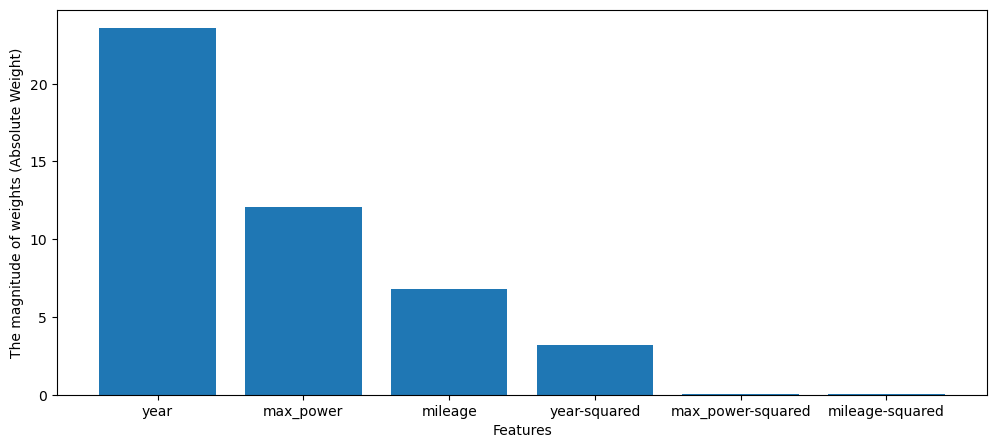

In [60]:
labels = ['year', 'max_power','mileage','year-squared', 'max_power-squared','mileage-squared']

Best_Model.plot_feature_importance(best_weights,labels)

**Conclusion of feature importance**

the weight of year: 23.59553549

the weight of max_power: -12.07924336

the weight of mileage: 6.79967258

the weight of squared year: -3.1619855

the weight of squared max_power: 0.04400462

the weight of squared mileage: 0.02967086


1. **year**: 
Weight is 23.59553549, which indicates that as the 'year' of the vehicle increases by 1 unit, the price will increase by approximately 23.59553549 units. Given that 'year' typically indicates when the vehicle was made, newer vehicles are associated with a higher price.



2. **max_power**:
The weight is -12.07924336, meaning that for a unit increase in 'max_power', the price decreases by approximately 12.07924336 units. This seems counterintuitive, as one would expect vehicles with higher power to be more valuable. There might be other factors in play or multicollinearity with other features affecting this weight.



3. **mileage**:
The weight is 6.79967258, so as the 'mileage' increases by 1 unit, the price increases by approximately 6.79967258 units. This also seems counterintuitive because typically vehicles with more mileage are valued less. Again, there might be other factors at play.



4. **year-squared**:
The weight is -3.1619855.This captures the non-linear effect of the 'year' feature. The negative sign suggests that the effect of 'year' on the price diminishes as 'year' increases.



5. **max_power-squared**:
The weight is 0.04400462. This captures the non-linear effect of the 'max_power' feature. It suggests a slight upward curvature; as 'max_power' increases, effecting on the price slightly intensifies.



6. **mileage-squared**:
The weight is 0.02967086, indicating a very slight upward curvature for the effect of 'mileage' on the target. As 'mileage' increases, its positive effect on the target slightly intensifies.



**Conclusion:**

the provided weight values offer insights into how each feature affects the price of vehicles in the polynomial regression model. Some results are intuitive, such as the positive impact of newer 'year' values, while others, like the negative effect of 'max_power,' may require further investigation to understand fully. Non-linear terms (squared features) indicate that the relationships between these features and price are not purely linear. Additional analysis and domain knowledge may be necessary to uncover the underlying factors influencing these relationships.

# Inference

In [74]:
DIR_WEIGHT = "C:\\Users\\user\\Desktop\\DSAI_Coursework\\Machine_Learning\\"

In [75]:
import joblib

model_path = DIR_WEIGHT + 'weight_1.3.model'
joblib.dump(best_weights, model_path)

['C:\\Users\\user\\Desktop\\DSAI_Coursework\\Machine_Learning\\weight_1.3.model']

In [68]:
# Load the model

model_path =  DIR + 'car-pridiction-2.joblib'
loaded_model = joblib.load(model_path)

In [74]:
def _polynomial_features(degree,X):
        n = X.shape[1]

        # List to store the polynomial features
        features = []

        for j in range(n):
            for d in range(1, degree + 1):
                features.append(X[:, j:j+1]**d)

        # Stack them horizontally to form the output matrix
        X_poly = np.hstack(features)

        return X_poly

In [75]:
def predict( X, weights):
    X_poly = _polynomial_features(2,X)
    return X_poly @ weights

In [76]:
# Define the sample data
sample_data = np.array([0.4, 0.9,0.3]).reshape(1, -1)

In [77]:
best_weights = best_weights.reshape(len(best_weights),1)

In [78]:
# Predict

predictions = predict(sample_data,best_weights)
np.exp(predictions[0])

array([64854.66282137])

# APPENDIX

**The selected polynomial regression**

Fold 2 :

![Image Alt Text](./Image_mlflow/polynomial_without_Reg_Fold2.jpg)

Fold 1 :

![Image Alt Text](./Image_mlflow/polynomial_without_Reg_Fold1.jpg)

Fold 0:

![Image Alt Text](./Image_mlflow/polynomial_without_Reg_Fold0.jpg)